# Training Wheel Exercise: Renal Cancer Data

Objective: 
Identifying relevant features is a common procedure in biological research (e.g gene expression and protein expression studies). Hence, comprehensive understanding of its workflow is mandatory. 

The purpose of this exercise is to provide an introduction into the conventional pipeline for pathway enrichment studies. More specifically, protein expression data will be analysed. Here, we are employing commonly-used feature selection methods e.g. t-test, recursive feature elimination, and selecting top proteins based on statistical p-value ranks. Subsequently, the frequently used hypergeometric enrichment tool will be utilised to evaluate enrichment of these protein features to pathways. 

The results from this exercise can also be used as a benchmark as we perform feature selection through "fuzzy-logic" tools in future studies. 

Footnote: 
This notebook also serves as a logbook for BS9001.

### Installation of packages 

We first install the packages that are required for analyses. Do ensure that pip is already installed, otherwise, download pip in the command line. 
Installation is not required if it's already done so. 

In [27]:
#to install the libraries and packages required 
#before this run, download pip in command line 
!pip install pandas
!pip install sklearn 
!pip install matplotlib
!pip install numpy
!pip install bioinfokit
!pip install combat
!pip install seaborn

### Data preparation 
In this exercise, the well-studied renal cancer (RC) data will be used for analyses.

Some of the characteristics of the RC data include the following: 
- Protein expression data 
- "Cleaned" data 
- Two groups of patients: normal (control) and cancer (case) group
- Consist of 6 patients in each group with data obtained in duplicates 
- Consist of 3123 protein expression genes 
- Dimensions: 3123 rows x 24 columns  

Firstly, data transformation needs to be performed in order to render the RC data appropriate for subsequent analyses. 

In [28]:
#Data preparation 
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from __future__ import division
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#transpose and convert first column as header, generate the feature tables
geneaggregate = pd.read_csv('RC_data.csv')
df = geneaggregate[sorted(geneaggregate.columns)]
dfT = df.swapaxes("index", "columns")
new_header = dfT.iloc[0] #grab the first row for the header
featuretable = dfT[1:] #take the data less the header row
featuretable.columns = new_header #set the header row as the df header

#store the protein expression values and protein gene names 
samples = featuretable.values
sample_names = featuretable.columns

print(featuretable)

Unnamed: 0              Q9UBE0  Q9BSJ8  P02656 O95741  P09651  P55809  Q15631  \
cancer_cc_patient1_rep1  40914   41185  274731   4969  103836  101089  102971   
cancer_cc_patient1_rep2  45120   42150  284693   5472  118185   97593  110008   
cancer_cc_patient2_rep1  44113  113386  141656   7872  162475  137794  112840   
cancer_cc_patient2_rep2  47835  139305  155864   7957  170174   99304  129621   
cancer_cc_patient3_rep1  26957   35891  161075   6111  101960   88960   92826   
cancer_cc_patient3_rep2  26005   30788  124223   3722   82866   68415   75856   
cancer_cc_patient6_rep1  35712   52750  194500   4094  118675  117222  142954   
cancer_cc_patient6_rep2  30517   33753  166061   3580   83659   85197   92312   
cancer_cc_patient7_rep1  38094   62466  177344   5878   95034   96055   97456   
cancer_cc_patient7_rep2  26654   45894  133566   4066   71776   54583   58171   
cancer_cc_patient8_rep1  48576  113950  121262   5700  175963  122041  114483   
cancer_cc_patient8_rep2  290

### Batch Correction through ComBat
Biological data are often obtained in batches. Technical sources of variation across batches, can lead to heterogenity across batches of data (e.g. different experiment personnels, different experimental instruments) - also known as batch effects.

Batch effects can potentially confound data, and lead to discrepancies in statistical testing. Such discrepancies can obscure revelation of important explanatory variables in datasets (e.g. subpopulations). 
Hence, batch correction is often an imperative step to ensure that discoveries made from the data in question are truly meaningful and relevant.

ComBat is a widely used tool and data harmonization technique for correction of batch effects in microarray expression data, through the empirical Bayes methods. In this exercise, we utilise pyComBat, a Python 3 language implementation tool of ComBaT (https://doi.org/10.1101/2020.03.17.995431) for batch correction of the RC data. 

In [29]:
from combat.pycombat import pycombat
#transform data into suitable format for batch correction 
df2 = df.set_index("Unnamed: 0")
df2_logtransformed = np.log2(df2)
#perform batch correction
batch = [1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2]
df_batchcorrected = pycombat(df2_logtransformed,batch)
df_batchcorrected
df_batchcorrected_T = df_batchcorrected.T
df_batchcorrected_T

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


Unnamed: 0                  Q9UBE0     Q9BSJ8     P02656     O95741  \
cancer_cc_patient1_rep1  15.261891  15.120885  18.038296  12.017492   
cancer_cc_patient1_rep2  15.497953  15.529820  18.150705  12.618507   
cancer_cc_patient2_rep1  15.385620  16.770919  16.933262  12.765636   
cancer_cc_patient2_rep2  15.573816  17.083958  17.372370  13.105386   
cancer_cc_patient3_rep1  14.576160  14.896713  17.147580  12.353880   
cancer_cc_patient3_rep2  14.782542  15.121457  17.079209  12.117356   
cancer_cc_patient6_rep1  15.038394  15.524121  17.462149  11.702529   
cancer_cc_patient6_rep2  14.990264  15.240991  17.454246  12.066772   
cancer_cc_patient7_rep1  15.144517  15.799568  17.308101  12.290668   
cancer_cc_patient7_rep2  14.814546  15.640455  17.172902  12.232309   
cancer_cc_patient8_rep1  15.544015  16.779003  16.673936  12.240666   
cancer_cc_patient8_rep2  14.927553  16.375200  16.606803  12.638786   
normal_cc_patient1_rep1  14.430519  15.473426  17.751272  14.157416   
normal_cc_patient1_rep2  14.841111  15.995586  17.966950  14.312233   
normal_cc_patient2_rep1  14.941086  15.933169  16.625770  12.387587   
normal_cc_patient2_rep2  15.044180  16.196810  17.141838  12.937636   
normal_cc_patient3_rep1  14.587825  15.423044  18.047368  13.752718   
normal_cc_patient3_rep2  14.899617  15.934979  18.134406  14.026057   
normal_cc_patient6_rep1  14.407306  15.476705  17.400112  12.755690   
normal_cc_patient6_rep2  14.323566  15.373858  17.167765  12.589186   
normal_cc_patient7_rep1  14.617937  15.716746  17.069632  13.618553   
normal_cc_patient7_rep2  14.408662  15.566915  16.922727  13.279500   
normal_cc_patient8_rep1  14.640722  15.222486  17.433706  12.481023   
normal_cc_patient8_rep2  14.507356  15.414662  17.283373  12.523635   

Unnamed: 0                  P09651     P55809     Q15631     Q96EY1  \
cancer_cc_patient1_rep1  16.528783  16.445190  16.561621  16.411772   
cancer_cc_patient1_rep2  16.929017  16.714625  16.801537  16.583596   
cancer_cc_patient2_rep1  17.294768  16.959425  16.728772  16.168529   
cancer_cc_patient2_rep2  17.396542  16.737107  17.008293  16.410451   
cancer_cc_patient3_rep1  16.497590  16.233003  16.372194  15.588221   
cancer_cc_patient3_rep2  16.473731  16.255145  16.333088  15.649463   
cancer_cc_patient6_rep1  16.757317  16.691000  17.160792  15.765475   
cancer_cc_patient6_rep2  16.485945  16.538912  16.580518  15.815436   
cancer_cc_patient7_rep1  16.377236  16.360390  16.461089  15.487084   
cancer_cc_patient7_rep2  16.289483  15.962975  15.998559  15.650491   
cancer_cc_patient8_rep1  17.431211  16.757882  16.755173  16.930282   
cancer_cc_patient8_rep2  16.928822  16.521595  16.374643  16.552009   
normal_cc_patient1_rep1  16.730129  16.788544  16.347773  16.354591   
normal_cc_patient1_rep2  16.935014  17.106403  16.836960  16.598260   
normal_cc_patient2_rep1  16.688361  17.037670  16.513058  16.453382   
normal_cc_patient2_rep2  16.818720  17.238440  16.761724  16.695900   
normal_cc_patient3_rep1  16.532667  16.825677  16.473862  16.441293   
normal_cc_patient3_rep2  16.844812  17.139223  16.792212  16.616207   
normal_cc_patient6_rep1  16.461024  17.199941  16.422913  16.489921   
normal_cc_patient6_rep2  16.227438  16.916186  16.112253  16.173084   
normal_cc_patient7_rep1  16.636691  16.812896  16.366776  16.423718   
normal_cc_patient7_rep2  16.120140  16.607106  16.125407  15.973737   
normal_cc_patient8_rep1  16.126313  17.937974  16.247822  16.260521   
normal_cc_patient8_rep2  16.024283  17.600138  15.915090  16.166722   

Unnamed: 0                  Q16706     Q9UID3  ...     P50395     P21283  \
cancer_cc_patient1_rep1  15.799947   9.758744  ...  18.405452  16.562000   
cancer_cc_patient1_rep2  16.366595  10.463202  ...  18.688335  17.017259   
cancer_cc_patient2_rep1  16.424491  11.670427  ...  19.347907  15.743608   
cancer_cc_patient2_rep2  16.822171  12.025418  ...  19.264426  16.211847   
cancer_cc_patient3_rep1  16.772132  10.355943  ...  19.098558  16.31

In [30]:
#plot the batch corrected data 
#import matplotlib.pyplot as plt
#plt.boxplot(df_batchcorrected.transpose())
#plt.show()

## Z-Normalisation
Features in a dataset may be on drastically different scales. Some features can falsely dominate others in an unscaled data.Therefore, normalization is necessary in the pre-feature selection step to ensure that features in a data set are measured on the same scale.

In this exercise, we employ the Z-normalisation technique. This technique involves transforming each feature by subtracting its mean value and dividing by the standard deviation. The Z score exhibits the number of standard deviations away from the mean a score is. When Z is 0, the observation is at the sample’s mean. Z-normalisation can also be used to address outliers.



In [31]:
#main aim of this block is to perform z-normalisation through patients: correct way
#apply z-normalisation on transposed featuretable 
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

#z normalise the non-batch corrected data
df_znormalised_bypatients = z_score(featuretable.T)
df_znormalised = df_znormalised_bypatients.T
df_znormalised

#z normalise the batch corrected data 
df_z_bc_bypatients = z_score(df_batchcorrected)
df_z_bc_bypatients

cancer_cc_patient1_rep1  cancer_cc_patient1_rep2  \
Unnamed: 0                                                     
Q9UBE0                    -0.346859                -0.409382   
Q9BSJ8                    -0.422833                -0.391945   
P02656                     1.149084                 1.042133   
O95741                    -2.094959                -1.984939   
P09651                     0.335750                 0.373658   
...                             ...                      ...   
P13010                     0.919689                 0.871101   
O95182                    -0.100171                 0.072923   
P62241                     0.055061                 0.164117   
Q14573                    -0.907986                -1.621712   
Q99436                    -0.149223                -0.220073   

            cancer_cc_patient2_rep1  cancer_cc_patient2_rep2  \
Unnamed: 0                                                     
Q9UBE0                    -0.499211                -0.563704   
Q9BSJ8                     0.287702                 0.303772   
P02656                     0.379920                 0.469446   
O95741                    -1.987479                -1.981652   
P09651                     0.585272                 0.483331   
...                             ...                      ...   
P13010                     1.273093                 1.225817   
O95182                     0.128769                 0.167212   
P62241                     0.720939                 0.573306   
Q14573                    -1.537000                -1.601915   
Q99436                     0.114200                 0.055880   

            cancer_cc_patient3_rep1  cancer_cc_patient3_rep2  \
Unnamed: 0                                                     
Q9UBE0                    -0.708811                -0.563079   
Q9BSJ8                    -0.539444                -0.383019   
P02656                     0.649820                 0.657106   
O95741                    -1.882971                -1.979054   
P09651                     0.306393                 0.335424   
...                             ...                      ...   
P13010                     1.098829                 1.143677   
O95182                     0.025440                 0.087857   
P62241                     0.107693                 0.076310   
Q14573                    -1.761119                -1.745761   
Q99436                     0.048865                -0.069549   

            cancer_cc_patient6_rep1  cancer_cc_patient6_rep2  \
Unnamed: 0                                                     
Q9UBE0                    -0.513503                -0.472609   
Q9BSJ8                    -0.253348                -0.341100   
P02656                     0.784657                 0.819778   
O95741                    -2.300188                -2.006014   
P09651                     0.407150                 0.311893   
...                             ...                      ...   
P13010                     1.239589                 1.155656   
O95182                    -0.083445                 0.099214   
P62241                     0.285643                 0.291016   
Q14573                    -1.672214                -1.592623   
Q99436                     0.162585                 0.083009   

            cancer_cc_patient7_rep1  cancer_cc_patient7_rep2  ...  \
Unnamed: 0                                                    ...   
Q9UBE0                    -0.448889                -0.518835  ...   
Q9BSJ8                    -0.095716                -0.087726  ...   
P02656                     0.717615                 0.712180  ...   
O95741                    -1.987551                -1.866712  ...   
P09651                     0.215736                 0.251053  ...   
...                             ...                      ...  ...   
P13010                     1.121881                 1.095697  ...   
O95182                     0.205741                 0.05239

## PCA: Principal Component Analysis 
Biological expression data are usually exceedingly large, with a broad number of dimensions to consider. Hence, principal component analysis (PCA) are often used as a tool to reduce the dimensionality of such datasets, in order to aid interpretation while minimising loss of information through preservation of "variability".
The PCA generates uncorrelated variables that successively maximize variance, known as the principal components (PCs).

The RC data contains 3123 protein features (genes), hence a PCA analysis would be appropriate.

In this exercise, the PCA will be employed to identify any significant clustering in the proposed RC dataset, each for the non batch-corrected and batch-corrected data respectively. We will evaluate if the PCs are able to serve as classifiers to segregate the case and control (cancer patients vs normal patients in the RC data) through formation of distinct clusters.

By performing separate PCA plots for the non batch-corrected and batch-corrected data, it allows for one to compare and visualise the significance/purpose of batch correction. PCA plots can sometimes be employed to detect batch effects through identification of PCs which are highly correlated with batch, rather than class. Although, it suffers from addressing subtle batch effects which are often obscured, as addressed in this study here
(https://pubmed.ncbi.nlm.nih.gov/28361693/). 

Proportion of Variance Explained :  [0.48230874 0.2395098 ]


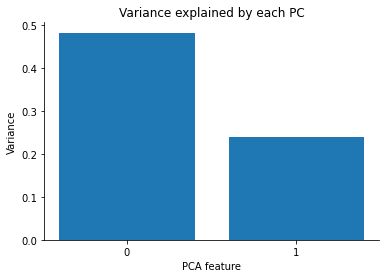

<function matplotlib.pyplot.show(close=None, block=None)>

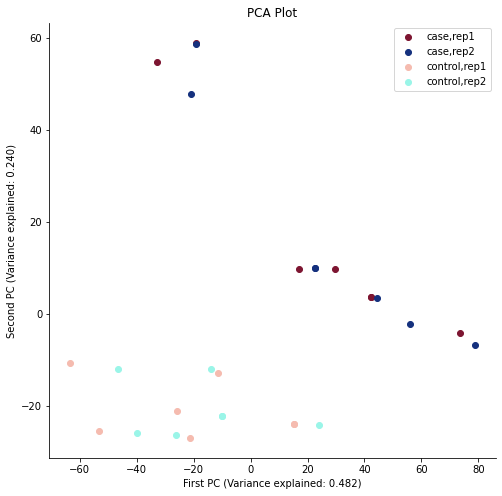

In [32]:
#THIS BLOCK PERFORMS THE PCA TEST ON THE NON-BATCH CORRECTED DATA 
#scale the data
#samples = featuretable.values.T
#sample_names = (featuretable.columns)
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_znormalised)
scaled_df_znormalised = scaler.transform(df_znormalised)

pca = PCA(n_components=2)
pca.fit(scaled_df_znormalised)
scaled_df_znormalised

#run PCA 
x_pca = pca.transform(scaled_df_znormalised)
scaled_df_znormalised.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.482)")
plt.ylabel("Second PC (Variance explained: 0.240)")

xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

# cancer = plt.scatter(xs[0:12], ys[0:12], c = "#7D1531", label = "cancer patients")
# non_cancer = plt.scatter(xs[12:], ys[12:], c = "#15317E", label = "healthy patients")
# label_color = ["#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E"]
# # batch1 = plt.scatter(xs[0:12], ys[0:12], c = label_color)
# # batch2 = plt.scatter(xs[12:], ys[12:], c = label_color)
# #cancer_rep1 = plt.scatter(xs[])

plt.legend()
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show


Text(0, 0.5, 'Variance')

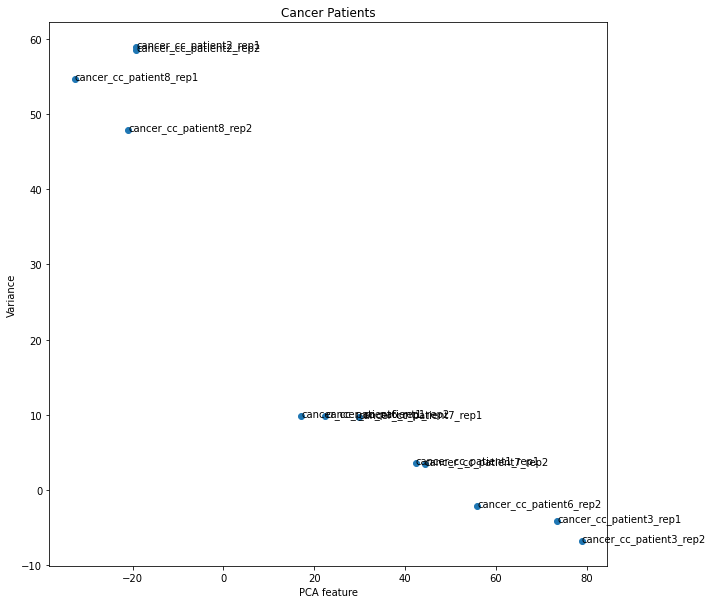

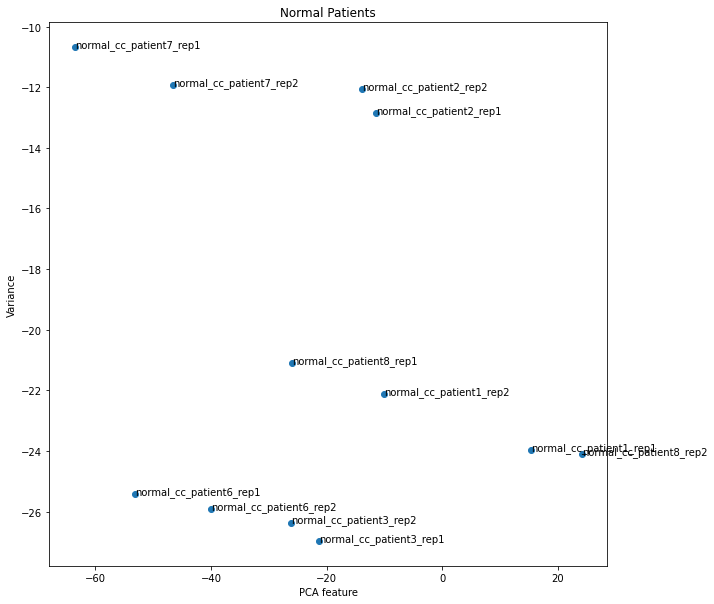

In [33]:
#proportion of variance explained after MTC 
#cancer patients
cancer_df_znormalised = df_znormalised.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_df_znormalised):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
control_df_znormalised = df_znormalised.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(control_df_znormalised):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

In [34]:
cancer_df_znormalised

Index(['cancer_cc_patient1_rep1', 'cancer_cc_patient1_rep2',
       'cancer_cc_patient2_rep1', 'cancer_cc_patient2_rep2',
       'cancer_cc_patient3_rep1', 'cancer_cc_patient3_rep2',
       'cancer_cc_patient6_rep1', 'cancer_cc_patient6_rep2',
       'cancer_cc_patient7_rep1', 'cancer_cc_patient7_rep2',
       'cancer_cc_patient8_rep1', 'cancer_cc_patient8_rep2'],
      dtype='object')

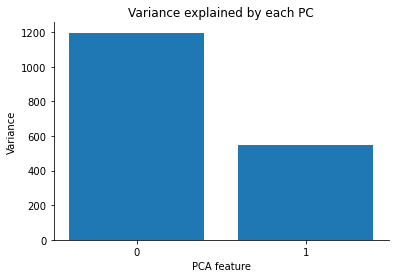

array([1196.56651311,  546.20022547])

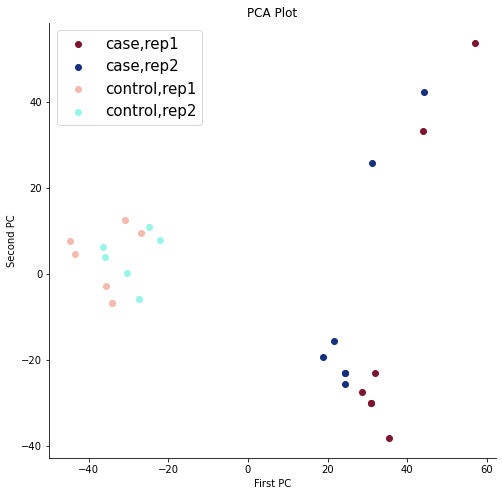

In [35]:
#THIS BLOCK PERFORMS THE PCA TEST ON THE BATCH CORRECTED DATA
#tranpose the z-normalised batch corrected data 
#THIS BLOCK PERFORMS THE PCA TEST ON THE BATCH CORRECTED DATA separate by batch
#tranpose the z-normalised batch corrected data 
df_z_bc_bypatients_T = df_z_bc_bypatients.T
#scale the batch corrected data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_z_bc_bypatients_T)
scaled_df_bc_znormalised = scaler.transform(df_z_bc_bypatients_T)

pca = PCA(n_components=2)
pca.fit(scaled_df_bc_znormalised)
scaled_df_bc_znormalised

#run PCA 
x_pca = pca.transform(scaled_df_bc_znormalised)
scaled_df_bc_znormalised.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC")
plt.ylabel("Second PC")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 15})
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show
pca.explained_variance_



Text(0, 0.5, 'Variance')

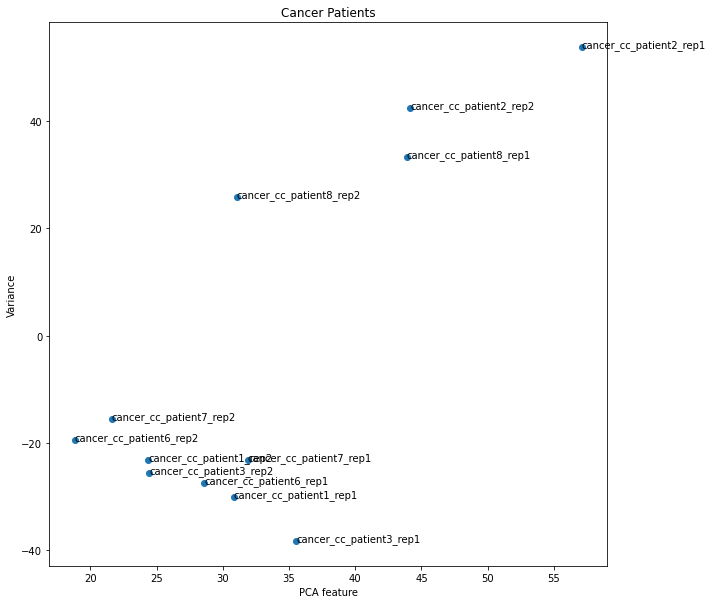

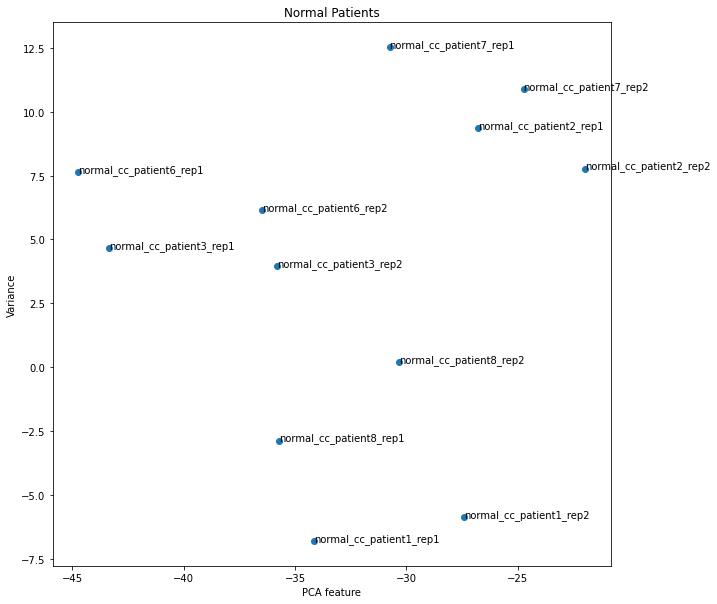

In [36]:
#proportion of variance explained after MTC 
#cancer patients
cancer_n = df_z_bc_bypatients_T.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_n):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
non_cancer_n = df_z_bc_bypatients_T.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(non_cancer_n):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

Proportion of Variance Explained :  [0.36718206 0.16760867]


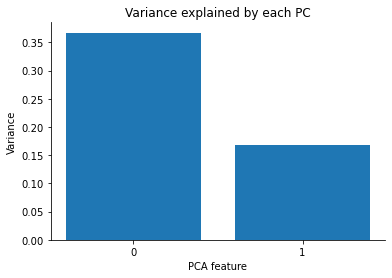

<function matplotlib.pyplot.show(close=None, block=None)>

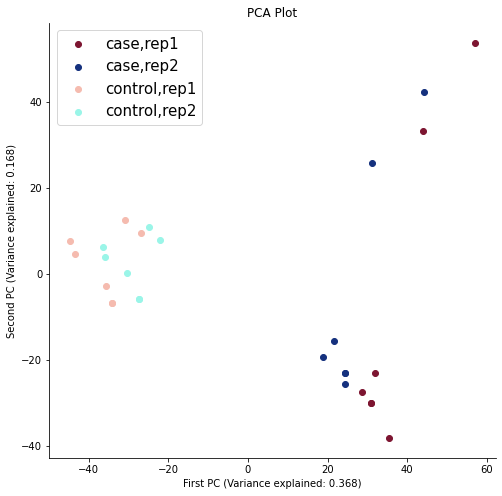

In [37]:
#THIS BLOCK PERFORMS THE PCA TEST ON THE BATCH CORRECTED DATA separate by batch
#tranpose the z-normalised batch corrected data 
df_z_bc_bypatients_T = df_z_bc_bypatients.T
#scale the batch corrected data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_z_bc_bypatients_T)
scaled_df_bc_znormalised = scaler.transform(df_z_bc_bypatients_T)

pca = PCA(n_components=2)
pca.fit(scaled_df_bc_znormalised)
scaled_df_bc_znormalised

#run PCA 
x_pca = pca.transform(scaled_df_bc_znormalised)
scaled_df_bc_znormalised.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  

plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.368)")
plt.ylabel("Second PC (Variance explained: 0.168)")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 15})
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show

Text(0, 0.5, 'Variance')

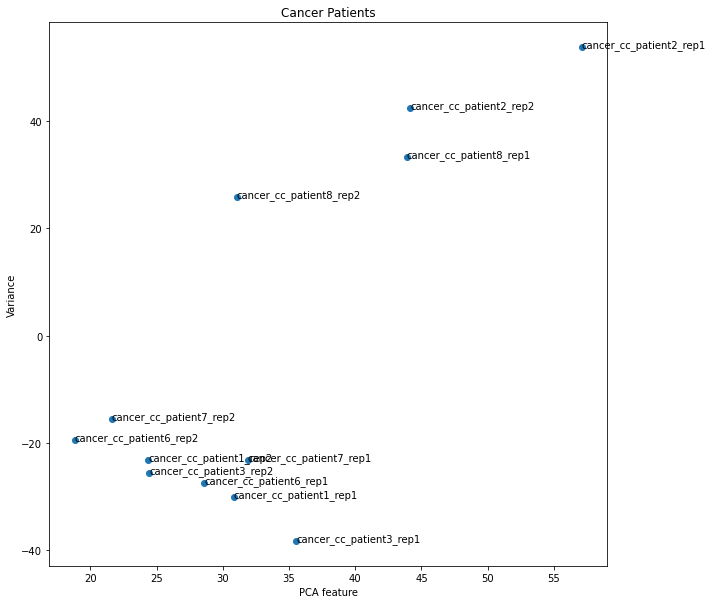

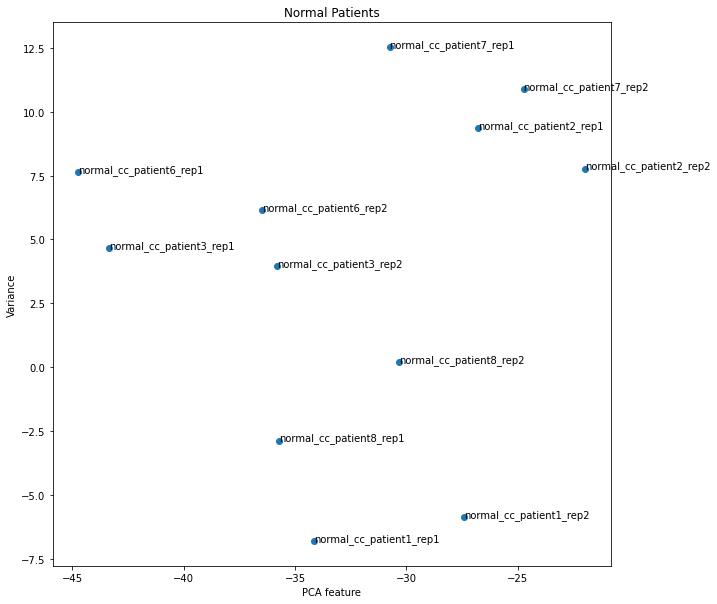

In [38]:
#cancer patients
cancer_n = df_z_bc_bypatients_T.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_n):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
non_cancer_n = df_z_bc_bypatients_T.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(non_cancer_n):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

## Feature selection
Data preparation was performed upstream, and through analyses via PCA, it is observed that both PC1 and PC2 were capable of class prediction, through generation of distinct clusters based on class effects. Batch effects contributed little to the clustering after batch correction. 

Now, the next step is to perform feature selection to extract the most relevant features. More specifically, it is to compare and extract the variables which are strongly discriminative between two groups. In this RC dataset, we aim to perform identification of differentially expressed genes (DEGs) between cancer and control patients. 

In this exercise, feature selection is performed at the level of the proteins. A common feature-selection workflow include the use of the two sample t-test, followed by the hypergeometric enrichment (subnet evaluation) test in order to evaluate protein enrichment in pathways. However, it is important to note that while such applications are common, it does not always guarantee the identification of high quality signatures (as cited in this study: https://www.comp.nus.edu.sg/~wongls/psZ/wilson-rbna2015.pdf).  

Our downstream analyses include the employment of the t-statistic, followed by the hypergeometric enrichment. Two sets of analyses will be presented: non-batch corrected and batch corrected data respectively.

## Preparation of pathway data for mapping 
Pathway data are obtained from pathway databases to allow for enrichment analyses. 

In this study, the MSigDB was used to obtain our gene sets. The C5 ontology gene set (GO: BP) was obtained and will be used for downstream enrichment analyses.

In [39]:
#this block prepares the dictionaries for gene mapping 
pathway_gene = {}
pathway_source = {}

with open('c5.gobp.txt') as f:
    for line in f:
        genepathway = line.split()[0]
        source = line.split()[1]
        gene_symbols = line.split()[2:]
        pathway_source[genepathway] = source
        pathway_gene[genepathway] = gene_symbols
        
#this block manages the converted genes 
#turn the converted genes to a dataframe
converted_genes = pd.read_csv('converted genes.txt', sep = '\t')
converted_genes.to_numpy()
converted_genes

#sort the converted genes
sortedgenes = converted_genes.sort_values('From')
sortedgenes

#retain the unique genes symbols and converts it into a list
uniquegenesarray = sortedgenes.drop_duplicates(subset=['From'])
uniquegenesSym = uniquegenesarray["To"].tolist()
uniquegenesFrom = uniquegenesarray["From"].tolist()

In [40]:
#this block drops the columns that are not mapped
for g in df_znormalised.columns:
    if g not in uniquegenesFrom:
        del df_znormalised[g]

df_znormalised_sorted = df_znormalised[sorted(df_znormalised.columns)]
df_znormalised_sorted
df_znormalised_sorted.shape

#rename the columns 
df_znormalised_sorted.columns = uniquegenesSym

## Feature selection on non-batch corrected data

### T-test 
The t-test is based on t-distribution. In biological studies, comparisons are often made between two populations of treatment. 

In the student's t-test, it evaluates whether the means of the measurement variable are different between two groups. The test statistic, ts, is calculated using a formula that has the difference between the means in the numerator; The denominator is the standard error of the difference in the means, which gets smaller as the sample variances decrease or the sample sizes increase.

#### Assumptions of the T-test
Observations within each group are assumed to be normally distributed. Hence, data distribution that are non-normal should undergo normalisation. A log2 transformation was already performed prior to this. 

#### Log2 Transformation 
The log transformation, is a widely used method to address skewed data, and are often used in biological research. 
Log2 transformation aids in conforming data to normality by reducing the skewness of the data. Log-transformed expression (or concentration) values model proportional changes rather than additive changes, which can be more appropriate for biological research (depends). 

Read more from this: https://www.researchgate.net/deref/https%3A%2F%2Fwww.biogazelle.com%2Fseven-tips-bio-statistical-analysis-gene-expression-data) 
However, log transformation is also not free from biases, covered here: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/

In [41]:
#this block performs the students' t-test to extract the differentially expressed genes 
from scipy import stats
##obtain each of the array 
#convert the genes into an array 
genearray = df_znormalised_sorted.columns.values

#convert samples into an array 
samplearray = df_znormalised_sorted.index.values

#obtain the numpy array 
new_df_sorted = df_znormalised_sorted.T
numpyarray = new_df_sorted.to_numpy() 

#set the alpha value 
alpha_value = 0.05 
count = 0
#for storage of DEG 
ttest_deg_sorted = []

#for storage of p values for subseuquent bonferroni correction
ttest_pvalue = []
for i in np.arange(len(genearray)):
    ttest = stats.ttest_ind(numpyarray[i,0:12],numpyarray[i,12:24])
    count += 1 
    ttest_pvalue.append(ttest.pvalue)
#check against the alpha value for significance [pvalues that are lesser than the alpha value]
    if ttest.pvalue < alpha_value: 
        ttest_deg_sorted.append(genearray[i]) #print out significant genes 
print(ttest_deg_sorted)
print(len(ttest_deg_sorted))

['FER1L5', 'UBA6', 'ESYT2', 'NBAS', 'VWA8', 'WDR91', 'ASPDH', 'PALM3', 'PGP', 'DRGX', 'C2CD4D', 'C19orf81', 'DNASE2', 'AGPS', 'TK2', 'PDLIM1', 'ACOT7', 'MYO1C', 'STXBP3', 'AP3B1', 'NDUFS8', 'PSMD11', 'PSMD12', 'CLIC1', 'EIF3F', 'PDHX', 'QSOX1', 'SAP18', 'PLOD2', 'HMGN4', 'NDUFA4', 'PSMD14', 'LAD1', 'CHL1', 'SDCBP', 'NOP56', 'DDX3X', 'PODXL', 'CES2', 'MAN2B1', 'FBP2', 'CUX2', 'COX7A2L', 'GAPDHS', 'HSPB6', 'COPE', 'AP3D1', 'CCS', 'PDCD5', 'SLC9A3R1', 'NRP1', 'TNPO2', 'APOL1', 'PSMA7', 'SCAMP3', 'PHYH', 'OPLAH', 'BCKDK', 'IFIT3', 'TAX1BP3', 'UBE2L6', 'UQCRQ', 'UQCR11', 'HGS', 'PPP1R12A', 'SLC27A2', 'XPO1', 'ZNF609', 'SPTBN2', 'SEC16A', 'SYNM', 'ERC2', 'SCAMP1', 'SCAMP2', 'ARPC1B', 'ARPC3', 'PFDN6', 'PMM2', 'HMGB3', 'NCAM2', 'ABCC4', 'P4HA2', 'ARPC5', 'TAPBP', 'FABP7', 'DHX15', 'CYB5B', 'PHGDH', 'NDUFS4', 'ARHGAP6', 'DYNC1LI2', 'SRGAP3', 'HSPA12A', 'HNRNPR', 'TXNL1', 'TPD52L2', 'SYNJ1', 'MGAM', 'HTRA2', 'AKR7A2', 'EPB41L2', 'TGOLN2', 'LAMTOR5', 'DENR', 'DNPH1', 'TRAPPC3', 'ZNF207', 'NDUFB3

### Bonferroni correction

In [42]:
#this block performs the bonferroni correction for differentially expressed genes obtained from the ttest manually without a module 
#approach 1: divide the per analysis alpha rate by the number of statistical analyses performed 
ttest_deg_corrected_sorted = []
ttest_pvalue_corrected_sorted = []

analyses_performed = 3123 
corrected_alphavalue = 0.05/analyses_performed

for i in np.arange(len(genearray)):
    ttest_corrected_sorted = stats.ttest_ind(numpyarray[i,0:12],numpyarray[i,12:24])
    ttest_pvalue_corrected_sorted.append(ttest_corrected_sorted.pvalue)
#check against the alpha value for significance [pvalues that are lesser than the alpha value]
    if ttest_corrected_sorted.pvalue < corrected_alphavalue: 
        ttest_deg_corrected_sorted.append(genearray[i]) #print out significant genes 

print(ttest_deg_corrected_sorted)
print(len(ttest_deg_corrected_sorted))

['UBA6', 'PDLIM1', 'NDUFS8', 'PDHX', 'NDUFA4', 'PSMD14', 'CHL1', 'DDX3X', 'FBP2', 'COX7A2L', 'PDCD5', 'SLC9A3R1', 'PSMA7', 'UQCRQ', 'PMM2', 'DHX15', 'NDUFS4', 'DYNC1LI2', 'HTRA2', 'NDUFA2', 'MYO1B', 'NUDT21', 'AHCYL1', 'NDUFS5', 'PLIN1', 'SPAG9', 'REV3L', 'EDF1', 'NOL3', 'CPNE3', 'COQ9', 'NDUFS7', 'PDCD6', 'ATP6V1G1', 'NDUFS6', 'NDUFS3', 'BANF1', 'EIF3G', 'IDH1', 'BBOX1', 'ATP5PD', 'ATP5MG', 'GLRX3', 'DDAH1', 'TOMM70', 'SEC24D', 'PRPF6', 'GLS', 'CEP152', 'AKR7A3', 'NDUFA7', 'NDUFA10', 'PGM3', 'HSPA4L', 'BAG2', 'AIFM1', 'EML2', 'NDUFB10', 'NAPSA', 'ADH1C', 'LDHA', 'GLUD1', 'CYB5R3', 'GSR', 'MT-CO2', 'PAH', 'PNP', 'PGK1', 'F9', 'CA2', 'ASS1', 'A2M', 'COL1A1', 'COL4A1', 'CRYAA', 'C1QB', 'TFRC', 'VTN', 'CAT', 'APOB', 'GAPDH', 'GNAI2', 'ATP1A1', 'ATP1B1', 'ALDOB', 'ALDH2', 'SLC25A5', 'PCCA', 'PCCB', 'EIF2S1', 'SERPINA7', 'PTMA', 'ATP5F1B', 'GPI', 'EPHX1', 'DBI', 'FABP1', 'LDHB', 'BPGM', 'FH', 'CD14', 'COL4A2', 'ENO2', 'ACAA1', 'GSTA2', 'LGALS1', 'QDPR', 'FBP1', 'ANXA4', 'CTSH', 'COX6C', 'CC

### Hypergeometric test

In [43]:
#mapping genes to the pathway using the hypergeometric test 
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

#parameters required 
hypo_M = len(pathway_gene) #total number of genes 
hypo_N = len(ttest_deg_corrected_sorted) #total number of DEGs

#obtaining n value (number of DEGs in pathway)
pathway_DEGs = {}
for pathway in pathway_gene.keys():
    hyper_n = 0
    for degs in ttest_deg_corrected_sorted:
        if degs in pathway_gene[pathway]:
            hyper_n += 1
#store the number of DEGs in pathway into a dictionary 
        pathway_DEGs[pathway] = hyper_n
#sort the dictionary to locate the highest most enriched pathway 
pathway_DEGs_sorted = dict(sorted(pathway_DEGs.items(), key=lambda item: item[1], reverse=True))
print(pathway_DEGs_sorted)
len(pathway_DEGs_sorted)

GATIVE_REGULATION_OF_ERAD_PATHWAY': 0, 'GOBP_POSITIVE_REGULATION_OF_ERAD_PATHWAY': 0, 'GOBP_POSITIVE_REGULATION_OF_GASTRO_INTESTINAL_SYSTEM_SMOOTH_MUSCLE_CONTRACTION': 0, 'GOBP_RESPONSE_TO_FORSKOLIN': 0, 'GOBP_REGULATION_OF_DOPAMINERGIC_NEURON_DIFFERENTIATION': 0, 'GOBP_NEGATIVE_REGULATION_OF_TELOMERE_MAINTENANCE_VIA_TELOMERE_LENGTHENING': 0, 'GOBP_ENDOPLASMIC_RETICULUM_MANNOSE_TRIMMING': 0, 'GOBP_REGULATION_OF_NEUROMUSCULAR_JUNCTION_DEVELOPMENT': 0, 'GOBP_NEGATIVE_REGULATION_OF_NITRIC_OXIDE_METABOLIC_PROCESS': 0, 'GOBP_REGULATION_OF_XENOPHAGY': 0, 'GOBP_REGULATION_OF_T_CIRCLE_FORMATION': 0, 'GOBP_FOLATE_IMPORT_ACROSS_PLASMA_MEMBRANE': 0, 'GOBP_REGULATION_OF_INTESTINAL_ABSORPTION': 0, 'GOBP_PROTEIN_LOCALIZATION_TO_CILIARY_TRANSITION_ZONE': 0, 'GOBP_REGULATION_OF_LIPOPHAGY': 0, 'GOBP_REGULATION_OF_MICROTUBULE_BINDING': 0, 'GOBP_POSITIVE_REGULATION_OF_MICROTUBULE_BINDING': 0, 'GOBP_RESPONSE_TO_GLYCOPROTEIN': 0, 'GOBP_NEGATIVE_REGULATION_OF_PROTEIN_IMPORT': 0, 'GOBP_RESPONSE_TO_PHORBOL_13

7481

In [44]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
#this obtains the hypergeometric test values and stores in a dictionary
pathway_hypertest = {}
hyper_M = len(pathway_gene) #total number of genes 
hyper_N = len(ttest_deg_corrected_sorted) #total number of DEGs
x = np.arange(0, hyper_n+1)

for key, value in pathway_DEGs_sorted.items():
    hyper_n = value
    res = hypergeom.cdf(x, hyper_M, hyper_n, hyper_N)
    pathway_hypertest[key] = res[0]
    
print(pathway_hypertest)
print(len(pathway_hypertest))

MBRANE': 1.0, 'GOBP_REGULATION_OF_INTESTINAL_ABSORPTION': 1.0, 'GOBP_PROTEIN_LOCALIZATION_TO_CILIARY_TRANSITION_ZONE': 1.0, 'GOBP_REGULATION_OF_LIPOPHAGY': 1.0, 'GOBP_REGULATION_OF_MICROTUBULE_BINDING': 1.0, 'GOBP_POSITIVE_REGULATION_OF_MICROTUBULE_BINDING': 1.0, 'GOBP_RESPONSE_TO_GLYCOPROTEIN': 1.0, 'GOBP_NEGATIVE_REGULATION_OF_PROTEIN_IMPORT': 1.0, 'GOBP_RESPONSE_TO_PHORBOL_13_ACETATE_12_MYRISTATE': 1.0, 'GOBP_POSITIVE_REGULATION_OF_UBIQUITIN_PROTEIN_LIGASE_ACTIVITY': 1.0, 'GOBP_REGULATION_OF_SOMATIC_STEM_CELL_POPULATION_MAINTENANCE': 1.0, 'GOBP_REGULATION_OF_METALLOENDOPEPTIDASE_ACTIVITY': 1.0, 'GOBP_NEGATIVE_REGULATION_OF_METALLOENDOPEPTIDASE_ACTIVITY': 1.0, 'GOBP_POSITIVE_REGULATION_OF_METALLOENDOPEPTIDASE_ACTIVITY': 1.0, 'GOBP_REGULATION_OF_CYTOPLASMIC_TRANSLATIONAL_INITIATION': 1.0, 'GOBP_NEGATIVE_REGULATION_OF_VASCULAR_ASSOCIATED_SMOOTH_MUSCLE_CELL_PROLIFERATION': 1.0, 'GOBP_REGULATION_OF_CHAPERONE_MEDIATED_AUTOPHAGY': 1.0, 'GOBP_REGULATION_OF_ELECTRON_TRANSFER_ACTIVITY': 1.0, 

In [45]:
#filter and obtain enriched pathways 
enriched_pathways = {}
for key, value in pathway_hypertest.items(): 
    if value <0.05:
        enriched_pathways[key] = value 

print(enriched_pathways.keys())
print("The number of enriched pathways before batch correction:",len(enriched_pathways.keys()))

dict_keys(['GOBP_SMALL_MOLECULE_METABOLIC_PROCESS', 'GOBP_ORGANIC_ACID_METABOLIC_PROCESS', 'GOBP_GENERATION_OF_PRECURSOR_METABOLITES_AND_ENERGY', 'GOBP_ORGANONITROGEN_COMPOUND_BIOSYNTHETIC_PROCESS', 'GOBP_INTRACELLULAR_TRANSPORT', 'GOBP_ESTABLISHMENT_OF_PROTEIN_LOCALIZATION', 'GOBP_PROTEIN_CONTAINING_COMPLEX_SUBUNIT_ORGANIZATION', 'GOBP_CELLULAR_MACROMOLECULE_LOCALIZATION', 'GOBP_MONOCARBOXYLIC_ACID_METABOLIC_PROCESS', 'GOBP_ORGANOPHOSPHATE_METABOLIC_PROCESS', 'GOBP_CELLULAR_AMIDE_METABOLIC_PROCESS', 'GOBP_SMALL_MOLECULE_CATABOLIC_PROCESS', 'GOBP_CARBOHYDRATE_DERIVATIVE_METABOLIC_PROCESS', 'GOBP_LIPID_METABOLIC_PROCESS', 'GOBP_NUCLEOBASE_CONTAINING_SMALL_MOLECULE_METABOLIC_PROCESS', 'GOBP_ATP_METABOLIC_PROCESS', 'GOBP_ORGANONITROGEN_COMPOUND_CATABOLIC_PROCESS', 'GOBP_PROTEOLYSIS', 'GOBP_APOPTOTIC_PROCESS', 'GOBP_HOMEOSTATIC_PROCESS', 'GOBP_TRANSMEMBRANE_TRANSPORT', 'GOBP_CELLULAR_PROTEIN_CONTAINING_COMPLEX_ASSEMBLY', 'GOBP_RESPONSE_TO_OXYGEN_CONTAINING_COMPOUND', 'GOBP_INTRACELLULAR_PR

## Feature selection on batch corrected data 

In [46]:
#this block drops the columns that are not mapped
df_bc = df_batchcorrected.T 
for f in df_bc.columns:
    if f not in uniquegenesFrom:
        del df_bc[f]

df_bc_sorted = df_bc[sorted(df_bc.columns)]
df_bc_sorted
df_bc_sorted.shape

#rename the columns 
df_bc_sorted.columns = uniquegenesSym
# df_bc_sorted

### T-test (batch corrected)

In [47]:
#this block performs the students' t-test to extract the differentially expressed genes 
from scipy import stats
##obtain each of the array 
#convert the genes into an array 
genearray_bc = df_bc_sorted.columns.values

#convert samples into an array 
samplearray_bc = df_bc_sorted.index.values

#obtain the numpy array 
new_df_sorted_bc = df_bc_sorted.T
numpyarray_bc = new_df_sorted_bc.to_numpy() 

#set the alpha value 
alpha_value = 0.05 
count_bc = 0
#for storage of DEG 
ttest_deg_sorted_bc = []

#for storage of p values for subseuquent bonferroni correction
ttest_pvalue_bc = []
ttest_deg_pvalue_bc = []
for i in np.arange(len(genearray_bc)):
    ttest_bc = stats.ttest_ind(numpyarray_bc[i,0:12],numpyarray_bc[i,12:24])
    count += 1 
    ttest_pvalue_bc.append(ttest_bc.pvalue)
#check against the alpha value for significance [pvalues that are lesser than the alpha value]
    if ttest_bc.pvalue < alpha_value: 
        ttest_deg_pvalue_bc.append(ttest_bc.pvalue)
        ttest_deg_sorted_bc.append(genearray[i]) #print out significant genes 

# print(ttest_deg_sorted_bc)
# print(len(ttest_deg_sorted_bc))

In [48]:
len(ttest_deg_pvalue_bc)

1770

### Bonferroni correction (batch corrected)

In [49]:
#this block performs the bonferroni correction for differentially expressed genes obtained from the ttest manually without a module 
#approach 1: divide the per analysis alpha rate by the number of statistical analyses performed 
ttest_deg_corrected_sorted_bc = []
ttest_pvalue_corrected_sorted_bc = []
ttest_deg_pvalue_corrected_sorted_bc = []

analyses_performed = 3123 
corrected_alphavalue = 0.05/analyses_performed

for i in np.arange(len(genearray_bc)):
    ttest_corrected_sorted_bc = stats.ttest_ind(numpyarray_bc[i,0:12],numpyarray_bc[i,12:24])
    ttest_pvalue_corrected_sorted_bc.append(ttest_corrected_sorted_bc.pvalue)
#check against the alpha value for significance [pvalues that are lesser than the alpha value]
    if ttest_corrected_sorted_bc.pvalue < corrected_alphavalue:
        ttest_deg_pvalue_corrected_sorted_bc.append(ttest_corrected_sorted_bc.pvalue) 
        ttest_deg_corrected_sorted_bc.append(genearray_bc[i]) #print out significant genes 

print(len(ttest_deg_pvalue_corrected_sorted_bc))
# print(len(ttest_deg_corrected_sorted_bc))

486


In [50]:
print(len(ttest_deg_pvalue_corrected_sorted_bc))

486


### Hypergeometric test (batch corrected)

In [51]:
#mapping genes to the pathway using the hypergeometric test 
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

#parameters required 
hypo_M = len(pathway_gene) #total number of genes 
hypo_N = len(ttest_deg_corrected_sorted_bc) #total number of DEGs

#obtaining n value (number of DEGs in pathway)
pathway_DEGs_bc = {}
for pathway in pathway_gene.keys():
    hyper_n_bc = 0
    for degs_bc in ttest_deg_corrected_sorted_bc:
        if degs_bc in pathway_gene[pathway]:
            hyper_n_bc += 1
#store the number of DEGs in pathway into a dictionary 
        pathway_DEGs_bc[pathway] = hyper_n_bc
#sort the dictionary to locate the highest most enriched pathway 
pathway_DEGs_sorted_bc = dict(sorted(pathway_DEGs.items(), key=lambda item: item[1], reverse=True))
print(pathway_DEGs_sorted_bc)
# print(len(pathway_DEGs_sorted_bc))

GATIVE_REGULATION_OF_ERAD_PATHWAY': 0, 'GOBP_POSITIVE_REGULATION_OF_ERAD_PATHWAY': 0, 'GOBP_POSITIVE_REGULATION_OF_GASTRO_INTESTINAL_SYSTEM_SMOOTH_MUSCLE_CONTRACTION': 0, 'GOBP_RESPONSE_TO_FORSKOLIN': 0, 'GOBP_REGULATION_OF_DOPAMINERGIC_NEURON_DIFFERENTIATION': 0, 'GOBP_NEGATIVE_REGULATION_OF_TELOMERE_MAINTENANCE_VIA_TELOMERE_LENGTHENING': 0, 'GOBP_ENDOPLASMIC_RETICULUM_MANNOSE_TRIMMING': 0, 'GOBP_REGULATION_OF_NEUROMUSCULAR_JUNCTION_DEVELOPMENT': 0, 'GOBP_NEGATIVE_REGULATION_OF_NITRIC_OXIDE_METABOLIC_PROCESS': 0, 'GOBP_REGULATION_OF_XENOPHAGY': 0, 'GOBP_REGULATION_OF_T_CIRCLE_FORMATION': 0, 'GOBP_FOLATE_IMPORT_ACROSS_PLASMA_MEMBRANE': 0, 'GOBP_REGULATION_OF_INTESTINAL_ABSORPTION': 0, 'GOBP_PROTEIN_LOCALIZATION_TO_CILIARY_TRANSITION_ZONE': 0, 'GOBP_REGULATION_OF_LIPOPHAGY': 0, 'GOBP_REGULATION_OF_MICROTUBULE_BINDING': 0, 'GOBP_POSITIVE_REGULATION_OF_MICROTUBULE_BINDING': 0, 'GOBP_RESPONSE_TO_GLYCOPROTEIN': 0, 'GOBP_NEGATIVE_REGULATION_OF_PROTEIN_IMPORT': 0, 'GOBP_RESPONSE_TO_PHORBOL_13

In [52]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
#this obtains the hypergeometric test values and stores in a dictionary
pathway_hypertest_bc = {}
hyper_M = len(pathway_gene) #total number of genes 
hyper_N = len(ttest_deg_corrected_sorted_bc) #total number of DEGs
x = np.arange(0, hyper_n_bc+1)

for key, value in pathway_DEGs_sorted.items():
    hyper_n_bc = value
    res = hypergeom.cdf(x, hyper_M, hyper_n_bc, hyper_N)
    pathway_hypertest_bc[key] = res[0]
    
print(pathway_hypertest_bc)

MA_MEMBRANE': 1.0, 'GOBP_REGULATION_OF_INTESTINAL_ABSORPTION': 1.0, 'GOBP_PROTEIN_LOCALIZATION_TO_CILIARY_TRANSITION_ZONE': 1.0, 'GOBP_REGULATION_OF_LIPOPHAGY': 1.0, 'GOBP_REGULATION_OF_MICROTUBULE_BINDING': 1.0, 'GOBP_POSITIVE_REGULATION_OF_MICROTUBULE_BINDING': 1.0, 'GOBP_RESPONSE_TO_GLYCOPROTEIN': 1.0, 'GOBP_NEGATIVE_REGULATION_OF_PROTEIN_IMPORT': 1.0, 'GOBP_RESPONSE_TO_PHORBOL_13_ACETATE_12_MYRISTATE': 1.0, 'GOBP_POSITIVE_REGULATION_OF_UBIQUITIN_PROTEIN_LIGASE_ACTIVITY': 1.0, 'GOBP_REGULATION_OF_SOMATIC_STEM_CELL_POPULATION_MAINTENANCE': 1.0, 'GOBP_REGULATION_OF_METALLOENDOPEPTIDASE_ACTIVITY': 1.0, 'GOBP_NEGATIVE_REGULATION_OF_METALLOENDOPEPTIDASE_ACTIVITY': 1.0, 'GOBP_POSITIVE_REGULATION_OF_METALLOENDOPEPTIDASE_ACTIVITY': 1.0, 'GOBP_REGULATION_OF_CYTOPLASMIC_TRANSLATIONAL_INITIATION': 1.0, 'GOBP_NEGATIVE_REGULATION_OF_VASCULAR_ASSOCIATED_SMOOTH_MUSCLE_CELL_PROLIFERATION': 1.0, 'GOBP_REGULATION_OF_CHAPERONE_MEDIATED_AUTOPHAGY': 1.0, 'GOBP_REGULATION_OF_ELECTRON_TRANSFER_ACTIVITY': 

In [53]:
#filter and obtain enriched pathways 
enriched_pathways_bc = {}
for key, value in pathway_hypertest_bc.items(): 
    if value <0.05:
        enriched_pathways_bc[key] = value 

print(enriched_pathways_bc.keys())
# print("The number of enriched pathways after batch correction:", len(enriched_pathways_bc.keys()))

dict_keys(['GOBP_SMALL_MOLECULE_METABOLIC_PROCESS', 'GOBP_ORGANIC_ACID_METABOLIC_PROCESS', 'GOBP_GENERATION_OF_PRECURSOR_METABOLITES_AND_ENERGY', 'GOBP_ORGANONITROGEN_COMPOUND_BIOSYNTHETIC_PROCESS', 'GOBP_INTRACELLULAR_TRANSPORT', 'GOBP_ESTABLISHMENT_OF_PROTEIN_LOCALIZATION', 'GOBP_PROTEIN_CONTAINING_COMPLEX_SUBUNIT_ORGANIZATION', 'GOBP_CELLULAR_MACROMOLECULE_LOCALIZATION', 'GOBP_MONOCARBOXYLIC_ACID_METABOLIC_PROCESS', 'GOBP_ORGANOPHOSPHATE_METABOLIC_PROCESS', 'GOBP_CELLULAR_AMIDE_METABOLIC_PROCESS', 'GOBP_SMALL_MOLECULE_CATABOLIC_PROCESS', 'GOBP_CARBOHYDRATE_DERIVATIVE_METABOLIC_PROCESS', 'GOBP_LIPID_METABOLIC_PROCESS', 'GOBP_NUCLEOBASE_CONTAINING_SMALL_MOLECULE_METABOLIC_PROCESS', 'GOBP_ATP_METABOLIC_PROCESS', 'GOBP_ORGANONITROGEN_COMPOUND_CATABOLIC_PROCESS', 'GOBP_PROTEOLYSIS', 'GOBP_APOPTOTIC_PROCESS', 'GOBP_HOMEOSTATIC_PROCESS', 'GOBP_TRANSMEMBRANE_TRANSPORT', 'GOBP_CELLULAR_PROTEIN_CONTAINING_COMPLEX_ASSEMBLY', 'GOBP_RESPONSE_TO_OXYGEN_CONTAINING_COMPOUND', 'GOBP_INTRACELLULAR_PR

## RMSE: 
### Checking for over-correction of batch correction

### This block performs the RMSE using max-min (in each protein) for normalisation

In [54]:
from sklearn.metrics import mean_squared_error, r2_score 

#obtain the pathway names 
genes = featuretable.columns.tolist()

#convert dataframe object to numpy object 
np_logtransformed = df2_logtransformed.to_numpy() 
np_batchcorrected = df_batchcorrected.to_numpy()

#iterates through the indices of the genes 
n_samples = list(range(3123))
res = []
res_normalised = []

#obtain the gene names 
for n in n_samples:
    rmse = mean_squared_error(np_logtransformed[n], np_batchcorrected[n], squared = False)
#non-normalised rmse result
    res.append(rmse)
    
#normalisation using max - min and store in dictionary 
    denom = max(np_logtransformed[n]) - min(np_logtransformed[n])
    res_normalised.append(rmse/denom)
    df_res = pd.DataFrame(res_normalised, columns = ["RMSE value"])
    
#obtain the normalised result
df_res.index = genes
df_res_sorted = df_res.sort_values(by = ["RMSE value"], ascending = False)
df_res_sorted
# #plot kde
# kde_res = df_res_sorted.plot.kde()
# kde_res

RMSE value
Q15526    0.116734
Q9UKG1    0.114082
Q8N5J2    0.111234
O15399    0.110590
Q8IW45    0.107774
...            ...
Q86U42    0.040342
Q9UJC5    0.040326
O75153    0.040259
P63010    0.039219
Q14152    0.037358

[3123 rows x 1 columns]

### This block performs the RMSE using mean for normalisation

<AxesSubplot:ylabel='Density'>

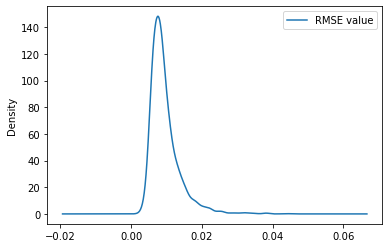

In [55]:
#normalise by mean

from sklearn.metrics import mean_squared_error, r2_score 

#obtain the pathway names 
genes = featuretable.columns.tolist()

#convert dataframe object to numpy object 
np_logtransformed = df2_logtransformed.to_numpy() 
np_batchcorrected = df_batchcorrected.to_numpy()

#iterates through the indices of the genes 
n_samples = list(range(3123))
res = []
res_normalised = []
col_mean_vals = []

#obtain the gene names 
for n in n_samples:
    rmse = mean_squared_error(np_logtransformed[n], np_batchcorrected[n], squared = False)
#non-normalised rmse result
    res.append(rmse)
    
#normalisation using max - min and store in dictionary 
    col_mean = np.average(np_logtransformed[n])
    col_mean_vals.append(col_mean)
    res_normalised.append(rmse/col_mean)
    df_res = pd.DataFrame(res_normalised, columns = ["RMSE value"])
    
#obtain the normalised result
df_res.index = genes
df_res_sorted = df_res.sort_values(by = ["RMSE value"], ascending = False)
#df_res_sorted

#plot kde
kde_res = df_res_sorted.plot.kde()
kde_res

In [56]:
#this block plots the frequency histogram of RMSE for the non-mean normalised data 

### This block runs the frequency histogram for the mean normalised data

[Text(0.5, 1.0, 'RMSE distribution (Whole Dataset Batch Correction)'),
 Text(0.5, 0, 'Mean Normalised RMSE values'),
 Text(0, 0.5, 'Frequency')]

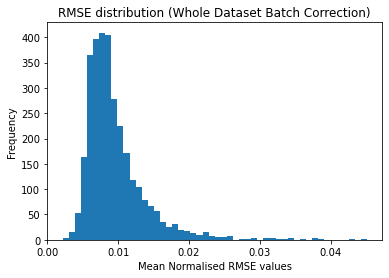

In [57]:
import matplotlib.pyplot as plt 
plt.hist(res_normalised, bins = 50)
plt.gca().set(title = "RMSE distribution (Whole Dataset Batch Correction)", xlabel = "Mean Normalised RMSE values", ylabel = "Frequency")

### This block sorts the RMSE values for the min max normalised data

In [58]:
# #normalisation using max - min and store in dictionary 
# denom = max(np_logtransformed[n]) - min(np_logtransformed[n])
# res_normalised.append(rmse/denom)
# df_res = pd.DataFrame(res_normalised, columns = ["RMSE value"])
    
# #obtain normalised result and sort from largest RMSE value to smallest RMSE value 
# df_res_sorted = df_res.sort_values(by = ['RMSE value'])
# print(df_res_sorted)

### This block plots the frequency histogram for the non-normalised data

[Text(0.5, 1.0, 'RMSE Distribution of Non-Normalised Data'),
 Text(0.5, 0, 'RMSE values'),
 Text(0, 0.5, 'Frequency')]

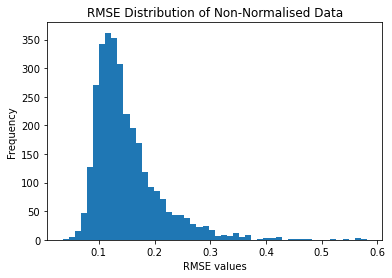

In [59]:
import matplotlib.pyplot as plt 
plt.hist(res, bins = 50)
plt.gca().set(title = "RMSE Distribution of Non-Normalised Data", xlabel = "RMSE values", ylabel = "Frequency")

### This block performs the linear regerssion for the mean-normalised data

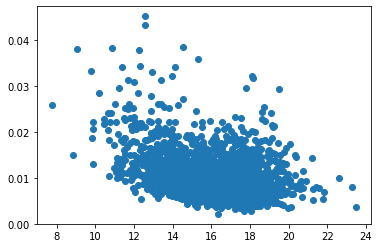

In [60]:
x = res_normalised
y = col_mean_vals 
plt.scatter(y,x)
plt.show()

#y2 = np.reshape(np.array(y), (3123,1))

#from sklearn.linear_model import LinearRegression
#lr = LinearRegression().fit(y2, np.array(x))
#lr.coef

## Batch correction on non-logtransformed data

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


<AxesSubplot:ylabel='Density'>

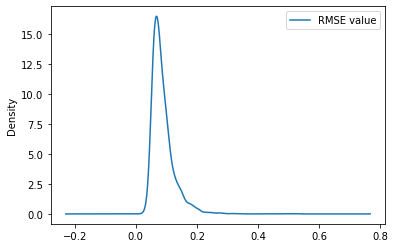

In [61]:
#df2
batch = [1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2]
df_nonlc_batchcorrected = pycombat(df2,batch)
df_nonlc_batchcorrected

#normalise by mean
from sklearn.metrics import mean_squared_error, r2_score 

#obtain the pathway names 
genes = featuretable.columns.tolist()

#convert dataframe object to numpy object 
np_nonlc = df2.to_numpy() 
np_nonlcbc = df_nonlc_batchcorrected.to_numpy()

#iterates through the indices of the genes 
n_samples = list(range(3123))
res_nonlc = []
res_normalised_nonlc = []
col_mean_vals_nonlc = []

#obtain the gene names 
for n in n_samples:
    rmse_nonlc = mean_squared_error(np_nonlc[n], np_nonlcbc[n], squared = False)
#non-normalised rmse result
    res_nonlc.append(rmse_nonlc)
    
#normalisation using max - min and store in dictionary 
    col_mean_nonlc = np.average(np_nonlc[n])
    col_mean_vals_nonlc.append(col_mean_nonlc)
    res_normalised_nonlc.append(rmse_nonlc/col_mean_nonlc)
    df_res_nonlc = pd.DataFrame(res_normalised_nonlc, columns = ["RMSE value"])
    
#obtain the normalised result
df_res_nonlc.index = genes
df_res_nonlc_sorted = df_res_nonlc.sort_values(by = ["RMSE value"], ascending = False)

#plot kde
kde_res_nonlc = df_res_nonlc_sorted.plot.kde()
kde_res_nonlc

[Text(0.5, 1.0, 'Frequency Histogram of Mean Normalised Data'),
 Text(0, 0.5, 'Frequency')]

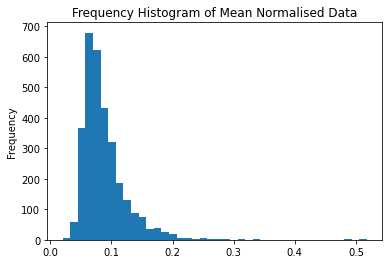

In [62]:
#plots the data with normalised non-log transformed data 
import matplotlib.pyplot as plt 
plt.hist(res_normalised_nonlc, bins = 40)
plt.gca().set(title = "Frequency Histogram of Mean Normalised Data", ylabel = "Frequency")

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

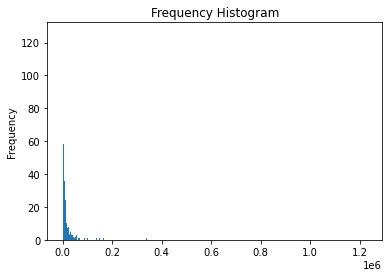

In [63]:
#plots the data with normalised non-log non-transformed data
import matplotlib.pyplot as plt 
plt.hist(res_nonlc, bins = 4000)
plt.gca().set(title = "Frequency Histogram", ylabel = "Frequency")

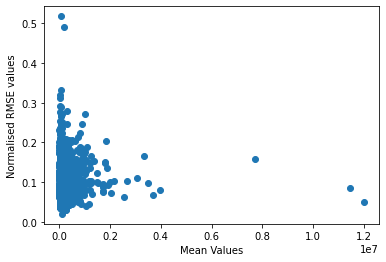

In [64]:
x = col_mean_vals_nonlc 
y = res_normalised_nonlc
plt.scatter(x,y)
plt.xlabel("Mean Values")
plt.ylabel("Normalised RMSE values")
plt.show()

# y2 = np.reshape(np.array(y), (3123,1))

# from sklearn.linear_model import LinearRegression
# lr = LinearRegression().fit(y2, np.array(x))
# lr.coef_

## Class specific batch correction 

In [65]:
#this block aims to separate the data by cases, in order to hide the class effects before performing quantile normalisation 
df_cancer = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]
df_control = df.iloc[:, [13,14,15,16,17,18,19,20,21,22,23,24]]

#perform class specific batch correction 
from combat.pycombat import pycombat

#transform data into suitable format for batch correction and log transform
df_cancer = df_cancer.set_index("Unnamed: 0")
df_cancer_lc = np.log2(df_cancer)
#df_control = df_control.set_index("Unnamed: 0")
df_control_lc = np.log2(df_control) 

#perform batch correction
batch = [1,2,1,2,1,2,1,2,1,2,1,2]
df_cancer_bc = pycombat(df_cancer_lc,batch)
df_control_bc = pycombat(df_control_lc,batch)
df_control_bc = df_control_bc.set_index(df_cancer_bc.index)

#merge the two class specific batch correction 
df_merge = pd.concat([df_cancer_bc, df_control_bc], axis = 1)
df_merge

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data
Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


cancer_cc_patient1_rep1  cancer_cc_patient1_rep2  \
Unnamed: 0                                                     
Q9UBE0                    15.220229                15.530531   
Q9BSJ8                    15.024828                15.616666   
P02656                    18.014359                18.173844   
O95741                    12.124992                12.523417   
P09651                    16.495669                16.968211   
...                             ...                      ...   
P13010                    17.586637                17.868780   
O95182                    15.856153                16.276552   
P62241                    15.931227                16.624132   
Q14573                    14.126013                13.317180   
Q99436                    15.619757                15.860458   

            cancer_cc_patient2_rep1  cancer_cc_patient2_rep2  \
Unnamed: 0                                                     
Q9UBE0                    15.344171                15.606667   
Q9BSJ8                    16.653280                17.182701   
P02656                    16.913678                17.392095   
O95741                    12.891642                13.009279   
P09651                    17.224395                17.445073   
...                             ...                      ...   
P13010                    18.457040                18.731905   
O95182                    16.609029                16.747339   
P62241                    17.433840                17.640753   
Q14573                    13.501890                13.813559   
Q99436                    16.423845                16.680060   

            cancer_cc_patient3_rep1  cancer_cc_patient3_rep2  \
Unnamed: 0                                                     
Q9UBE0                    14.533316                14.812533   
Q9BSJ8                    14.803588                15.205177   
P02656                    17.127152                17.097648   
O95741                    12.469701                12.023312   
P09651                    16.465993                16.503832   
...                             ...                      ...   
P13010                    17.961717                18.027938   
O95182                    16.096355                15.901750   
P62241                    16.043187                16.058796   
Q14573                    12.583173                12.572935   
Q99436                    15.986333                15.726185   

            cancer_cc_patient6_rep1  cancer_cc_patient6_rep2  \
Unnamed: 0                                                     
Q9UBE0                    14.996347                15.021006   
Q9BSJ8                    15.422789                15.325625   
P02656                    17.440481                17.474330   
O95741                    11.802239                11.972835   
P09651                    16.713086                16.516290   
...                             ...                      ...   
P13010                    18.267882                18.128923   
O95182                    15.974842                15.975079   
P62241                    16.445916                16.523266   
Q14573                    12.857133                12.878943   
Q99436                    16.265500                16.068925   

            cancer_cc_patient7_rep1  cancer_cc_patient7_rep2  ...  \
Unnamed: 0                                                    ...   
Q9UBE0                    15.102653                14.844652  ...   
Q9BSJ8                    15.694634                15.728148  ...   
P02656                    17.287040                17.191751  ...   
O95741                    12.404926                12.138025  ...   
P09651                    16.351493                16.315904  ...   
...                             ...                      ...  ...   
P13010                    18.020700                17.939277  ...   
O95182                    16.479777                15.80205

## Class specific batch correction z-normalisation

In [66]:
# #main aim of this block is to perform z-normalisation through patients: correct way
# #apply z-normalisation on transposed featuretable 
# def z_score(df):
#     # copy the dataframe
#     df_std = df.copy()
#     # apply the z-score method
#     for column in df_std.columns:
#         df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
#     return df_std

# #z normalise the non-batch corrected data
# class_specific_merge = z_score(df_merge.T)
class_specific_merge = df_merge.T

In [67]:
#this block prepares the dictionaries for gene mapping 
pathway_gene = {}
pathway_source = {}

with open('c5.gobp.txt') as f:
    for line in f:
        genepathway = line.split()[0]
        source = line.split()[1]
        gene_symbols = line.split()[2:]
        pathway_source[genepathway] = source
        pathway_gene[genepathway] = gene_symbols
        
#this block manages the converted genes 
#turn the converted genes to a dataframe
converted_genes = pd.read_csv('converted genes.txt', sep = '\t')
converted_genes.to_numpy()
converted_genes

#sort the converted genes
sortedgenes = converted_genes.sort_values('From')
sortedgenes

#retain the unique genes symbols and converts it into a list
uniquegenesarray = sortedgenes.drop_duplicates(subset=['From'])
uniquegenesSym = uniquegenesarray["To"].tolist()
uniquegenesFrom = uniquegenesarray["From"].tolist()

#this block drops the columns that are not mapped
for g in class_specific_merge.columns:
    if g not in uniquegenesFrom:
        del class_specific_merge[g]

class_specific_merge_sorted = class_specific_merge[sorted(class_specific_merge.columns)]
#class_specific_merge_sorted
#class_specific_merge_sorted.shape

#rename the columns 
class_specific_merge_sorted.columns = uniquegenesSym
#class_specific_merge_sorted

## Feature selection on class specific batch corrected data

In [68]:
#this block performs the students' t-test to extract the differentially expressed genes 
from scipy import stats
##obtain each of the array 
#convert the genes into an array 
genearray_cs_bc = class_specific_merge_sorted.columns.values

#convert samples into an array 
samplearray_cs_bc = class_specific_merge_sorted.index.values

#obtain the numpy array 
cs_bf_sorted = class_specific_merge_sorted.T
numpyarray_cs_bc = cs_bf_sorted.to_numpy() 

#set the alpha value 
alpha_value = 0.05 
count = 0
#for storage of DEG 
ttest_deg_sorted_cs_bc = []
ttest_deg_pvalue_cs_bc = []
#for storage of p values for subseuquent bonferroni correction
ttest_pvalue_cs_bc = []
for i in np.arange(len(genearray_cs_bc)):
    ttest_cs_bc = stats.ttest_ind(numpyarray_cs_bc[i,0:12],numpyarray_cs_bc[i,12:24])
    count += 1 
    ttest_pvalue_cs_bc.append(ttest_cs_bc.pvalue)

#check against the alpha value for significance [pvalues that are lesser than the alpha value]
    if ttest_cs_bc.pvalue < alpha_value: 
        ttest_deg_pvalue_cs_bc.append(ttest_cs_bc.pvalue)
        ttest_deg_sorted_cs_bc.append(genearray_cs_bc[i]) #print out significant genes 
# print(ttest_deg_sorted_cs_bc)
# print(len(ttest_deg_sorted_cs_bc))

## Bonferroni correction on class specific batch corrected data 

In [69]:
#this block performs the bonferroni correction for differentially expressed genes obtained from the ttest manually without a module 
#approach 1: divide the per analysis alpha rate by the number of statistical analyses performed 
deg_corrected_sorted_cs_bc = []
pvalue_corrected_sorted_cs_bc = []
deg_corrected_sorted_cs_bc_pvalues = []

analyses_performed = 3123 
corrected_alphavalue = 0.05/analyses_performed

for i in np.arange(len(genearray_bc)):
    corrected_sorted_cs_bc = stats.ttest_ind(numpyarray_cs_bc[i,0:12],numpyarray_cs_bc[i,12:24])
    pvalue_corrected_sorted_cs_bc.append(corrected_sorted_cs_bc.pvalue)
#check against the alpha value for significance [pvalues that are lesser than the alpha value]
    if corrected_sorted_cs_bc.pvalue < corrected_alphavalue: 
        deg_corrected_sorted_cs_bc_pvalues.append(corrected_sorted_cs_bc.pvalue)
        deg_corrected_sorted_cs_bc.append(genearray_cs_bc[i]) #print out significant genes 

# print(deg_corrected_sorted_cs_bc)
print("The number of differentially expressed genes after bonferroni correction:", len(deg_corrected_sorted_cs_bc))

The number of differentially expressed genes after bonferroni correction: 480


In [70]:
len(deg_corrected_sorted_cs_bc_pvalues)

480

## Hypergeometric test on class specific batch corrected data

In [71]:
#mapping genes to the pathway using the hypergeometric test 
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

#parameters required 
hypo_M_cs_bc = len(pathway_gene) #total number of genes 
hypo_N_cs_bc = len(deg_corrected_sorted_cs_bc) #total number of DEGs

#obtaining n value (number of DEGs in pathway)
pathway_DEGs_cs_bc = {}
for pathway in pathway_gene.keys():
    hyper_n_cs_bc = 0
    for degs_cs_bc in deg_corrected_sorted_cs_bc:
        if degs_cs_bc in pathway_gene[pathway]:
            hyper_n_cs_bc += 1
#store the number of DEGs in pathway into a dictionary 
        pathway_DEGs_cs_bc[pathway] = hyper_n_cs_bc

#sort the dictionary to locate the highest most enriched pathway 
pathway_DEGs_sorted_cs_bc = dict(sorted(pathway_DEGs_cs_bc.items(), key=lambda item: item[1], reverse=True))

#this obtains the hypergeometric test values and stores in a dictionary
pathway_hypertest_cs_bc = {}
hyper_M_cs_bc = len(pathway_gene) #total number of genes 
hyper_N_cs_bc = len(deg_corrected_sorted_cs_bc) #total number of DEGs

for key, value in pathway_DEGs_sorted_cs_bc.items():
    hyper_n_cs_bc = value
    x = np.arange(0, hyper_n_cs_bc+1)
    res = hypergeom.cdf(x, hyper_M_cs_bc, hyper_n_cs_bc, hyper_N_cs_bc)
    pathway_hypertest_cs_bc[key] = res[0]
    
#filter and obtain enriched pathways 
enriched_pathways_cs_bc = {}
for key, value in pathway_hypertest_cs_bc.items(): 
    if value <0.05:
        enriched_pathways_cs_bc[key] = value 

# print(enriched_pathways_cs_bc.keys())
print("The number of enriched pathways after class specific batch correction:",len(enriched_pathways_cs_bc.keys()))

The number of enriched pathways after class specific batch correction: 44


# Quantile normalisation with batch correction

In [72]:
#this block aims to separate the data by cases, in order to hide the class effects before performing quantile normalisation 
df_cancer = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]
df_control = df.iloc[:, [13,14,15,16,17,18,19,20,21,22,23,24]]
df_control = df_control.set_index(df_cancer.index)
df_cancer = df_cancer.set_index("Unnamed: 0")

#Order values in each sample 
df_cancer_sorted = pd.DataFrame(np.sort(df_cancer.values, axis = 0), index = df_cancer.index, columns = df_cancer.columns)
df_control_sorted = pd.DataFrame(np.sort(df_control.values, axis = 0), index = df_control.index, columns = df_control.columns)

#Calculate the mean for each row 
df_cancer_mean = df_cancer_sorted.mean(axis = 1)
df_cancer_mean.index = np.arange(1, len(df_cancer_mean)+1)
df_control_mean = df_control_sorted.mean(axis = 1)
df_control_mean.index = np.arange(1, len(df_control_mean)+1)

#Obtain the rank of original data 
df_cancer_rank = df_cancer.rank(method="min").astype(int)
df_control_rank = df_control.rank(method="min").astype(int)

#Quantile normalise the data 
df_cancer_qn = df_cancer.rank(method = "min").stack().astype(int).map(df_cancer_mean).unstack()
df_control_qn = df_control.rank(method = "min").stack().astype(int).map(df_control_mean).unstack()

In [73]:
# #plot the boxplots to see that normalisation is performed as desired 
# #boxplot before normalisation 
# import seaborn as sns
# sns.boxplot(data = featuretable.T)
# plt.xlabel("Samples", size = 18)
# plt.ylabel("Measurement", size = 18)
# plt.title("Boxplot before quantile normalization")

## Batch correction on class specific quantile normalised data

In [74]:
#box plots after normalisation 
#perform class specific batch correction 
from combat.pycombat import pycombat

#transform data into suitable format for batch correction and log transform
df_cancer_qn_lc = np.log2(df_cancer_qn)
#df_control = df_control.set_index("Unnamed: 0")
df_control_qn_lc = np.log2(df_control_qn) 

#perform batch correction
batch = [1,2,1,2,1,2,1,2,1,2,1,2]
df_cancer_qn_bc = pycombat(df_cancer_qn_lc,batch)
df_control_qn_bc = pycombat(df_control_qn_lc,batch)
df_control_qn_bc = df_control_bc.set_index(df_cancer_bc.index)

#merge the two class specific batch correction 
df_qn_merge = pd.concat([df_cancer_qn_bc, df_control_qn_bc], axis = 1)
df_qn_merge

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data
Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


cancer_cc_patient1_rep1  cancer_cc_patient1_rep2  \
Unnamed: 0                                                     
Q9UBE0                    15.334563                15.402300   
Q9BSJ8                    15.348175                15.296213   
P02656                    18.054654                18.027199   
O95741                    12.344448                12.358265   
P09651                    16.708700                16.830907   
...                             ...                      ...   
P13010                    17.777606                17.698098   
O95182                    16.050953                16.128783   
P62241                    16.267406                16.389039   
Q14573                    14.181514                13.066400   
Q99436                    15.828512                15.702906   

            cancer_cc_patient2_rep1  cancer_cc_patient2_rep2  \
Unnamed: 0                                                     
Q9UBE0                    15.108677                15.094248   
Q9BSJ8                    16.523151                16.715812   
P02656                    16.836522                16.883938   
O95741                    12.542757                12.358265   
P09651                    17.041994                17.015420   
...                             ...                      ...   
P13010                    18.370806                18.402607   
O95182                    16.408508                16.298095   
P62241                    17.359901                17.154750   
Q14573                    13.235363                13.204787   
Q99436                    16.218926                16.239119   

            cancer_cc_patient3_rep1  cancer_cc_patient3_rep2  \
Unnamed: 0                                                     
Q9UBE0                    14.815635                15.116204   
Q9BSJ8                    15.173593                15.335786   
P02656                    17.294806                17.256008   
O95741                    12.630105                12.393744   
P09651                    16.640518                16.730551   
...                             ...                      ...   
P13010                    18.055633                18.191508   
O95182                    16.223905                16.136442   
P62241                    16.298652                16.165052   
Q14573                    12.904348                12.863652   
Q99436                    16.085777                15.960921   

            cancer_cc_patient6_rep1  cancer_cc_patient6_rep2  \
Unnamed: 0                                                     
Q9UBE0                    15.092305                15.278692   
Q9BSJ8                    15.652587                15.423331   
P02656                    17.456716                17.593953   
O95741                    12.042943                12.358265   
P09651                    16.785005                16.642944   
...                             ...                      ...   
P13010                    18.276606                18.255535   
O95182                    16.086730                16.166535   
P62241                    16.620164                16.594174   
Q14573                    13.012537                13.132776   
Q99436                    16.289899                16.259676   

            cancer_cc_patient7_rep1  cancer_cc_patient7_rep2  ...  \
Unnamed: 0                                                    ...   
Q9UBE0                    15.187030                15.149084  ...   
Q9BSJ8                    15.892125                15.891390  ...   
P02656                    17.395315                17.404799  ...   
O95741                    12.433242                12.649732  ...   
P09651                    16.487905                16.540893  ...   
...                             ...                      ...  ...   
P13010                    18.088573                18.145069  ...   
O95182                    16.514432                16.04575

## Class specific quantile normalised data: preparation for mapping

In [75]:
#this block prepares the dictionaries for gene mapping 
pathway_gene = {}
pathway_source = {}

with open('c5.gobp.txt') as f:
    for line in f:
        genepathway = line.split()[0]
        source = line.split()[1]
        gene_symbols = line.split()[2:]
        pathway_source[genepathway] = source
        pathway_gene[genepathway] = gene_symbols
        
#this block manages the converted genes 
#turn the converted genes to a dataframe
converted_genes = pd.read_csv('converted genes.txt', sep = '\t')
converted_genes.to_numpy()
converted_genes

#sort the converted genes
sortedgenes = converted_genes.sort_values('From')
sortedgenes

#retain the unique genes symbols and converts it into a list
uniquegenesarray = sortedgenes.drop_duplicates(subset=['From'])
uniquegenesSym = uniquegenesarray["To"].tolist()
uniquegenesFrom = uniquegenesarray["From"].tolist()

#this block drops the columns that are not mapped
df_qn_merge = df_qn_merge.T
for g in df_qn_merge.columns:
    if g not in uniquegenesFrom:
        del df_qn_merge[g]

df_qn_merge_sorted = df_qn_merge[sorted(df_qn_merge.columns)]

#rename the columns 
df_qn_merge_sorted.columns = uniquegenesSym
df_qn_merge_sorted

RBM47     FER1L5       UBA6      ESYT2  \
cancer_cc_patient1_rep1  14.254317  15.591997  17.192777  15.579621   
cancer_cc_patient1_rep2  14.298101  14.703021  17.137472  15.608578   
cancer_cc_patient2_rep1  14.136300  15.639913  16.896646  16.237137   
cancer_cc_patient2_rep2  14.110045  15.453620  16.922993  16.289868   
cancer_cc_patient3_rep1  14.239652  15.595744  17.010667  15.602146   
cancer_cc_patient3_rep2  13.978810  16.081717  17.122688  15.637661   
cancer_cc_patient6_rep1  14.214571  16.172171  16.531079  15.465769   
cancer_cc_patient6_rep2  14.078225  16.735000  16.570899  15.499701   
cancer_cc_patient7_rep1  14.673648  16.926481  16.675824  16.129727   
cancer_cc_patient7_rep2  14.494992  16.855362  16.688736  15.809208   
cancer_cc_patient8_rep1  14.767994  15.931633  16.597069  15.710170   
cancer_cc_patient8_rep2  14.998022  16.084059  16.710650  15.889356   
normal_cc_patient1_rep1  14.628537  16.366348  16.817121  15.477293   
normal_cc_patient1_rep2  14.880863  17.281777  16.910258  15.806023   
normal_cc_patient2_rep1  14.969085  16.896490  16.553136  15.938849   
normal_cc_patient2_rep2  15.024998  17.264599  16.680613  16.116761   
normal_cc_patient3_rep1  14.933830  16.865840  16.302595  15.464583   
normal_cc_patient3_rep2  15.146733  17.256671  16.589823  15.711121   
normal_cc_patient6_rep1  15.052304  17.141943  16.165857  14.801282   
normal_cc_patient6_rep2  14.551291  16.873572  16.158258  15.104300   
normal_cc_patient7_rep1  15.080654  16.915053  16.336018  15.441994   
normal_cc_patient7_rep2  14.446187  16.856633  16.181903  15.168626   
normal_cc_patient8_rep1  14.414682  17.367714  16.505748  15.223161   
normal_cc_patient8_rep2  14.363850  17.124617  16.279139  15.079288   

                             SHTN1    SLC5A10      ILVBL       NBAS  \
cancer_cc_patient1_rep1  14.018384  18.315325  14.764496  12.619147   
cancer_cc_patient1_rep2  13.927324  18.231351  14.851822  12.642533   
cancer_cc_patient2_rep1  14.624470  16.914400  14.380056  13.971358   
cancer_cc_patient2_rep2  13.902357  16.820036  14.333149  13.950211   
cancer_cc_patient3_rep1  14.043644  17.748394  14.459070  12.625003   
cancer_cc_patient3_rep2  13.990324  18.057299  14.529737  12.665451   
cancer_cc_patient6_rep1  14.061568  18.039597  14.267804  12.980825   
cancer_cc_patient6_rep2  14.391554  18.024276  14.479738  12.774265   
cancer_cc_patient7_rep1  15.134032  18.613659  14.059225  13.295876   
cancer_cc_patient7_rep2  14.245432  18.847560  14.081088  13.453608   
cancer_cc_patient8_rep1  14.428262  17.509570  13.911541  13.776125   
cancer_cc_patient8_rep2  14.491285  17.524903  14.031147  13.785773   
normal_cc_patient1_rep1  13.618015  17.811967  14.346985  12.903451   
normal_cc_patient1_rep2  13.969979  18.155135  14.579432  12.895871   
normal_cc_patient2_rep1  14.998809  17.718160  14.370100  12.565108   
normal_cc_patient2_rep2  15.239495  18.111084  14.844119  12.884854   
normal_cc_patient3_rep1  14.234475  18.559688  14.549691  12.586744   
normal_cc_patient3_rep2  14.700863  18.555475  14.930445  13.078153   
normal_cc_patient6_rep1  13.953165  17.721453  14.757385  12.640217   
normal_cc_patient6_rep2  14.210818  17.536848  14.686515  12.354412   
normal_cc_patient7_rep1  15.202705  17.857018  14.597414  13.263211   
normal_cc_patient7_rep2  14.374433  17.659033  14.154404  12.468689   
normal_cc_patient8_rep1  14.216165  17.791600  15.006121  12.610672   
normal_cc_patient8_rep2  13.994890  17.694170  14.409413  12.528865   

                              FUOM       VWA8  ...     TEX264       OAS3  \
cancer_cc_patient1_rep1  11.696065  16.187334  ...  12.322485  14.259092   
cancer_cc_patient1_rep2  11.365443  16.254687  ...  12.071170  14.145171   
cancer_cc_patient2_rep1  12.024760  16.214827  ...  12.630092  15.052261   
cancer_cc_patient2_rep2  11.998758  16.140602  ...  12.806168  15.222174   
cancer_cc_patient3_rep1  11.762014  16.103944  ...  12.249389  14.727088   
cancer_cc_patient3_re

## Feature selection on class specific quantile normalised batch corrected data

## T test on quantile normalised batch corrected data

In [76]:
#this block performs the students' t-test to extract the differentially expressed genes 
from scipy import stats
##obtain each of the array 
#convert the genes into an array 
genearray_qn_bc = df_qn_merge_sorted.columns.values

#convert samples into an array 
samplearray_qn_bc = df_qn_merge_sorted.index.values

#obtain the numpy array 
qn_bc_sorted = df_qn_merge_sorted.T
numpyarray_qn_bc = qn_bc_sorted.to_numpy() 

#set the alpha value 
alpha_value = 0.05 
count = 0
#for storage of DEG 
ttest_deg_sorted_qn_bc = []

#for storage of p values for subseuquent bonferroni correction
ttest_pvalue_qn_bc = []
for i in np.arange(len(genearray_qn_bc)):
    ttest_qn_bc = stats.ttest_ind(numpyarray_qn_bc[i,0:12],numpyarray_qn_bc[i,12:24])
    count += 1 
    ttest_pvalue_qn_bc.append(ttest_qn_bc.pvalue)

#check against the alpha value for significance [pvalues that are lesser than the alpha value]
    if ttest_qn_bc.pvalue < alpha_value: 
        ttest_deg_sorted_qn_bc.append(genearray_qn_bc[i]) #print out significant genes 
#print(ttest_deg_sorted_qn_bc)
print("The number of DEGs identified in ttest:", len(ttest_deg_sorted_qn_bc))

The number of DEGs identified in ttest: 1953


## Bonferroni correction on quantile normalised batch corrected data

In [77]:
#this block performs the bonferroni correction for differentially expressed genes obtained from the ttest manually without a module 
#approach 1: divide the per analysis alpha rate by the number of statistical analyses performed 
deg_corrected_sorted_qn_bc = []
pvalue_corrected_sorted_qn_bc = []

analyses_performed = 3123 
corrected_alphavalue = 0.05/analyses_performed

for i in np.arange(len(genearray_bc)):
    corrected_sorted_qn_bc = stats.ttest_ind(numpyarray_qn_bc[i,0:12],numpyarray_qn_bc[i,12:24])
    pvalue_corrected_sorted_qn_bc.append(corrected_sorted_qn_bc.pvalue)
#check against the alpha value for significance [pvalues that are lesser than the alpha value]
    if corrected_sorted_qn_bc.pvalue < corrected_alphavalue: 
        deg_corrected_sorted_qn_bc.append(genearray_qn_bc[i]) #print out significant genes 

#print(deg_corrected_sorted_qn_bc)
print("The number of DEGs identified in ttest after bonferroni correction:",len(deg_corrected_sorted_qn_bc))

The number of DEGs identified in ttest after bonferroni correction: 615


## Enriched pathways in quantile normalised batch corrected data

In [78]:
#mapping genes to the pathway using the hypergeometric test 
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

#parameters required 
hypo_M_qn_bc = len(pathway_gene) #total number of genes 
hypo_N_qn_bc = len(deg_corrected_sorted_qn_bc) #total number of DEGs

#obtaining n value (number of DEGs in pathway)
pathway_DEGs_qn_bc = {}
for pathway in pathway_gene.keys():
    hyper_n_qn_bc = 0
    for degs_qn_bc in deg_corrected_sorted_qn_bc:
        if degs_qn_bc in pathway_gene[pathway]:
            hyper_n_qn_bc += 1
#store the number of DEGs in pathway into a dictionary 
        pathway_DEGs_qn_bc[pathway] = hyper_n_qn_bc

#sort the dictionary to locate the highest most enriched pathway 
pathway_DEGs_sorted_qn_bc = dict(sorted(pathway_DEGs_qn_bc.items(), key=lambda item: item[1], reverse=True))

#this obtains the hypergeometric test values and stores in a dictionary
pathway_hypertest_qn_bc = {}
hyper_M_qn_bc = len(pathway_gene) #total number of genes 
hyper_N_qn_bc = len(deg_corrected_sorted_qn_bc) #total number of DEGs

for key, value in pathway_DEGs_sorted_qn_bc.items():
    hyper_n_qn_bc = value
    x = np.arange(0, hyper_n_qn_bc+1)
    res = hypergeom.cdf(x, hyper_M_qn_bc, hyper_n_qn_bc, hyper_N_qn_bc)
    pathway_hypertest_qn_bc[key] = res[0]
    
#filter and obtain enriched pathways 
enriched_pathways_qn_bc = {}
for key, value in pathway_hypertest_qn_bc.items(): 
    if value <0.05:
        enriched_pathways_qn_bc[key] = value 

#print(enriched_pathways_qn_bc.keys())
print("The number of enriched pathways:",len(enriched_pathways_qn_bc.keys()))

The number of enriched pathways: 147


## Jaccard Index: Evaluating whether the DEGs are significantly different between the different methods of data preparation 

In [79]:
#qnormalised: ttest_deg_sorted_qn_bc 
#class specific batch correction: ttest_deg_sorted_cs_bc
#batch correction: ttest_deg_sorted_bc
#non-batch corrected: ttest_deg_sorted

#convert all of the list to set 
non_batch_corrected_set = set(ttest_deg_sorted)
batch_corrected_set = set(ttest_deg_sorted_bc) 
cs_batch_corrected_set = set(ttest_deg_sorted_cs_bc)
qnormalised_set = set(ttest_deg_sorted_qn_bc)

#is the DEGs in the non-batch-corrected and batch corrected different?
#obtain the Jaccard index (Jaccard similarity coefficient) 
nbc_vs_bc = len(non_batch_corrected_set.intersection(batch_corrected_set))/len(non_batch_corrected_set.union(batch_corrected_set))
nbc_vs_csbc = len(non_batch_corrected_set.intersection(cs_batch_corrected_set))/len(non_batch_corrected_set.union(cs_batch_corrected_set))
nbc_vs_qnbc = len(non_batch_corrected_set.intersection(qnormalised_set))/len(non_batch_corrected_set.union(qnormalised_set))
bc_vs_csbc = len(batch_corrected_set.intersection(cs_batch_corrected_set))/len(batch_corrected_set.union(cs_batch_corrected_set))
csbc_vs_qnbc = len(cs_batch_corrected_set.intersection(qnormalised_set))/len(cs_batch_corrected_set.union(qnormalised_set))
qnbc_vs_bc = len(qnormalised_set.intersection(batch_corrected_set))/len(qnormalised_set.union(batch_corrected_set))

print("The Jaccard Index Values for Non-Batch Corrected versus Batch Corrected is:", nbc_vs_bc)
print("The Jaccard Index Values for Non-Batch Corrected versus Class Specific Batch Correction is:", nbc_vs_csbc)
print("The Jaccard Index Values for Non-Batch Corrected versus CS-Quantile+Batch Correction is:", nbc_vs_qnbc)
print("The Jaccard Index Values for Batch Corrected versus Class Specific Batch Correction is:", bc_vs_csbc)
print("The Jaccard Index Values for Batch Correction versus CS-Quantile + Batch Correction is:", qnbc_vs_bc)
print("The Jaccard Index Values for Class Specific Batch Correction vs CS-Quantile+Batch Correction is:", csbc_vs_qnbc)

The Jaccard Index Values for Non-Batch Corrected versus Batch Corrected is: 0.6305203323130739
The Jaccard Index Values for Non-Batch Corrected versus Class Specific Batch Correction is: 0.6204634892872759
The Jaccard Index Values for Non-Batch Corrected versus CS-Quantile+Batch Correction is: 0.6847545219638242
The Jaccard Index Values for Batch Corrected versus Class Specific Batch Correction is: 0.9769533445756042
The Jaccard Index Values for Batch Correction versus CS-Quantile + Batch Correction is: 0.8841093117408907
The Jaccard Index Values for Class Specific Batch Correction vs CS-Quantile+Batch Correction is: 0.8705763397371082


## Let's compare the difference between the batch corrected and the class specific batch corrected



In [80]:
#the intersection of genes in batch correction and class specific batch correction before MTC 
nc_beforeMTC = set(ttest_deg_sorted)
bc_beforeMTC = set(ttest_deg_sorted_bc) 
csbc_beforeMTC = set(ttest_deg_sorted_cs_bc)
bc_vs_csbc_beforeMTC = len(bc_beforeMTC.intersection(csbc_beforeMTC))
print("The number of intersecting genes before MTC between batch corrected and class specific batch correction is:", bc_vs_csbc_beforeMTC)

#the intersection of genes in batch correction and class specific batch correction after MTC
nc_afterMTC = set(ttest_deg_corrected_sorted)
bc_afterMTC = set(ttest_deg_corrected_sorted_bc)
csbc_afterMTC = set(deg_corrected_sorted_cs_bc)
bc_vs_csbc_afterMTC = len(bc_afterMTC.intersection(csbc_afterMTC))
print("The number of intersecting genes after MTC between batch corrected and class specific batch correction is:", bc_vs_csbc_afterMTC)

#the intersection of genes in batch correction and class specific batch correction after MTC
e_bc = set(enriched_pathways_bc.keys())
e_csbc = set(enriched_pathways_cs_bc.keys())
enriched_bc_vs_csbc = len(e_bc.intersection(e_csbc))
print("The number of intersecting genes after MTC between batch corrected and class specific batch correction is:", enriched_bc_vs_csbc)

The number of intersecting genes before MTC between batch corrected and class specific batch correction is: 1738
The number of intersecting genes after MTC between batch corrected and class specific batch correction is: 471
The number of intersecting genes after MTC between batch corrected and class specific batch correction is: 40


In [81]:
csbc_beforeMTC - (bc_beforeMTC.intersection(csbc_beforeMTC))


{'CBX5',
 'DMTN',
 'DNAJC9',
 'FAM91A1',
 'GLO1',
 'LMNB1',
 'MINDY1',
 'REXO2',
 'SKP1'}

## P value distribution between the batch corrected and the class specific batch corrected data

[Text(0.5, 1.0, 'Frequency Histogram of P-values of Batch Corrected (Before MTC)'),
 Text(0, 0.5, 'Frequency')]

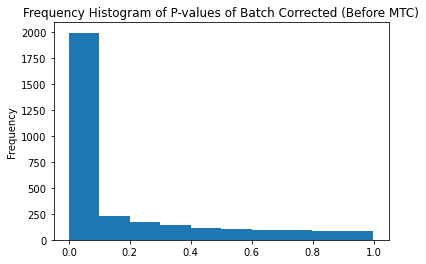

In [82]:
import matplotlib.pyplot as plt 
plt.hist(ttest_pvalue_bc, bins = 10)
plt.gca().set(title = "Frequency Histogram of P-values of Batch Corrected (Before MTC)", ylabel = "Frequency")

[Text(0.5, 1.0, 'Frequency Histogram of P-Values of Class Specific Batch Correction (Before MTC)'),
 Text(0, 0.5, 'Frequency')]

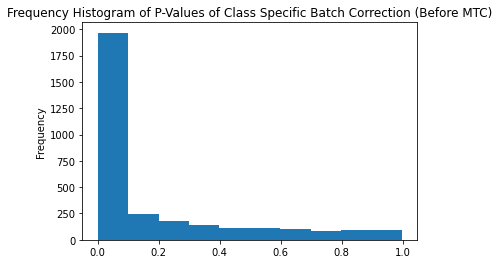

In [83]:
plt.hist(ttest_pvalue_cs_bc, bins = 10)
plt.gca().set(title = "Frequency Histogram of P-Values of Class Specific Batch Correction (Before MTC)", ylabel = "Frequency")

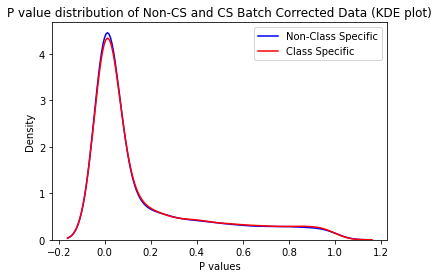

In [84]:
import seaborn as sns
sns.kdeplot(data = ttest_pvalue_corrected_sorted_bc, color = "b", label = "Non-Class Specific")
sns.kdeplot(data = pvalue_corrected_sorted_cs_bc, color = "r", label = "Class Specific")
plt.gca().set(title = "P value distribution of Non-CS and CS Batch Corrected Data (KDE plot)", ylabel = "Density", xlabel = "P values", )
plt.legend()


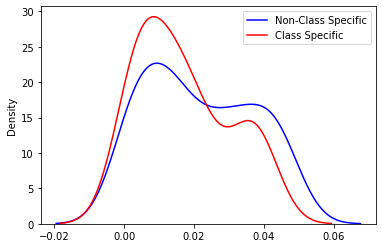

In [85]:
import seaborn as sns
sns.kdeplot(enriched_pathways_bc.values(), color = "b", label = "Non-Class Specific")
sns.kdeplot(enriched_pathways_cs_bc.values(), color = "r", label = "Class Specific")
plt.legend()
plt.show()

## Checking the 9 genes

In [86]:
csbc_bc_intersect = (bc_afterMTC.intersection(csbc_afterMTC))

In [87]:
#obtain the intersection first between class specific batch correction and normal batch correction 
csbc_bc_intersect = (bc_afterMTC.intersection(csbc_afterMTC))

#obtain the class specific batch correction unique genes 
csbc_unique = csbc_afterMTC - csbc_bc_intersect
print(len(csbc_unique),"unique genes present in class specific batch correction:",csbc_unique)

#obtain the batch correction unique genes 
bc_unique = bc_afterMTC - csbc_bc_intersect
print(len(bc_unique),"unique genes present in the batch correction:", bc_unique)

#check if the class specific batch correction unique genes are present in the original 480 DEGs identified after CS batch correction 
for g in csbc_unique: 
    if g in deg_corrected_sorted_cs_bc:
        print(True)

9 unique genes present in class specific batch correction: {'ADIPOQ', 'PSMA5', 'RCN1', 'ST14', 'SERPINA7', 'MYO1C', 'PRPSAP1', 'LTA4H', 'NAT8'}
15 unique genes present in the batch correction: {'GCDH', 'SCRIB', 'ME3', 'ACAD10', 'SLC25A3', 'KHK', 'CAPG', 'PYGM', 'CANX', 'WARS1', 'FUS', 'LSM6', 'TRADD', 'TAGLN2', 'GPI'}
True
True
True
True
True
True
True
True
True


## RMSE check for non-class specific and class specific batch correction

In [88]:
from sklearn.metrics import mean_absolute_error
df_classbatchcorrected = df_merge.T
np_csbc = df_classbatchcorrected.to_numpy()
np_bc = df_batchcorrected.T.to_numpy()

#obtain the absolute error 
np_absolute_error = np.abs(np_csbc - np_bc)

#output in dataframe form for visualisation of absolute errors
df_absoluteerror = pd.DataFrame(np_absolute_error, columns = genes, index = df_znormalised.index)

#obtain the mean absolute error 
mae_csbc_vs_bc = np.average(np_absolute_error)

#obtain the RMSE values by the genes 
rmse_csbc_genes = df_absoluteerror.mean(axis =0)
#sort the RMSE values
df_rmse_csbc_genes = pd.DataFrame(rmse_csbc_genes, columns = ["RMSE Values"])
df_rmse_csbc_genes_sorted = df_rmse_csbc_genes.sort_values(by = ["RMSE Values"], ascending = False)
df_rmse_csbc_genes_sorted

RMSE Values
O15540     0.440807
P05062     0.380866
P04733     0.355653
P07148     0.312711
O75717     0.288319
...             ...
Q9UHD2     0.011460
P16422     0.011085
P53634     0.009434
O75352     0.009171
P16152     0.007618

[3123 rows x 1 columns]

## Plot the RMSE values 


In [89]:
# # rmse_kde_res = rmse_csbc_genes.plot.kde()
# # kde_res
# plt.hist(df_absoluteerror , bins = 40)
# plt.gca().set(title = "Frequency Histogram of RMSE values b/w Non-CS Batch Correction vs CS-Batch Correction", ylabel = "Frequency")

In [90]:
# plt.hist(df_classbatchcorrected, bins = 40)
# plt.gca().set(title = "Frequency Histogram of RMSE values b/w Non-CS Batch Correction vs CS-Batch Correction", ylabel = "Frequency")

In [91]:
# #plot the class specifc batch corrected data 
# import matplotlib.pyplot as plt
# plt.boxplot(df_batchcorrected.T.transpose())
# plt.show()

In [92]:
# #plot the non batch corrected data 
# import matplotlib.pyplot as plt
# plt.boxplot(df2_logtransformed.T.transpose())
# plt.show()

## RMSE check on class specific batch correction versus no batch correction (non normalised)

In [93]:
#df2_logtransformed 
from sklearn.metrics import mean_absolute_error
np_before_csbc = df2_logtransformed.T.to_numpy()
np_after_csbc = df_merge.T.to_numpy()

#obtain the absolute error 
np_csbc_beforeafter_abs_error = np.abs(np_before_csbc - np_after_csbc)

#output in dataframe form for visualisation of absolute errors
csbc_beforeafter_absoluteerror = pd.DataFrame(np_csbc_beforeafter_abs_error, columns = genes, index = df_znormalised.index)

#obtain the mean absolute error 
mae_beforeafter_csbc = np.average(np_csbc_beforeafter_abs_error)

#obtain the RMSE values by the genes 
rmse_beforeafter_csbc_genes = csbc_beforeafter_absoluteerror.mean(axis =0)

#sort the RMSE values
df_rmse_beforeafter_csbc_genes = pd.DataFrame(rmse_beforeafter_csbc_genes, columns = ["RMSE Values"])
df_rmse_beforeafter_csbc_genes_sorted = df_rmse_csbc_genes.sort_values(by = ["RMSE Values"], ascending = False)
df_rmse_beforeafter_csbc_genes_sorted


RMSE Values
O15540     0.440807
P05062     0.380866
P04733     0.355653
P07148     0.312711
O75717     0.288319
...             ...
Q9UHD2     0.011460
P16422     0.011085
P53634     0.009434
O75352     0.009171
P16152     0.007618

[3123 rows x 1 columns]

In [94]:
# ## Plot the RMSE values for class specific batch correction versus no batch correction
# plt.hist(df_rmse_beforeafter_csbc_genes_sorted, bins = 40)
# plt.gca().set(title = "Frequency Histogram of RMSE values b/w CS Batch Correction vs No Correction", ylabel = "Frequency")

## RMSE check on class specific batch correction versus no batch correction (normalised)

In [95]:
#normalise by mean
from sklearn.metrics import mean_squared_error, r2_score 

#obtain the pathway names 
genes = featuretable.columns.tolist()

#convert dataframe object to numpy object 
np_logtransformed = df2_logtransformed.to_numpy() 
np_csbatchcorrected = df_merge.to_numpy()

#iterates through the indices of the genes 
n_samples = list(range(3123))
cs_res = []
cs_res_normalised = []
cs_col_mean_vals = []

#obtain the gene names 
for n in n_samples:
    rmse_normalised_csbc = mean_squared_error(np_logtransformed[n], np_csbatchcorrected[n], squared = False)
#non-normalised rmse result
    cs_res.append(rmse_normalised_csbc)
    
#normalisation using max - min and store in dictionary 
    col_mean = np.average(np_logtransformed[n])
    cs_col_mean_vals.append(col_mean)
    cs_res_normalised.append(rmse_normalised_csbc/col_mean)
    cs_normalised_rmse = pd.DataFrame(cs_res_normalised, columns = ["RMSE value"])
    
#obtain the normalised result
cs_normalised_rmse.index = genes
cs_res_normalised_sorted = cs_normalised_rmse.sort_values(by = ["RMSE value"], ascending = False)
#df_res_sorted
cs_res_normalised_sorted

RMSE value
Q99543    0.056273
Q49A88    0.054034
O95347    0.041202
O95428    0.040249
Q15651    0.039643
...            ...
Q9Y2J2    0.003528
P62805    0.003494
P78371    0.003298
Q9Y5K8    0.003042
Q14152    0.002668

[3123 rows x 1 columns]

In [96]:
# ## Plot the RMSE values for class specific batch correction versus no batch correction
# plt.hist(cs_res_normalised_sorted, bins = 50)
# plt.gca().set(title = "RMSE distribution (Class Specific Batch Correction)", xlabel = "Mean Normalised RMSE values", ylabel = "Frequency")

In [97]:
from sklearn.metrics import mean_absolute_error
np_csbc = df_classbatchcorrected.to_numpy()
np_bc = df_batchcorrected.T.to_numpy()

#obtain the absolute error 
np_absolute_error = np.abs(np_csbc - np_bc)

#output in dataframe form for visualisation of absolute errors
df_absoluteerror = pd.DataFrame(np_absolute_error, columns = genes, index = df_znormalised.index)

#obtain the mean absolute error 
mae_csbc_vs_bc = np.average(np_absolute_error)

#obtain the RMSE values by the genes 
rmse_csbc_genes = df_absoluteerror.mean(axis =0)
#sort the RMSE values
df_rmse_csbc_genes = pd.DataFrame(rmse_csbc_genes, columns = ["RMSE Values"])
df_rmse_csbc_genes_sorted = df_rmse_csbc_genes.sort_values(by = ["RMSE Values"], ascending = False)
df_rmse_csbc_genes_sorted

RMSE Values
O15540     0.440807
P05062     0.380866
P04733     0.355653
P07148     0.312711
O75717     0.288319
...             ...
Q9UHD2     0.011460
P16422     0.011085
P53634     0.009434
O75352     0.009171
P16152     0.007618

[3123 rows x 1 columns]

## PCA plot on the class specific batch corrected data

Proportion of Variance Explained :  [0.33867397 0.2407721 ]


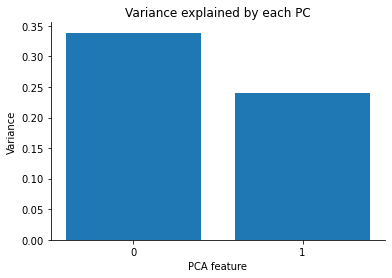

array([1102.95803125,  784.12145568])

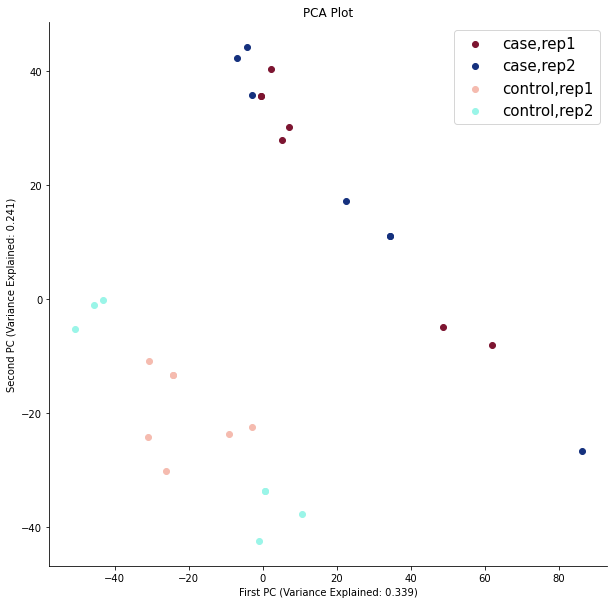

In [98]:
## This block performs the PCA on the class specific batch corrected data 
#tranpose the z-normalised class specfic batch corrected data 
df_z_cs_bc = class_specific_merge
#scale the batch corrected data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_z_cs_bc)
scaled_df_cs_bc = scaler.transform(df_z_cs_bc)

pca = PCA(n_components=2)
pca.fit(scaled_df_cs_bc)
scaled_df_cs_bc

#run PCA 
x_pca = pca.transform(scaled_df_cs_bc)
scaled_df_bc_znormalised.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(10,10))
plt.xlabel("First PC (Variance Explained: 0.339)")
plt.ylabel("Second PC (Variance Explained: 0.241)")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 15})
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show
pca.explained_variance_

Text(0, 0.5, 'Variance')

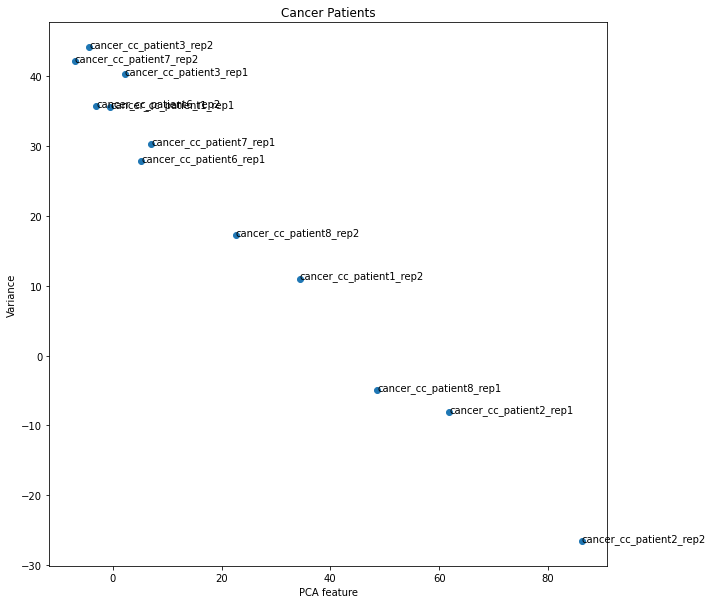

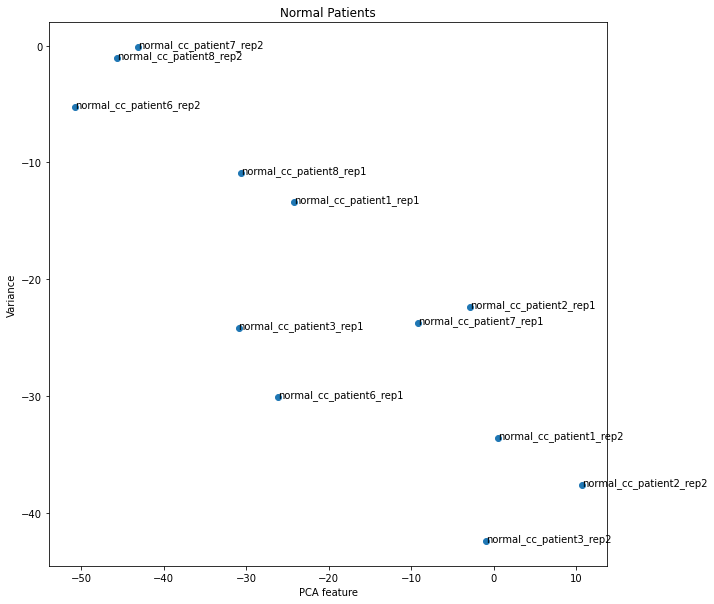

In [99]:
#cancer patients
cancer_csbc = df_z_cs_bc.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_csbc):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
non_cancer_csbc = df_z_cs_bc.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(non_cancer_csbc):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

## PCA plot on the quantile normalised batch corrected data 

Proportion of Variance Explained :  [0.34442235 0.14266643]


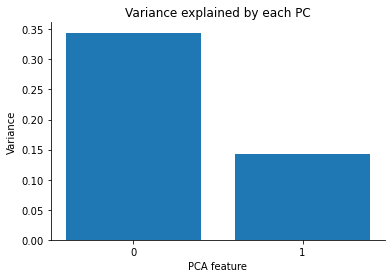

array([1121.67878551,  464.62113362])

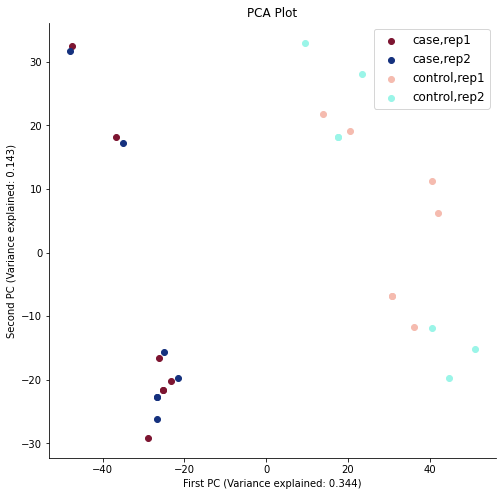

In [100]:
## This block performs the PCA on the class specific batch corrected data 
#tranpose the z-normalised class specfic batch corrected data 
df_qn_cs_bc = df_qn_merge
#scale the batch corrected data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_qn_cs_bc)
scaled_df_qn_cs_bc = scaler.transform(df_qn_cs_bc)

pca = PCA(n_components=2)
pca.fit(scaled_df_qn_cs_bc)
scaled_df_qn_cs_bc

#run PCA 
x_pca = pca.transform(scaled_df_qn_cs_bc)
scaled_df_qn_cs_bc.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.344)")
plt.ylabel("Second PC (Variance explained: 0.143)")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 12})
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show
pca.explained_variance_

In [101]:
df_qn_cs_bc

Unnamed: 0                  Q9UBE0     Q9BSJ8     P02656     O95741  \
cancer_cc_patient1_rep1  15.334563  15.348175  18.054654  12.344448   
cancer_cc_patient1_rep2  15.402300  15.296213  18.027199  12.358265   
cancer_cc_patient2_rep1  15.108677  16.523151  16.836522  12.542757   
cancer_cc_patient2_rep2  15.094248  16.715812  16.883938  12.358265   
cancer_cc_patient3_rep1  14.815635  15.173593  17.294806  12.630105   
cancer_cc_patient3_rep2  15.116204  15.335786  17.256008  12.393744   
cancer_cc_patient6_rep1  15.092305  15.652587  17.456716  12.042943   
cancer_cc_patient6_rep2  15.278692  15.423331  17.593953  12.358265   
cancer_cc_patient7_rep1  15.187030  15.892125  17.395315  12.433242   
cancer_cc_patient7_rep2  15.149084  15.891390  17.404799  12.649732   
cancer_cc_patient8_rep1  15.260393  16.506101  16.585328  12.126944   
cancer_cc_patient8_rep2  15.033708  16.490017  16.589819  12.760580   
normal_cc_patient1_rep1  14.423723  15.512430  17.741579  14.155284   
normal_cc_patient1_rep2  14.787410  15.915722  17.950670  14.289985   
normal_cc_patient2_rep1  15.098870  16.092446  16.502273  12.180221   
normal_cc_patient2_rep2  14.969096  16.095886  17.200232  13.048371   
normal_cc_patient3_rep1  14.631736  15.448867  18.067615  13.703657   
normal_cc_patient3_rep2  14.839756  15.861459  18.102970  14.031494   
normal_cc_patient6_rep1  14.393027  15.516566  17.354912  12.591010   
normal_cc_patient6_rep2  14.324361  15.359067  17.223812  12.733631   
normal_cc_patient7_rep1  14.671554  15.819404  16.991015  13.553933   
normal_cc_patient7_rep2  14.400496  15.531918  17.000951  13.357162   
normal_cc_patient8_rep1  14.701684  15.195841  17.391903  12.284492   
normal_cc_patient8_rep2  14.488799  15.395601  17.328958  12.674422   

Unnamed: 0                  P09651     P55809     Q15631     Q96EY1  \
cancer_cc_patient1_rep1  16.708700  16.648177  16.689282  16.542120   
cancer_cc_patient1_rep2  16.830907  16.576122  16.732684  16.491483   
cancer_cc_patient2_rep1  17.041994  16.772551  16.502705  16.018217   
cancer_cc_patient2_rep2  17.015420  16.227043  16.615522  15.908864   
cancer_cc_patient3_rep1  16.640518  16.413260  16.491565  15.763433   
cancer_cc_patient3_rep2  16.730551  16.474643  16.599296  15.848468   
cancer_cc_patient6_rep1  16.785005  16.746905  17.026327  15.914279   
cancer_cc_patient6_rep2  16.642944  16.685705  16.812962  15.996659   
cancer_cc_patient7_rep1  16.487905  16.475935  16.518806  15.671572   
cancer_cc_patient7_rep2  16.540893  16.191591  16.260396  15.880125   
cancer_cc_patient8_rep1  17.124882  16.567308  16.495801  16.651092   
cancer_cc_patient8_rep2  17.064048  16.575284  16.458104  16.678602   
normal_cc_patient1_rep1  16.820360  16.755881  16.329705  16.329803   
normal_cc_patient1_rep2  16.889322  17.129340  16.803389  16.567276   
normal_cc_patient2_rep1  16.762736  17.006696  16.585098  16.494324   
normal_cc_patient2_rep2  16.784511  17.250537  16.734916  16.653306   
normal_cc_patient3_rep1  16.547937  16.793266  16.524534  16.474191   
normal_cc_patient3_rep2  16.808026  17.159466  16.762663  16.583089   
normal_cc_patient6_rep1  16.449097  17.170067  16.445809  16.555173   
normal_cc_patient6_rep2  16.251615  16.954740  16.143821  16.192658   
normal_cc_patient7_rep1  16.691451  16.780398  16.359067  16.444923   
normal_cc_patient7_rep2  16.154912  16.671034  16.155793  16.017016   
normal_cc_patient8_rep1  15.987320  17.913103  16.175264  16.173143   
normal_cc_patient8_rep2  16.068521  17.582541  15.964380  16.187053   

Unnamed: 0                  Q16706     Q9UID3  ...     P50395     P21283  \
cancer_cc_patient1_rep1  16.023629  10.004216  ...  18.510101  16.764438   
cancer_cc_patient1_rep2  16.194521  10.025597  ...  18.472505  16.870654   
cancer_cc_patient2_rep1  16.306182  11.290940  ...  19.227763  15.662974   
cancer_cc_patient2_rep2  16.335774  11.285349  ...  19.038121  15.649679   
cancer_cc_patient3_rep1  16.883605  10.825385  ...  19.122051  16.48

Text(0, 0.5, 'Variance')

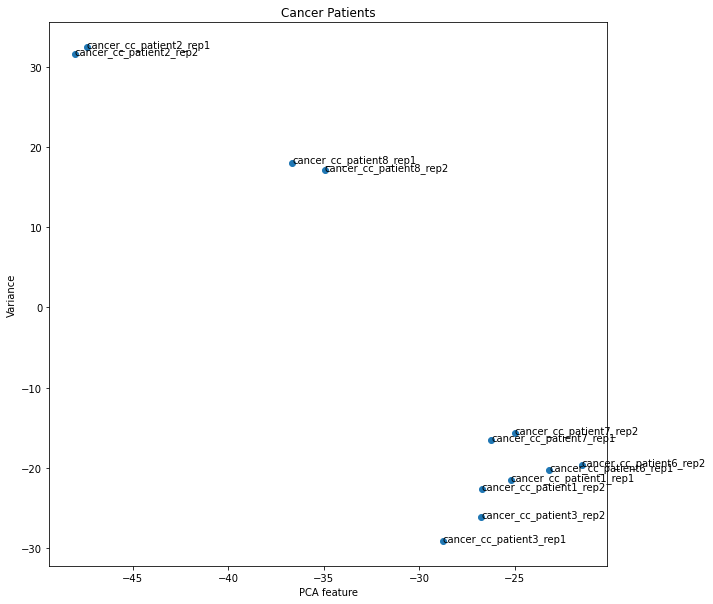

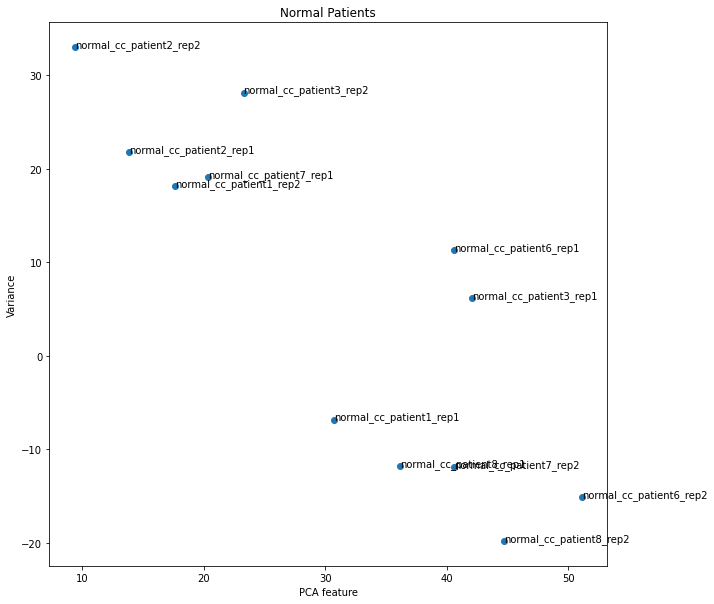

In [102]:
#cancer patients
cancer_qn = df_qn_cs_bc.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_qn):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
non_cancer_qn = df_qn_cs_bc.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(non_cancer_qn):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

In [103]:
df_qn_cs_bc

Unnamed: 0                  Q9UBE0     Q9BSJ8     P02656     O95741  \
cancer_cc_patient1_rep1  15.334563  15.348175  18.054654  12.344448   
cancer_cc_patient1_rep2  15.402300  15.296213  18.027199  12.358265   
cancer_cc_patient2_rep1  15.108677  16.523151  16.836522  12.542757   
cancer_cc_patient2_rep2  15.094248  16.715812  16.883938  12.358265   
cancer_cc_patient3_rep1  14.815635  15.173593  17.294806  12.630105   
cancer_cc_patient3_rep2  15.116204  15.335786  17.256008  12.393744   
cancer_cc_patient6_rep1  15.092305  15.652587  17.456716  12.042943   
cancer_cc_patient6_rep2  15.278692  15.423331  17.593953  12.358265   
cancer_cc_patient7_rep1  15.187030  15.892125  17.395315  12.433242   
cancer_cc_patient7_rep2  15.149084  15.891390  17.404799  12.649732   
cancer_cc_patient8_rep1  15.260393  16.506101  16.585328  12.126944   
cancer_cc_patient8_rep2  15.033708  16.490017  16.589819  12.760580   
normal_cc_patient1_rep1  14.423723  15.512430  17.741579  14.155284   
normal_cc_patient1_rep2  14.787410  15.915722  17.950670  14.289985   
normal_cc_patient2_rep1  15.098870  16.092446  16.502273  12.180221   
normal_cc_patient2_rep2  14.969096  16.095886  17.200232  13.048371   
normal_cc_patient3_rep1  14.631736  15.448867  18.067615  13.703657   
normal_cc_patient3_rep2  14.839756  15.861459  18.102970  14.031494   
normal_cc_patient6_rep1  14.393027  15.516566  17.354912  12.591010   
normal_cc_patient6_rep2  14.324361  15.359067  17.223812  12.733631   
normal_cc_patient7_rep1  14.671554  15.819404  16.991015  13.553933   
normal_cc_patient7_rep2  14.400496  15.531918  17.000951  13.357162   
normal_cc_patient8_rep1  14.701684  15.195841  17.391903  12.284492   
normal_cc_patient8_rep2  14.488799  15.395601  17.328958  12.674422   

Unnamed: 0                  P09651     P55809     Q15631     Q96EY1  \
cancer_cc_patient1_rep1  16.708700  16.648177  16.689282  16.542120   
cancer_cc_patient1_rep2  16.830907  16.576122  16.732684  16.491483   
cancer_cc_patient2_rep1  17.041994  16.772551  16.502705  16.018217   
cancer_cc_patient2_rep2  17.015420  16.227043  16.615522  15.908864   
cancer_cc_patient3_rep1  16.640518  16.413260  16.491565  15.763433   
cancer_cc_patient3_rep2  16.730551  16.474643  16.599296  15.848468   
cancer_cc_patient6_rep1  16.785005  16.746905  17.026327  15.914279   
cancer_cc_patient6_rep2  16.642944  16.685705  16.812962  15.996659   
cancer_cc_patient7_rep1  16.487905  16.475935  16.518806  15.671572   
cancer_cc_patient7_rep2  16.540893  16.191591  16.260396  15.880125   
cancer_cc_patient8_rep1  17.124882  16.567308  16.495801  16.651092   
cancer_cc_patient8_rep2  17.064048  16.575284  16.458104  16.678602   
normal_cc_patient1_rep1  16.820360  16.755881  16.329705  16.329803   
normal_cc_patient1_rep2  16.889322  17.129340  16.803389  16.567276   
normal_cc_patient2_rep1  16.762736  17.006696  16.585098  16.494324   
normal_cc_patient2_rep2  16.784511  17.250537  16.734916  16.653306   
normal_cc_patient3_rep1  16.547937  16.793266  16.524534  16.474191   
normal_cc_patient3_rep2  16.808026  17.159466  16.762663  16.583089   
normal_cc_patient6_rep1  16.449097  17.170067  16.445809  16.555173   
normal_cc_patient6_rep2  16.251615  16.954740  16.143821  16.192658   
normal_cc_patient7_rep1  16.691451  16.780398  16.359067  16.444923   
normal_cc_patient7_rep2  16.154912  16.671034  16.155793  16.017016   
normal_cc_patient8_rep1  15.987320  17.913103  16.175264  16.173143   
normal_cc_patient8_rep2  16.068521  17.582541  15.964380  16.187053   

Unnamed: 0                  Q16706     Q9UID3  ...     P50395     P21283  \
cancer_cc_patient1_rep1  16.023629  10.004216  ...  18.510101  16.764438   
cancer_cc_patient1_rep2  16.194521  10.025597  ...  18.472505  16.870654   
cancer_cc_patient2_rep1  16.306182  11.290940  ...  19.227763  15.662974   
cancer_cc_patient2_rep2  16.335774  11.285349  ...  19.038121  15.649679   
cancer_cc_patient3_rep1  16.883605  10.825385  ...  19.122051  16.48

## Sanity Check: P value of lost genes and lost pathways

### Obtain the pvalues of the global correction and class specific correction unique genes

In [104]:
#the following are the variables of the unique genes 
global_bc_unique_afterMTC = bc_unique #global correction's unique genes after MTC 
global_bc_unique_beforeMTC = bc_beforeMTC - csbc_beforeMTC #global correction's unique genes before MTC 

index_globalbc_beforeMTC = []
index_globalbc_afterMTC = []
lostgenes_pvalues_beforeMTC = []
lostgenes_pvalues_afterMTC = []

##obtain the index of unique genes in whole dataset batch correction (for before MTC/after MTC)
#for afterMTC 
for deg in global_bc_unique_afterMTC:
    index_globalbc_afterMTC.append(ttest_deg_corrected_sorted_bc.index(deg))

#for beforeMTC 
for deg in global_bc_unique_beforeMTC:
    index_globalbc_beforeMTC.append(ttest_deg_sorted_bc.index(deg))

##access the pvalues of unique genes based on index of unique genes (for before MTC/after MTC)
#for afterMTC
for j in index_globalbc_afterMTC:
    #print(ttest_deg_pvalue_corrected_sorted_bc[j])
    lostgenes_pvalues_afterMTC.append(ttest_deg_pvalue_corrected_sorted_bc[j])

#for beforeMTC
for j in index_globalbc_beforeMTC:
    #print(ttest_deg_pvalue_bc[j])
    lostgenes_pvalues_beforeMTC.append(ttest_deg_pvalue_bc[j])

print(len(lostgenes_pvalues_beforeMTC))
#print(lostgenes_pvalues_afterMTC)

32


In [105]:
global_bc_unique_beforeMTC

{'APOL1',
 'C9',
 'CCDC51',
 'DDX46',
 'DEK',
 'DNAJA1',
 'ECPAS',
 'GMPS',
 'GPX1',
 'IARS1',
 'IGHV4-34',
 'IL18',
 'IST1',
 'ITIH5',
 'KANK3',
 'LRRFIP1',
 'MPP1',
 'MRPL15',
 'NCKAP5L',
 'PAFAH1B3',
 'PDPR',
 'PECR',
 'PRCP',
 'PTPRC',
 'REEP5',
 'RNF213',
 'RPS10',
 'RUFY3',
 'SCAMP2',
 'TAP2',
 'TM9SF4',
 'TSPAN7'}

In [106]:
len(global_bc_unique_beforeMTC)

32

## Check for difference in pvalues from alpha

In [107]:
for items in lostgenes_pvalues_afterMTC:
    print(0.00001601-items)
for items in lostgenes_pvalues_beforeMTC: 
    print(0.05 - items)

4.631492245961384e-06
3.090105986972697e-06
6.305446252901922e-06
1.256224591050821e-06
1.0578045029466473e-06
1.3619469933285939e-06
3.121889489524294e-06
2.5977325837797013e-06
4.203214667172012e-07
9.953756330446004e-07
5.253827178805903e-06
1.8056746744953285e-06
3.613080413758625e-06
9.366104327250562e-07
6.624375872576664e-07
0.012424337983152449
0.0017024795769750994
0.0012948239176634596
0.0025157976368807566
0.006301642394042822
0.005450071468678909
0.003302645301734658
0.006851898058481014
0.0033152088619507886
0.004713090069666068
0.005446748891636516
0.011646810125173102
0.009399909424245775
0.013139328229783823
0.002479879310391897
0.0030105464681306066
0.010676338308746619
0.0004630956371439454
0.005438479818556413
0.001436561654616371
0.014972116680868078
0.0011360727923387798
0.0012657419992809435
0.003510160293058895
0.002153897183096859
0.004882624328552854
0.0013693714557363318
0.012421412634907293
0.000781106079070254
0.0026337524890308744
0.0019440270052848221
0.00

In [108]:
len(nc_beforeMTC - csbc_beforeMTC)

540

## Plot PCA using the unique genes in global correction before MTC 

In [109]:
df_global_bc_unique_beforeMTC = df_bc_sorted[global_bc_unique_beforeMTC]
df_global_bc_unique_beforeMTC

IGHV4-34       PDPR        DEK     CCDC51  \
cancer_cc_patient1_rep1  15.609393  17.019403  15.846610  11.676502   
cancer_cc_patient1_rep2  16.046937  17.370475  16.105000  12.272933   
cancer_cc_patient2_rep1  15.675519  16.857197  16.223422  12.409506   
cancer_cc_patient2_rep2  15.757362  17.111870  16.389415  12.529784   
cancer_cc_patient3_rep1  15.409709  16.700041  16.014290  11.577897   
cancer_cc_patient3_rep2  15.085136  16.627565  15.555675  11.190779   
cancer_cc_patient6_rep1  15.419928  16.759068  16.045856  11.569015   
cancer_cc_patient6_rep2  15.174959  16.658494  15.915580  11.373833   
cancer_cc_patient7_rep1  14.988646  16.244798  15.848606  11.112343   
cancer_cc_patient7_rep2  15.431731  16.613839  15.838340  11.171001   
cancer_cc_patient8_rep1  15.542330  17.219611  16.476534  12.607559   
cancer_cc_patient8_rep2  15.282796  16.914380  15.986471  11.836699   
normal_cc_patient1_rep1  15.657428  17.171101  15.990772  12.535853   
normal_cc_patient1_rep2  15.992684  17.349067  16.294487  12.588809   
normal_cc_patient2_rep1  16.139871  17.251624  15.757096  12.362359   
normal_cc_patient2_rep2  16.233497  17.307523  15.990429  12.892791   
normal_cc_patient3_rep1  15.691010  17.172681  15.895523  11.658720   
normal_cc_patient3_rep2  16.023337  17.385710  16.143529  12.792848   
normal_cc_patient6_rep1  15.637672  17.042819  15.738805  12.169351   
normal_cc_patient6_rep2  15.478459  16.678313  15.501985  11.542261   
normal_cc_patient7_rep1  15.641714  17.144917  15.563990  12.110537   
normal_cc_patient7_rep2  15.406568  16.723402  15.545391  11.890994   
normal_cc_patient8_rep1  15.419586  16.899532  15.640117  12.318148   
normal_cc_patient8_rep2  15.361175  16.821371  15.547518  11.646955   

                             IARS1       GPX1     DNAJA1       MPP1  \
cancer_cc_patient1_rep1  16.171343  17.492528  15.968878  13.964797   
cancer_cc_patient1_rep2  16.683887  17.684700  15.866880  13.982378   
cancer_cc_patient2_rep1  17.411344  18.436745  16.836231  14.368336   
cancer_cc_patient2_rep2  17.344366  18.532596  16.809339  14.350230   
cancer_cc_patient3_rep1  16.220983  17.503598  15.795146  13.811332   
cancer_cc_patient3_rep2  16.254627  17.455899  15.524420  13.772640   
cancer_cc_patient6_rep1  16.331824  17.424338  15.902784  13.640617   
cancer_cc_patient6_rep2  15.950234  17.282298  15.703418  13.727394   
cancer_cc_patient7_rep1  16.503851  17.532288  15.638511  13.699069   
cancer_cc_patient7_rep2  15.866144  17.371503  15.498644  13.340896   
cancer_cc_patient8_rep1  16.575311  18.366293  16.606095  13.990198   
cancer_cc_patient8_rep2  16.408740  17.917268  16.207845  13.780415   
normal_cc_patient1_rep1  16.003446  17.378980  15.616213  14.463968   
normal_cc_patient1_rep2  16.354909  17.771551  15.950262  14.611878   
normal_cc_patient2_rep1  16.245366  17.470389  15.707887  14.374541   
normal_cc_patient2_rep2  16.511845  17.863646  16.077308  14.444723   
normal_cc_patient3_rep1  16.081475  17.431580  15.492478  14.304538   
normal_cc_patient3_rep2  16.540801  17.818082  15.880493  14.394017   
normal_cc_patient6_rep1  16.214912  17.307555  15.763000  14.316526   
normal_cc_patient6_rep2  15.562824  17.171115  15.469882  13.820547   
normal_cc_patient7_rep1  16.284917  17.540225  15.926384  14.407327   
normal_cc_patient7_rep2  15.988118  17.041035  15.704728  13.861731   
normal_cc_patient8_rep1  15.919213  17.148668  15.559697  13.449890   
normal_cc_patient8_rep2  15.864396  17.145756  15.369121  13.566906   

                              IST1      RPS10  ...    NCKAP5L      REEP5  \
cancer_cc_patient1_rep1  16.059600  17.641394  ...  12.983112  16.882684   
cancer_cc_patient1_rep2  16.276258  18.021709  ...  13.350574  16.894642   
cancer_cc_patient2_rep1  16.031330  18.888273  ...  14.100885  16.988962   
cancer_cc_patient2_rep2  16.297720  19.156895  ...  14.210721  17.195962   
cancer_cc_patient3_rep1  16.555930  17.114548  ...  13.066381  16.468624   
cancer_cc_patient3

Proportion of Variance Explained :  [0.53666667 0.11605594]


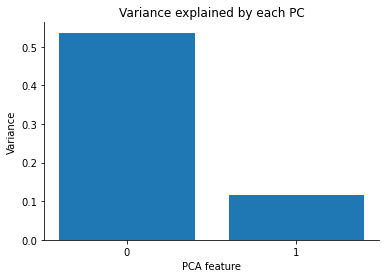

<function matplotlib.pyplot.show(close=None, block=None)>

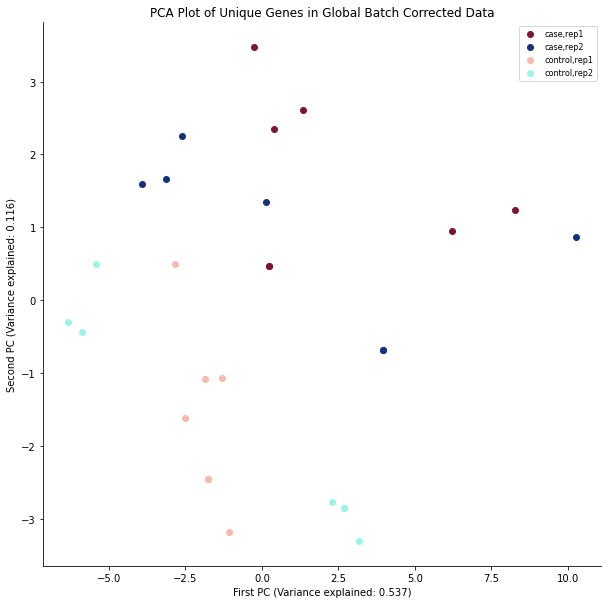

In [110]:
#This block performs the PCA on the global batch corrected unique genes before MTC (cancer subpopulation information that we have lost)
#scale the data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_global_bc_unique_beforeMTC)
scaled_global_bc_unique_beforeMTC = scaler.transform(df_global_bc_unique_beforeMTC)

pca = PCA(n_components=2)
pca.fit(scaled_global_bc_unique_beforeMTC)
scaled_global_bc_unique_beforeMTC

#run PCA 
x_pca = pca.transform(scaled_global_bc_unique_beforeMTC)
scaled_global_bc_unique_beforeMTC.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  

plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(10,10))
plt.xlabel("First PC (Variance explained: 0.537)")
plt.ylabel("Second PC (Variance explained: 0.116)")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 8})
plt.title("PCA Plot of Unique Genes in Global Batch Corrected Data")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show

Text(0, 0.5, 'Variance')

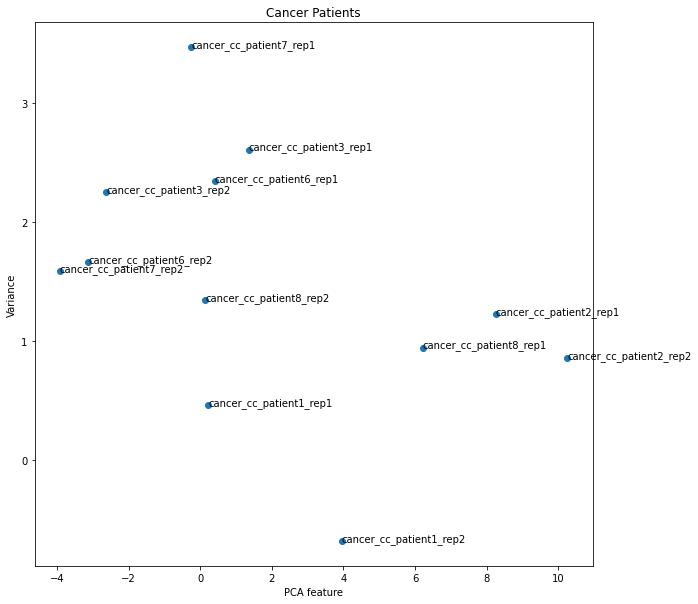

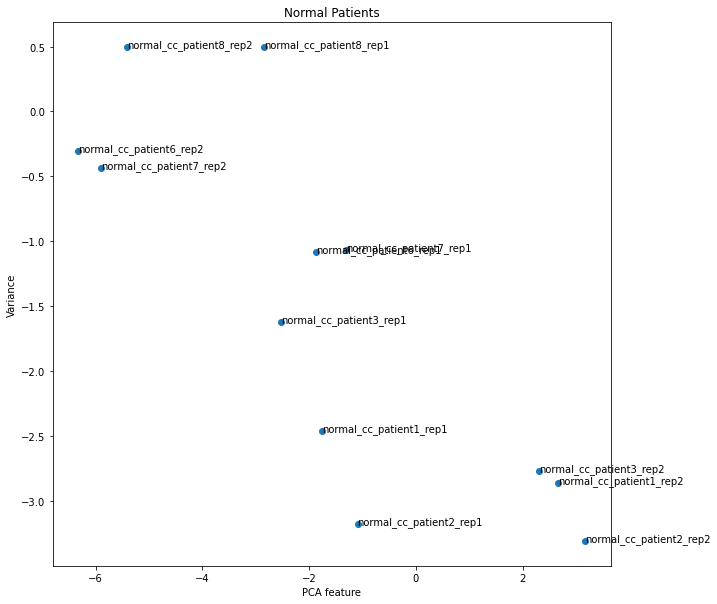

In [111]:
#cancer patients
cancer_global_bc_unique_beforeMTC = df_global_bc_unique_beforeMTC.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_global_bc_unique_beforeMTC):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
non_cancer_global_bc_unique_beforeMTC = df_global_bc_unique_beforeMTC.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(non_cancer_global_bc_unique_beforeMTC):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

## Plot PCA using the global corrected unique genes in class specific data

Proportion of Variance Explained :  [0.50365207 0.11452535]


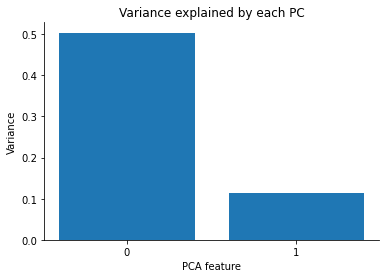

<function matplotlib.pyplot.show(close=None, block=None)>

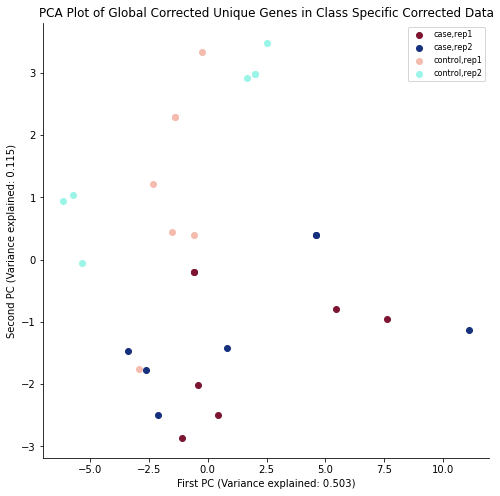

In [112]:
df_global_bc_unique_beforeMTC_in_csbc = class_specific_merge_sorted[global_bc_unique_beforeMTC]
#This block performs the PCA on the global batch correction data uniques genes after MTC (useless information that we have gained from class specific batch correction)
#scale the data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_global_bc_unique_beforeMTC_in_csbc)
scaled_df_global_bc_unique_beforeMTC_in_csbc = scaler.transform(df_global_bc_unique_beforeMTC_in_csbc)

pca = PCA(n_components=2)
pca.fit(scaled_df_global_bc_unique_beforeMTC_in_csbc)
scaled_df_global_bc_unique_beforeMTC_in_csbc

#run PCA 
x_pca = pca.transform(scaled_df_global_bc_unique_beforeMTC_in_csbc)
scaled_df_global_bc_unique_beforeMTC_in_csbc.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  

plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.503)")
plt.ylabel("Second PC (Variance explained: 0.115)")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 8})
plt.title("PCA Plot of Global Corrected Unique Genes in Class Specific Corrected Data")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show

Text(0, 0.5, 'Variance')

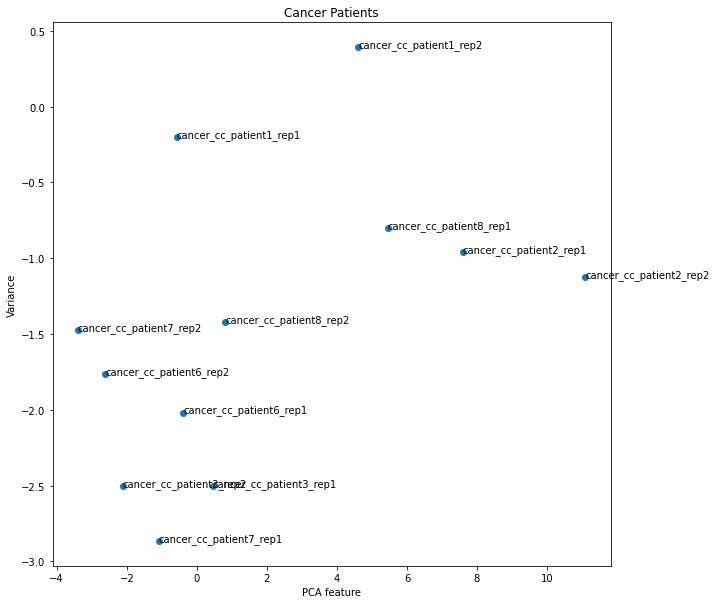

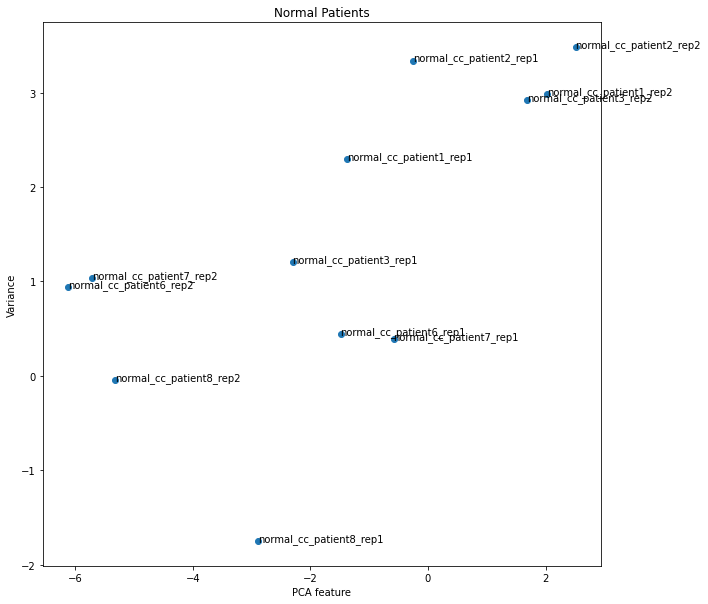

In [113]:
#cancer patients
cancer_df_global_bc_unique_beforeMTC_in_csbc = df_global_bc_unique_beforeMTC_in_csbc.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_df_global_bc_unique_beforeMTC_in_csbc):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
control_df_global_bc_unique_beforeMTC_in_csbc = df_global_bc_unique_beforeMTC_in_csbc.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(control_df_global_bc_unique_beforeMTC_in_csbc):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

## Plot PCA using the unique genes in global correction after MTC 

In [114]:
#obtain the dataframe of the unique genes in global correction after MTC
df_global_bc_unique_afterMTC = df_bc_sorted[global_bc_unique_afterMTC]

Proportion of Variance Explained :  [0.63269873 0.16239654]


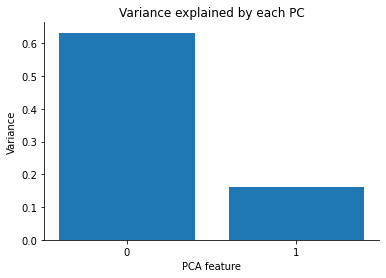

<function matplotlib.pyplot.show(close=None, block=None)>

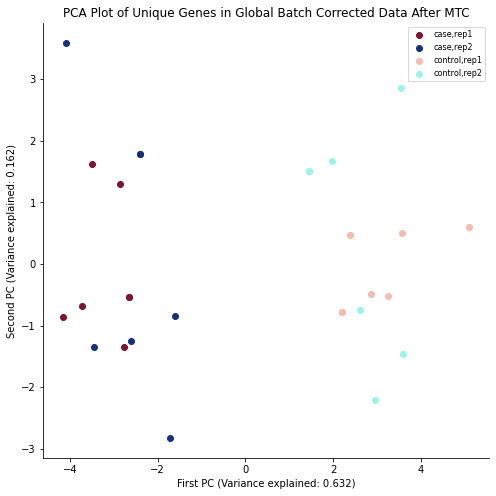

In [115]:
#This block performs the PCA on the global batch correction data uniques genes after MTC (useless information that we have gained from class specific batch correction)
#scale the data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_global_bc_unique_afterMTC)
scaled_df_global_bc_unique_afterMTC  = scaler.transform(df_global_bc_unique_afterMTC)

pca = PCA(n_components=2)
pca.fit(scaled_df_global_bc_unique_afterMTC)
scaled_df_global_bc_unique_afterMTC

#run PCA 
x_pca = pca.transform(scaled_df_global_bc_unique_afterMTC)
scaled_df_global_bc_unique_afterMTC.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  

plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.632)")
plt.ylabel("Second PC (Variance explained: 0.162)")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 8})
plt.title("PCA Plot of Unique Genes in Global Batch Corrected Data After MTC")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show

Text(0, 0.5, 'Variance')

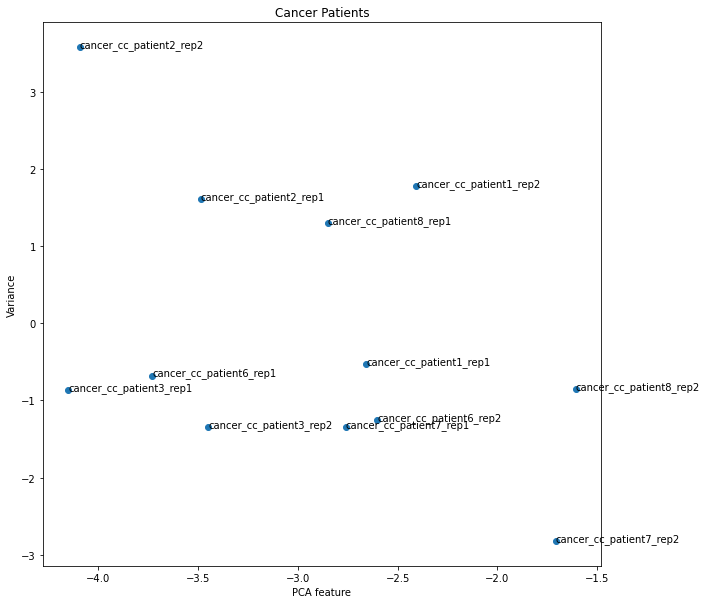

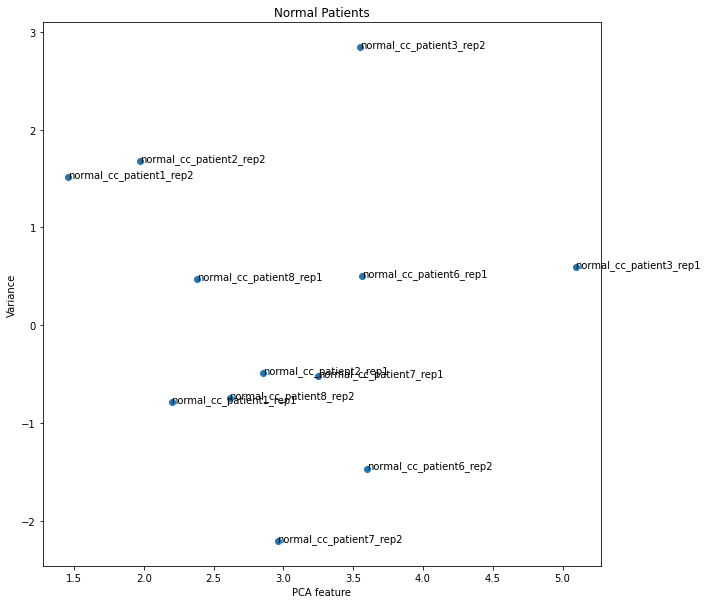

In [116]:
#proportion of variance explained after MTC 
#cancer patients
cancer_global_bc_unique_afterMTC = df_global_bc_unique_afterMTC.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_global_bc_unique_afterMTC):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
non_cancer_global_bc_unique_afterMTC = df_global_bc_unique_afterMTC.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(non_cancer_global_bc_unique_afterMTC):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

## Plot PCA using the global corrected unique genes in class specific batch correction after MTC

In [117]:
df_global_bc_unique_afterMTC_in_csbc = class_specific_merge_sorted[global_bc_unique_afterMTC]

Proportion of Variance Explained :  [0.62403639 0.15734949]


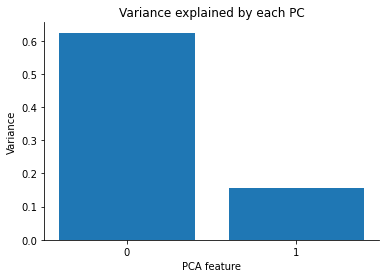

<function matplotlib.pyplot.show(close=None, block=None)>

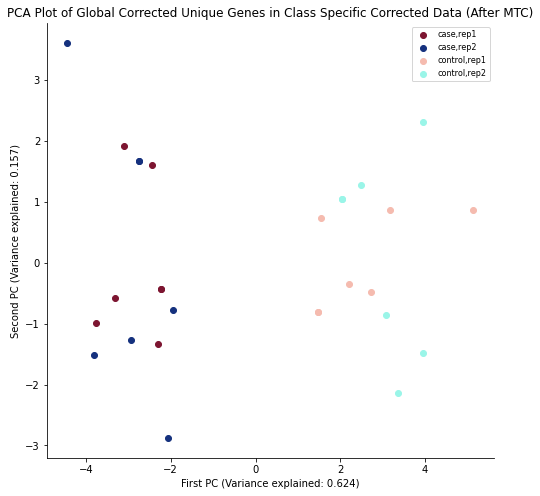

In [118]:
#This block performs the PCA on the global batch correction data uniques genes after MTC (useless information that we have gained from class specific batch correction)
#scale the data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_global_bc_unique_afterMTC_in_csbc)
scaled_df_global_bc_unique_afterMTC_in_csbc = scaler.transform(df_global_bc_unique_afterMTC_in_csbc)

pca = PCA(n_components=2)
pca.fit(scaled_df_global_bc_unique_afterMTC_in_csbc)
scaled_df_global_bc_unique_afterMTC_in_csbc

#run PCA 
x_pca = pca.transform(scaled_df_global_bc_unique_afterMTC_in_csbc)
scaled_df_global_bc_unique_afterMTC_in_csbc.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  

plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.624)")
plt.ylabel("Second PC (Variance explained: 0.157)")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 8})
plt.title("PCA Plot of Global Corrected Unique Genes in Class Specific Corrected Data (After MTC)")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show

Text(0, 0.5, 'Variance')

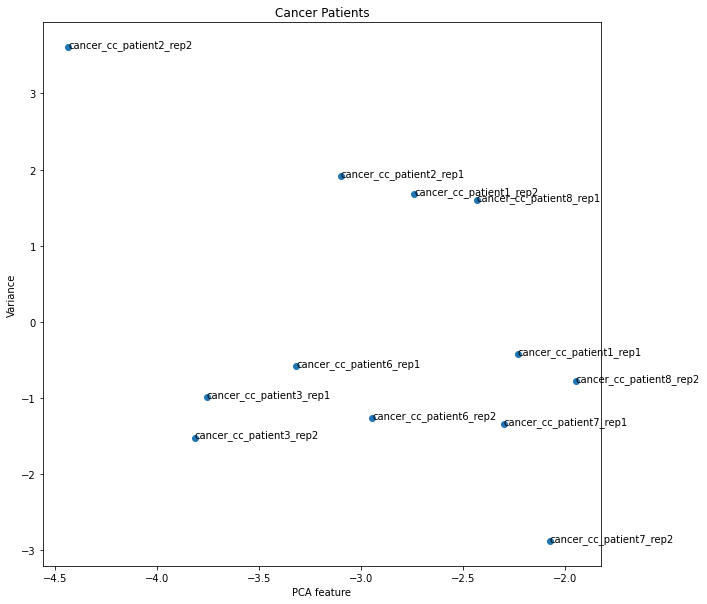

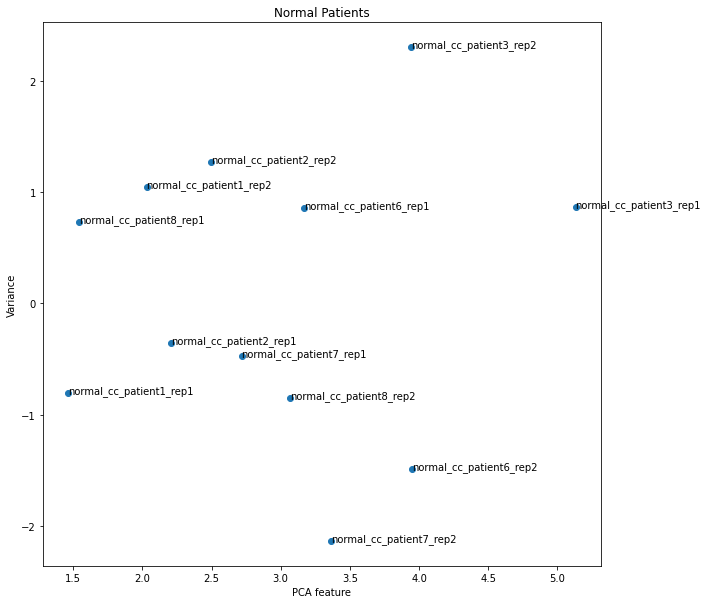

In [119]:
#proportion of variance explained after MTC 
#cancer patients
cancer_df_global_bc_unique_afterMTC_in_csbc = df_global_bc_unique_afterMTC_in_csbc.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_df_global_bc_unique_afterMTC_in_csbc):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
control_df_global_bc_unique_afterMTC_in_csbc = df_global_bc_unique_afterMTC_in_csbc.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(control_df_global_bc_unique_afterMTC_in_csbc):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

In [120]:
#obtain the dataframe of the unique genes in global correction after MTC (useless information that we have gained from class specific batch correction)
class_specific_unique_beforeMTC = csbc_beforeMTC - (bc_beforeMTC.intersection(csbc_beforeMTC))
class_specific_unique_afterMTC = csbc_afterMTC - (bc_afterMTC.intersection(csbc_afterMTC))
df_class_specific_unique_beforeMTC = class_specific_merge_sorted[class_specific_unique_beforeMTC]
df_class_specific_unique_beforeMTC

CBX5      LMNB1      REXO2       SKP1  \
cancer_cc_patient1_rep1  13.827332  16.565689  16.848369  17.505764   
cancer_cc_patient1_rep2  13.931959  17.229002  16.643092  17.475767   
cancer_cc_patient2_rep1  14.355898  17.474867  16.778918  17.076243   
cancer_cc_patient2_rep2  14.566613  17.712626  17.026712  17.162674   
cancer_cc_patient3_rep1  13.893126  17.246704  16.386477  17.355659   
cancer_cc_patient3_rep2  14.142736  17.041798  16.495353  17.276467   
cancer_cc_patient6_rep1  13.650799  17.010556  16.850895  17.693315   
cancer_cc_patient6_rep2  14.029037  17.098264  16.734353  17.580946   
cancer_cc_patient7_rep1  14.476943  16.624746  17.001659  17.291430   
cancer_cc_patient7_rep2  13.617591  16.606206  16.912122  17.307135   
cancer_cc_patient8_rep1  14.812231  17.319881  17.466912  17.820555   
cancer_cc_patient8_rep2  14.646152  17.013359  17.119327  17.291878   
normal_cc_patient1_rep1  13.900941  17.496429  17.237641  17.684617   
normal_cc_patient1_rep2  14.109362  17.263278  17.273130  17.776085   
normal_cc_patient2_rep1  13.885663  17.710277  17.239648  17.109414   
normal_cc_patient2_rep2  13.974866  17.372425  17.333385  17.418548   
normal_cc_patient3_rep1  13.916441  17.862123  16.938481  16.994925   
normal_cc_patient3_rep2  14.145116  17.538057  17.259419  17.270511   
normal_cc_patient6_rep1  13.782593  17.598737  17.199312  17.005941   
normal_cc_patient6_rep2  13.906718  16.790628  16.883265  16.854052   
normal_cc_patient7_rep1  13.290297  17.451470  17.160368  17.007105   
normal_cc_patient7_rep2  13.687766  16.941326  16.813101  16.801345   
normal_cc_patient8_rep1  13.923944  17.943832  16.833410  15.939236   
normal_cc_patient8_rep2  14.024291  16.920501  16.740715  17.135150   

                              DMTN    FAM91A1     DNAJC9     MINDY1       GLO1  
cancer_cc_patient1_rep1  15.653127  10.913346  14.202308  16.001828  17.799308  
cancer_cc_patient1_rep2  15.929438  11.450007  14.519139  16.196803  17.728327  
cancer_cc_patient2_rep1  15.661652  11.995150  14.172913  16.530389  17.975908  
cancer_cc_patient2_rep2  15.800275  12.214645  14.527350  16.559215  17.997350  
cancer_cc_patient3_rep1  16.258587   9.905089  14.675803  16.031201  17.797842  
cancer_cc_patient3_rep2  16.136474  11.231033  14.222096  16.026489  17.907151  
cancer_cc_patient6_rep1  15.756665  11.556527  14.310823  16.202531  18.411911  
cancer_cc_patient6_rep2  16.305055  11.418863  14.109405  15.961053  18.036695  
cancer_cc_patient7_rep1  15.546251  11.174934  13.883997  16.298792  18.561910  
cancer_cc_patient7_rep2  16.025969  12.026161  14.161720  15.957939  18.247745  
cancer_cc_patient8_rep1  15.712141  12.182641  14.192415  16.562462  18.062986  
cancer_cc_patient8_rep2  15.828623  11.979545  14.088118  16.099833  18.156298  
normal_cc_patient1_rep1  15.627245  10.503769  14.172258  16.509610  17.800221  
normal_cc_patient1_rep2  15.800742  11.364197  14.555478  16.488284  17.732200  
normal_cc_patient2_rep1  15.536432  11.220502  13.922145  16.503139  17.873945  
normal_cc_patient2_rep2  15.716852  11.362866  14.228723  16.535354  17.818116  
normal_cc_patient3_rep1  15.472498  11.017945  14.043323  16.559299  18.037524  
normal_cc_patient3_rep2  15.732026  11.095225  14.382994  16.602250  17.893776  
normal_cc_patient6_rep1  15.299998  10.903935  14.013554  16.459740  18.007257  
normal_cc_patient6_rep2  16.496201  10.755067  13.691822  16.140562  17.735499  
normal_cc_patient7_rep1  15.153454  11.218676  14.175662  16.400898  17.904896  
normal_cc_patient7_rep2  15.695827  10.705103  13.735722  16.081073  17.773651  
normal_cc_patient8_rep1  15.513521  10.651732  13.805143  16.253908  18.152044  
normal_cc_patient8_rep2  15.385373  11.566230  13.848897  16.169970  17.855148

Proportion of Variance Explained :  [0.29656362 0.23272114]


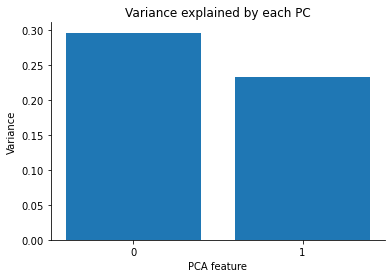

<function matplotlib.pyplot.show(close=None, block=None)>

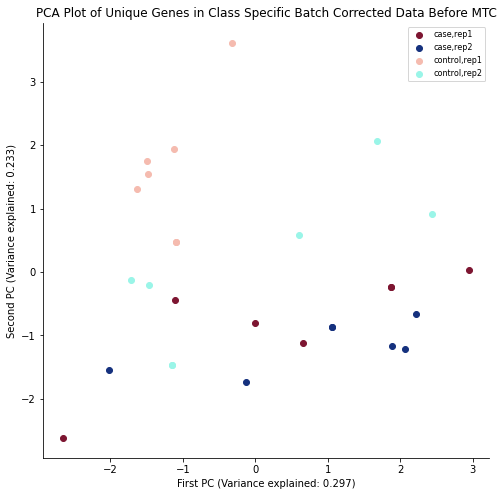

In [121]:
#This block performs the PCA on class specific corrected data uniques genes after MTC (useless information that we have gained from class specific batch correction)
#scale the data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_class_specific_unique_beforeMTC)
scaled_df_class_specific_unique_beforeMTC  = scaler.transform(df_class_specific_unique_beforeMTC)

pca = PCA(n_components=2)
pca.fit(scaled_df_class_specific_unique_beforeMTC)
scaled_df_class_specific_unique_beforeMTC

#run PCA 
x_pca = pca.transform(scaled_df_class_specific_unique_beforeMTC)
scaled_df_class_specific_unique_beforeMTC

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  

plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.297)")
plt.ylabel("Second PC (Variance explained: 0.233)")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 8})
plt.title("PCA Plot of Unique Genes in Class Specific Batch Corrected Data Before MTC")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show

Text(0, 0.5, 'Variance')

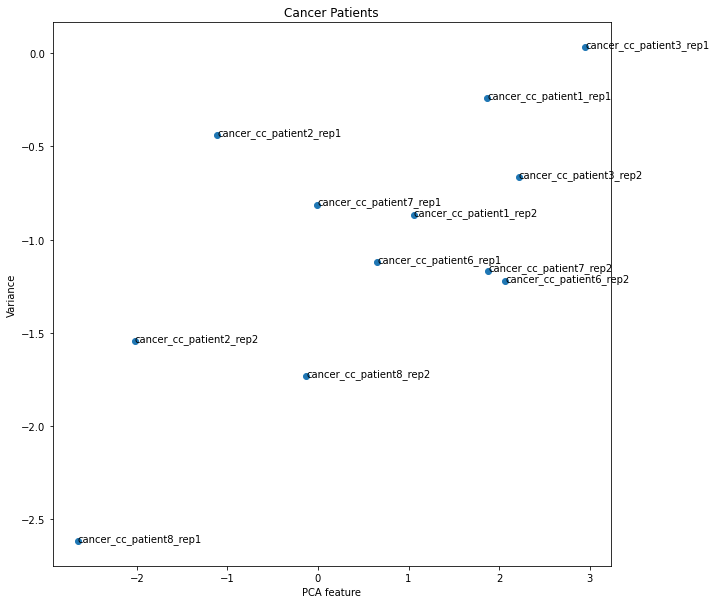

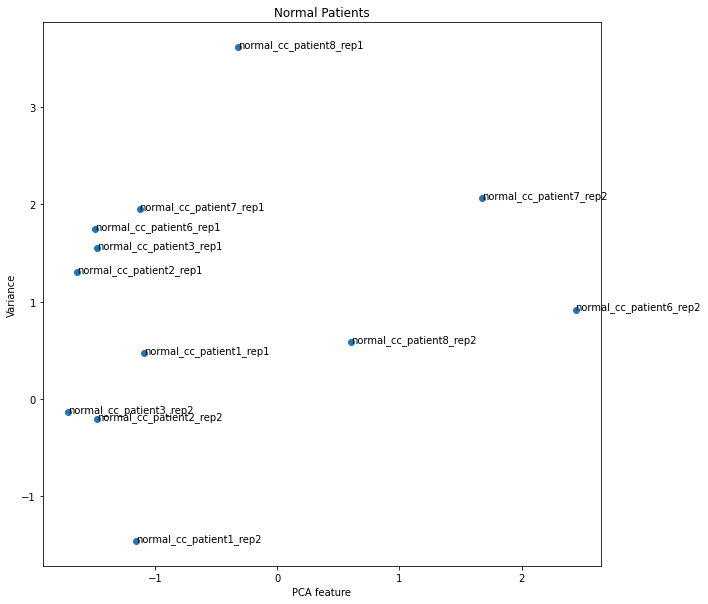

In [122]:
#proportion of variance explained after MTC 
#cancer patients
cancer_classspecific_bc_unique_beforeMTC = df_class_specific_unique_beforeMTC.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_classspecific_bc_unique_beforeMTC):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
non_cancer_classspecific_bc_unique_beforeMTC = df_class_specific_unique_beforeMTC.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(non_cancer_classspecific_bc_unique_beforeMTC):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

## Plot PCA using the unique genes in class specific batch correction after MTC 

In [123]:
#obtain the dataframe of the unique genes in class specific correction after MTC
df_class_specific_unique_afterMTC = class_specific_merge_sorted[class_specific_unique_afterMTC]

Proportion of Variance Explained :  [0.68788919 0.11397103]


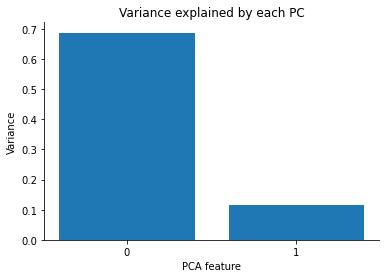

<function matplotlib.pyplot.show(close=None, block=None)>

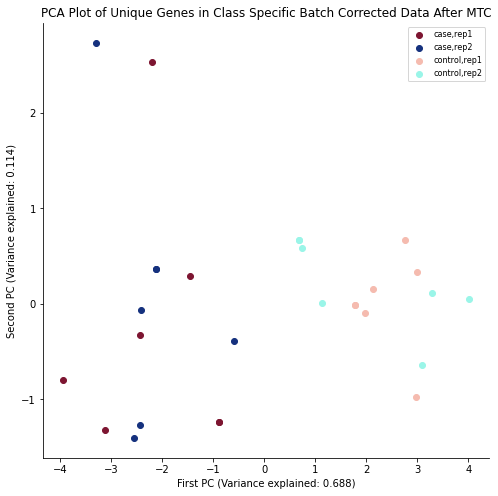

In [124]:
#This block performs the PCA on class specific corrected data uniques genes after MTC (useless information that we have gained from class specific batch correction)
#scale the data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_class_specific_unique_afterMTC)
scaled_df_class_specific_unique_afterMTC  = scaler.transform(df_class_specific_unique_afterMTC)

pca = PCA(n_components=2)
pca.fit(scaled_df_class_specific_unique_afterMTC)
scaled_df_class_specific_unique_afterMTC

#run PCA 
x_pca = pca.transform(scaled_df_class_specific_unique_afterMTC)
scaled_df_class_specific_unique_afterMTC

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  

plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.688)")
plt.ylabel("Second PC (Variance explained: 0.114)")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 8})
plt.title("PCA Plot of Unique Genes in Class Specific Batch Corrected Data After MTC")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show

Text(0, 0.5, 'Variance')

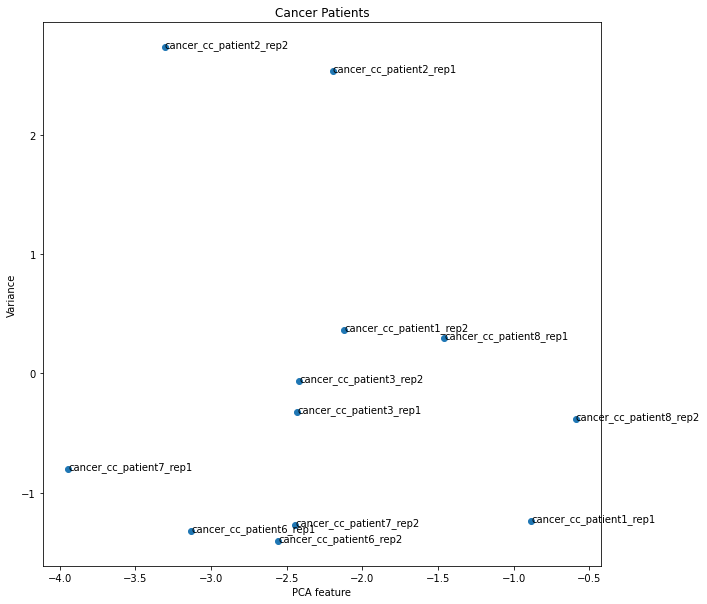

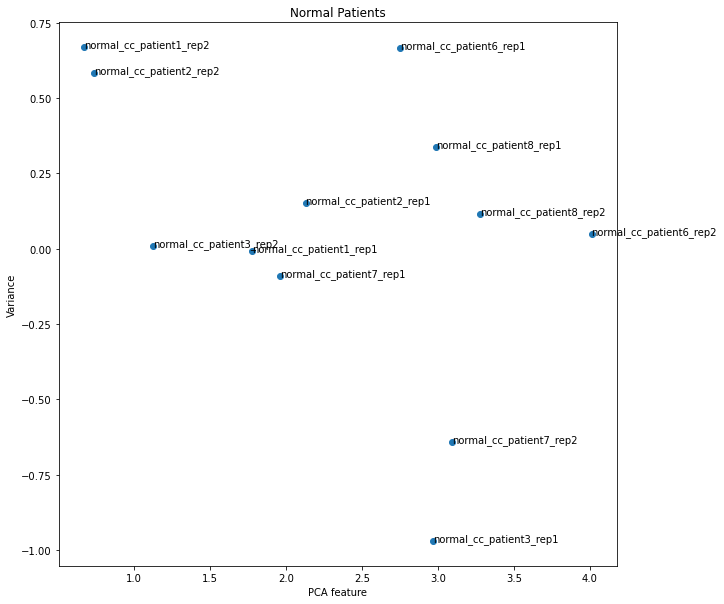

In [125]:
#proportion of variance explained after MTC 
#cancer patients
cancer_classspecific_bc_unique_afterMTC = df_class_specific_unique_afterMTC.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_classspecific_bc_unique_afterMTC):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
non_cancer_classspecific_bc_unique_afterMTC = df_class_specific_unique_afterMTC.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(non_cancer_classspecific_bc_unique_afterMTC):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

# CS quantile investigation

In [126]:
#convert quantile normalised genes before MTC into set 
qn_beforeMTC = set(ttest_deg_sorted_qn_bc)

#convert quantile normalised genes after MTC into set 
qn_afterMTC = set(deg_corrected_sorted_qn_bc)

#obtain intersection (before MTC)
qn_vs_bc_beforeMTC = qn_beforeMTC.intersection(bc_beforeMTC)

#obtain intersection (after MTC)
qn_vs_bc_afterMTC = qn_afterMTC.intersection(bc_afterMTC)

#calculate the Jaccard Index of CS quantile genes vs global batch correction (Before MTC)
len(qn_vs_bc_beforeMTC.intersection(bc_beforeMTC))/len(qn_vs_bc_beforeMTC.union(bc_beforeMTC))

#convert the unique genes in CS Quantile into a dataframe (before MTC)
qn_unique_beforeMTC = qn_beforeMTC - qn_vs_bc_beforeMTC 
df_qn_unique_beforeMTC = df_qn_merge_sorted[qn_unique_beforeMTC]

#convert the unique genes in CS Quantile into a dataframe (after MTC)
qn_unique_afterMTC = qn_afterMTC - qn_vs_bc_afterMTC
df_qn_unique_afterMTC = df_qn_merge_sorted[qn_unique_afterMTC]

## Plot PCA of CS Quantile + CS Batch Corrected unique genes (before MTC)


Proportion of Variance Explained :  [0.46189206 0.10116207]


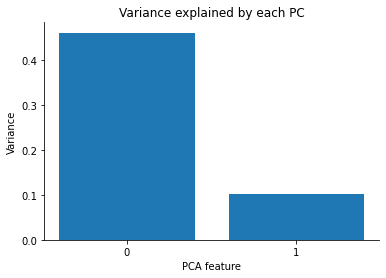

<function matplotlib.pyplot.show(close=None, block=None)>

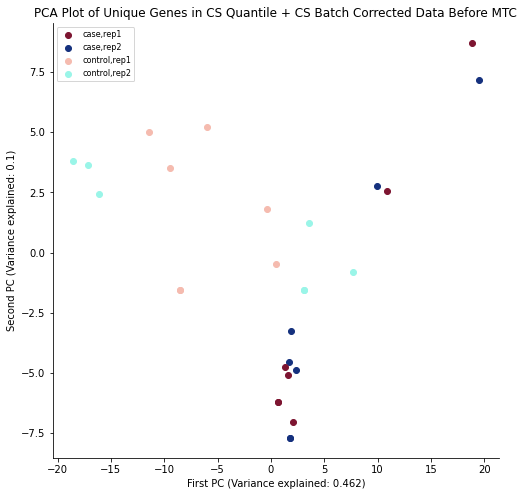

In [127]:
#This block performs the PCA on quantile normalised uniques genes before MTC
#scale the data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_qn_unique_beforeMTC)
scaled_df_qn_unique_beforeMTC  = scaler.transform(df_qn_unique_beforeMTC)

pca = PCA(n_components=2)
pca.fit(scaled_df_qn_unique_beforeMTC)
scaled_df_qn_unique_beforeMTC 

#run PCA 
x_pca = pca.transform(scaled_df_qn_unique_beforeMTC)
scaled_df_qn_unique_beforeMTC 

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  

plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.462)")
plt.ylabel("Second PC (Variance explained: 0.1)")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 8})
plt.title("PCA Plot of Unique Genes in CS Quantile + CS Batch Corrected Data Before MTC")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show

Text(0, 0.5, 'Variance')

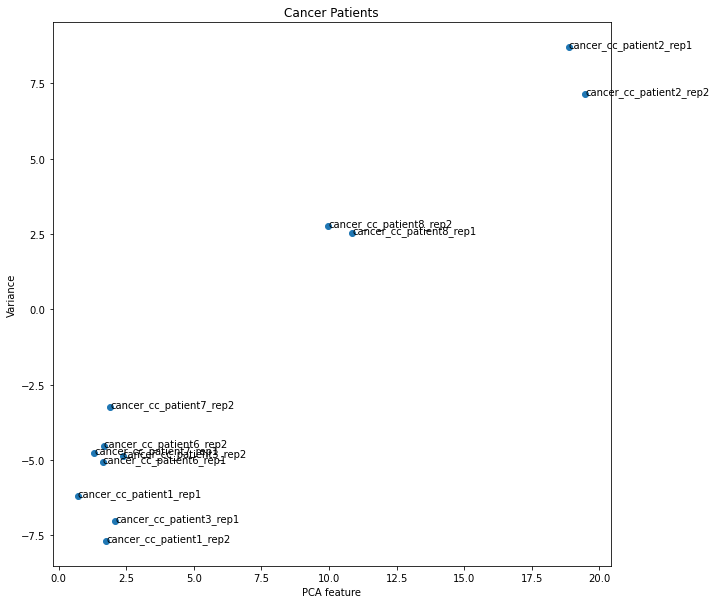

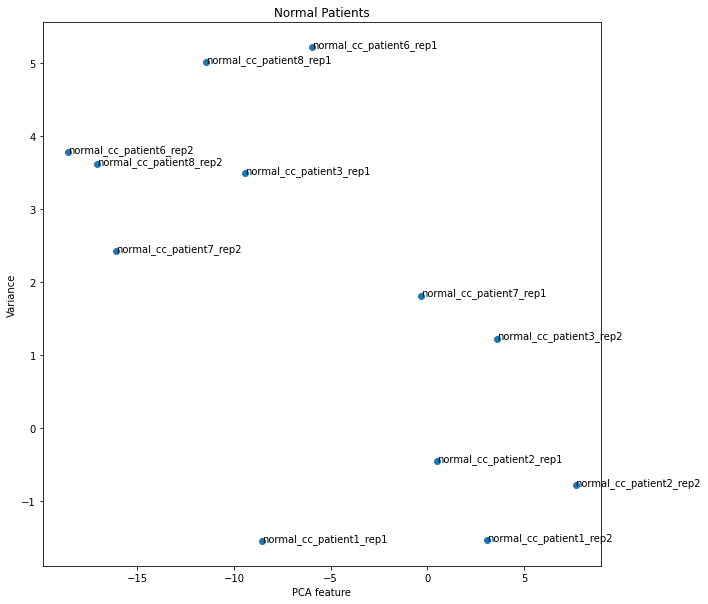

In [128]:
#proportion of variance explained after MTC 
#cancer patients
cancer_df_qn_unique_beforeMTC = df_qn_unique_beforeMTC.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_df_qn_unique_beforeMTC):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
control_df_qn_unique_beforeMTC = df_qn_unique_beforeMTC.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(control_df_qn_unique_beforeMTC):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

## Plot PCA of CS Quantile + CS Batch Corrected unique genes (after MTC)

Proportion of Variance Explained :  [0.67843176 0.09404832]


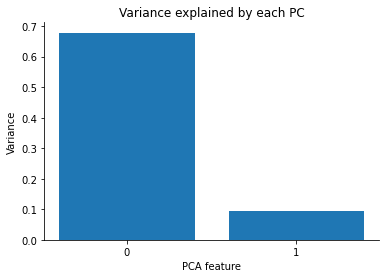

<function matplotlib.pyplot.show(close=None, block=None)>

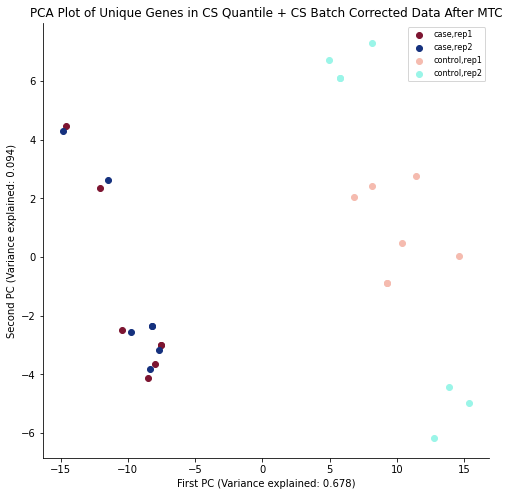

In [129]:
#This block performs the PCA on quantile normalised uniques genes after MTC
#scale the data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from bioinfokit.analys import get_data
from bioinfokit.visuz import cluster

scaler = StandardScaler()
scaler.fit(df_qn_unique_afterMTC)
scaled_df_qn_unique_afterMTC  = scaler.transform(df_qn_unique_afterMTC)

pca = PCA(n_components=2)
pca.fit(scaled_df_qn_unique_afterMTC)

#run PCA 
x_pca = pca.transform(scaled_df_qn_unique_afterMTC)

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  

plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.678)")
plt.ylabel("Second PC (Variance explained: 0.094)")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 8})
plt.title("PCA Plot of Unique Genes in CS Quantile + CS Batch Corrected Data After MTC")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show


Text(0, 0.5, 'Variance')

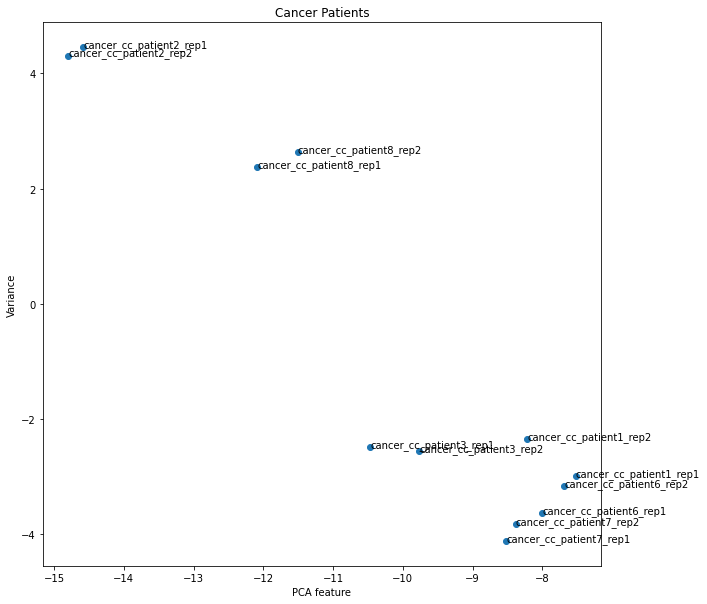

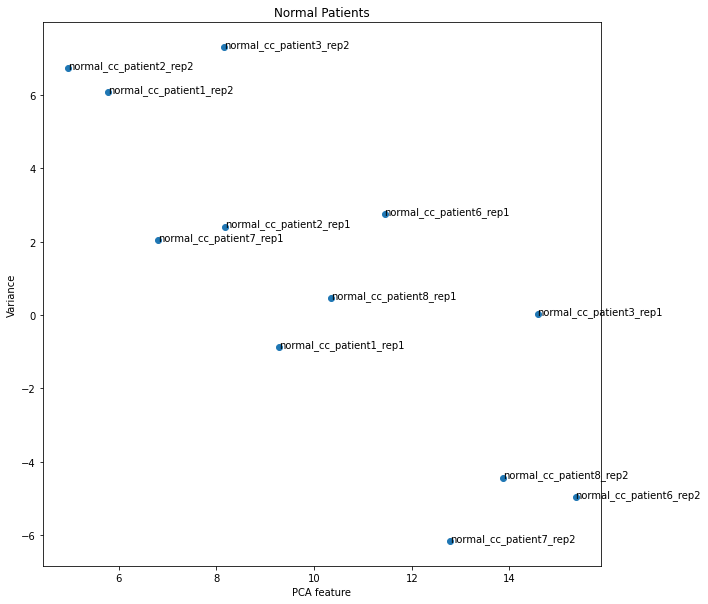

In [130]:
#proportion of variance explained after MTC 
#cancer patients
cancer_df_qn_unique_afterMTC = df_qn_unique_afterMTC.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_df_qn_unique_afterMTC):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
control_df_qn_unique_afterMTC = df_qn_unique_afterMTC.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(control_df_qn_unique_afterMTC):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

In [131]:
#the main aim of this block is to rank the genes based on their loadings in PC1 and 2 
loadingsdf = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2'],index = df_qn_unique_afterMTC.columns)

#obtain the highest loading gene in PC1 
sort_by_PC1 = loadingsdf.sort_values(['PC1'],ascending = False, key = abs)
df_qn_PC1_loadings_sorted = sort_by_PC1['PC1']
df_qn_PC1_loadings_sorted

# #finding highest contributing genes in PC2 
sort_by_PC2= loadingsdf.sort_values(['PC2'],ascending = False, key = abs)
df_qn_PC2_loadings_sorted = sort_by_PC2['PC2']
df_qn_PC2_loadings_sorted.head(n = 20)

# print(sort_by_PC2.head(n=6))
# print(len(sort_by_PC2))

COQ9         0.174891
MIPEP        0.169862
FIS1         0.160119
FBLN7        0.158670
PPME1        0.156484
NDUFB7       0.156126
LHPP         0.153137
NDUFA2       0.152056
MIX23        0.151524
IDH3A        0.150687
LNPEP        0.145278
CCT7         0.144706
ZDHHC1       0.144411
NDUFC2       0.141101
ACOX1        0.139939
VWA8         0.139574
ATG7         0.138406
H6PD         0.136494
HSPD1        0.136426
NIPSNAP3A    0.136083
Name: PC2, dtype: float64

In [132]:
df_special = df_qn_merge_sorted[['COQ9', 'MIPEP', 'FIS1', 'FBLN7', 'PPME1', 'NDUFB7', 'LHPP', 'NDUFA2', 'MIX23', 'IDH3A']]

Proportion of Variance Explained :  [0.8368511  0.05348166]


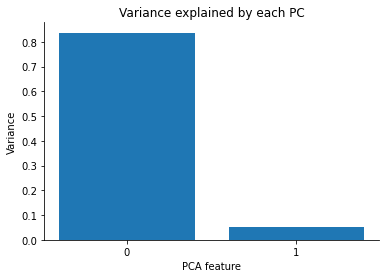

<function matplotlib.pyplot.show(close=None, block=None)>

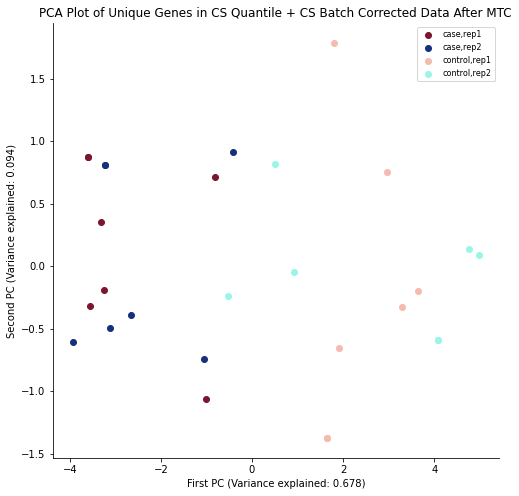

In [133]:
#This block performs the PCA on quantile normalised uniques genes after MTC
#scale the data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from bioinfokit.analys import get_data
from bioinfokit.visuz import cluster

scaler = StandardScaler()
scaler.fit(df_special)
scaled_df_special = scaler.transform(df_special)

pca = PCA(n_components=2)
pca.fit(scaled_df_special)

#run PCA 
x_pca = pca.transform(scaled_df_special)

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  

plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.678)")
plt.ylabel("Second PC (Variance explained: 0.094)")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 8})
plt.title("PCA Plot of Unique Genes in CS Quantile + CS Batch Corrected Data After MTC")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show

Text(0, 0.5, 'Variance')

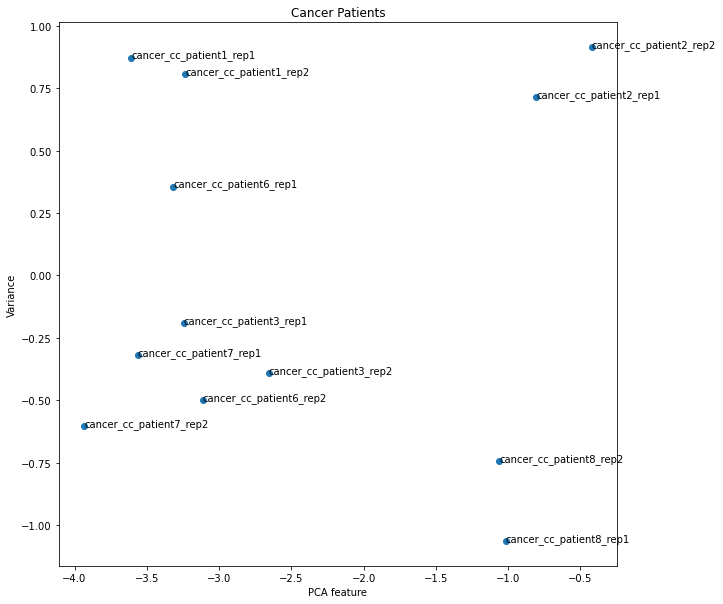

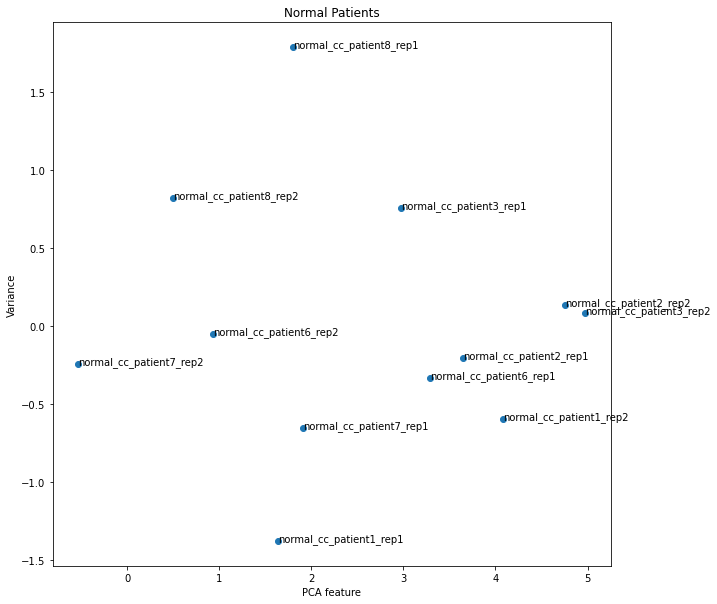

In [134]:
#proportion of variance explained after MTC 
#cancer patients
cancer_df_special = df_special.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_df_special):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
control_df_special = df_special.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(control_df_special):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

## Whole Dataset Batch Correction Investigation

Proportion of Variance Explained :  [0.36718206 0.16760867]


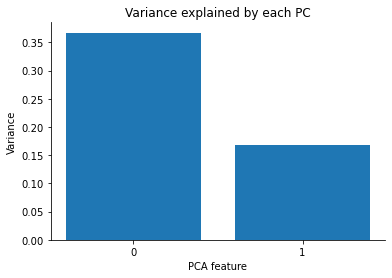

<function matplotlib.pyplot.show(close=None, block=None)>

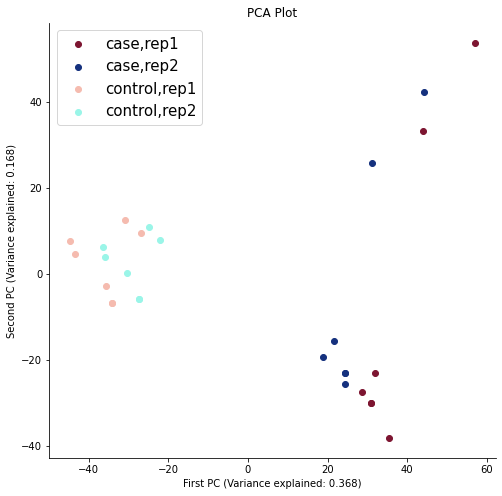

In [135]:
#THIS BLOCK PERFORMS THE PCA TEST ON THE BATCH CORRECTED DATA separate by batch
#tranpose the z-normalised batch corrected data 
df_z_bc_bypatients_T = df_z_bc_bypatients.T
#scale the batch corrected data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_z_bc_bypatients_T)
scaled_df_bc_znormalised = scaler.transform(df_z_bc_bypatients_T)

pca = PCA(n_components=2)
pca.fit(scaled_df_bc_znormalised)
scaled_df_bc_znormalised

#run PCA 
x_pca = pca.transform(scaled_df_bc_znormalised)
scaled_df_bc_znormalised.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  

plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.368)")
plt.ylabel("Second PC (Variance explained: 0.168)")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 15})
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show

In [136]:
#the main aim of this block is to rank the genes based on their loadings in PC1 and 2 
loadingsdf = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2'],index = df_z_bc_bypatients.T.columns)
#obtain the highest loading gene in PC1 
sort_by_PC1 = loadingsdf.sort_values(['PC1'],ascending = False, key = abs)
df_qn_PC1_loadings_sorted = sort_by_PC1['PC1']
df_qn_PC1_loadings_sorted

# #finding highest contributing genes in PC2 
sort_by_PC2= loadingsdf.sort_values(['PC2'],ascending = False, key = abs)
df_qn_PC2_loadings_sorted = sort_by_PC2['PC2']
df_qn_PC2_loadings_sorted.head(n = 20)

# print(sort_by_PC2.head(n=6))
# print(len(sort_by_PC2))

Unnamed: 0
P32119   -0.041804
Q04637    0.041039
P23368    0.040939
P42677    0.040756
P35237   -0.040702
P28161   -0.040357
P02730   -0.040308
P49406    0.040215
P02765   -0.040126
P01611   -0.039864
Q8N3K9   -0.039839
P55265    0.039792
Q9HBL0   -0.039757
Q658N2   -0.039439
Q15370    0.039418
P02647   -0.039264
Q14444    0.039187
Q5T4S7    0.039133
P08183    0.039086
Q9C0E2   -0.038928
Name: PC2, dtype: float64

In [137]:
subpopulation = ['PRDX2', 'EIF4G1', 'ME2', 'RPS27', 'SERPINB6', 'GSTM2', 'MRPL19', 'AHSG', 'IGKV1D-12']
df_special2 = df_bc_sorted[['PRDX2', 'EIF4G1', 'ME2', 'RPS27', 'SERPINB6', 'GSTM2', 'MRPL19', 'AHSG', 'IGKV1D-12']]

Proportion of Variance Explained :  [0.77519424 0.12251779]


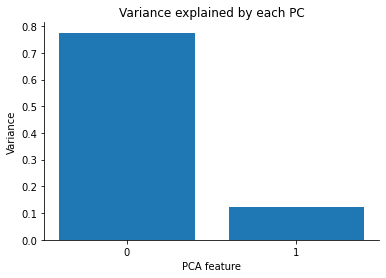

<function matplotlib.pyplot.show(close=None, block=None)>

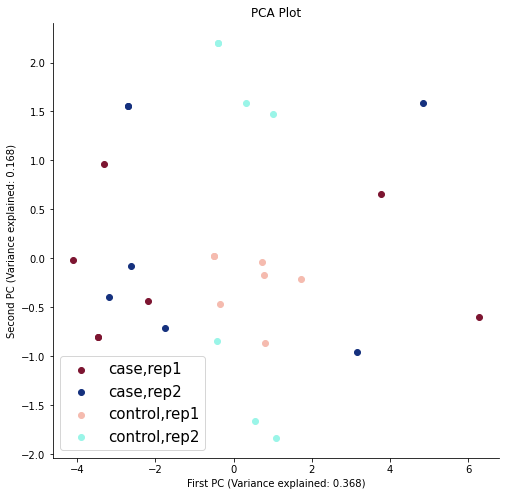

In [138]:
#THIS BLOCK PERFORMS THE PCA TEST ON THE BATCH CORRECTED DATA separate by batch
#tranpose the z-normalised batch corrected data 
df_z_bc_bypatients_T = df_z_bc_bypatients.T
#scale the batch corrected data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_special2)
scaled_special2 = scaler.transform(df_special2)

pca = PCA(n_components=2)
pca.fit(scaled_special2)
scaled_special2 

#run PCA 
x_pca = pca.transform(scaled_special2)
scaled_special2.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  

plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.368)")
plt.ylabel("Second PC (Variance explained: 0.168)")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 15})
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show

Text(0, 0.5, 'Variance')

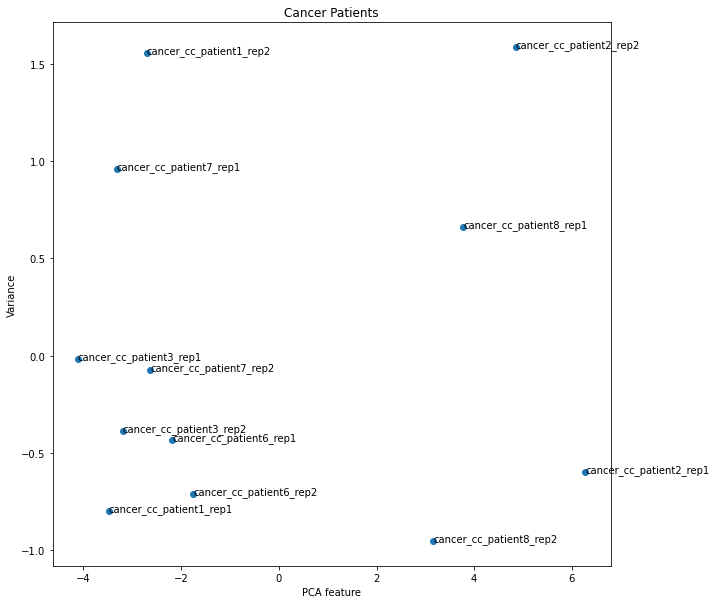

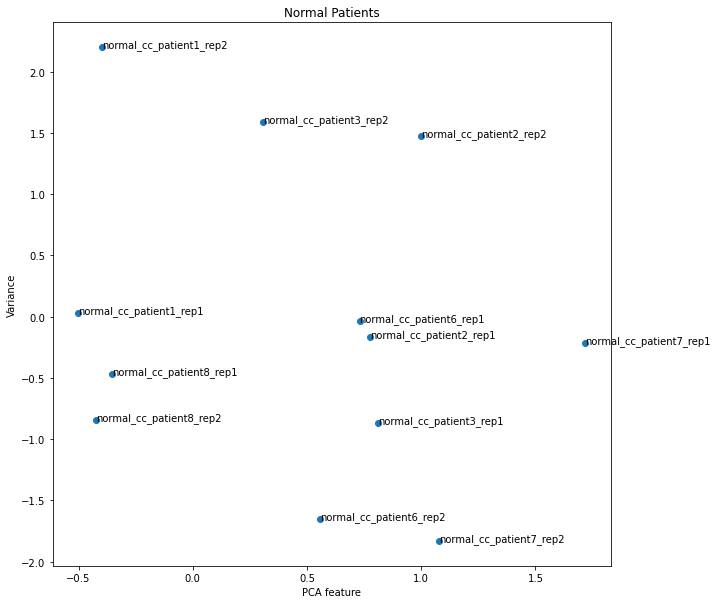

In [139]:
#proportion of variance explained after MTC 
#cancer patients
cancer_df_special2 = df_special2.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_df_special2):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
control_df_special2 = df_special2.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(control_df_special2):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

In [140]:
class_specific_unique_beforeMTC

{'CBX5',
 'DMTN',
 'DNAJC9',
 'FAM91A1',
 'GLO1',
 'LMNB1',
 'MINDY1',
 'REXO2',
 'SKP1'}

In [141]:
for i in subpopulation:
    if i in csbc_beforeMTC:
        print('TRUE')

TRUE


In [142]:
csbc_beforeMTC = ['PRDX2', 'EIF4G1', 'ME2', 'RPS27', 'SERPINB6', 'GSTM2', 'MRPL19', 'AHSG', 'IGKV1D-12']

In [143]:
df_special3 = class_specific_merge_sorted[subpopulation]

Proportion of Variance Explained :  [0.77519424 0.12251779]


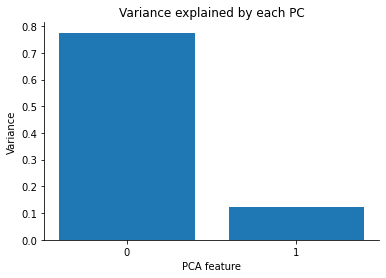

<function matplotlib.pyplot.show(close=None, block=None)>

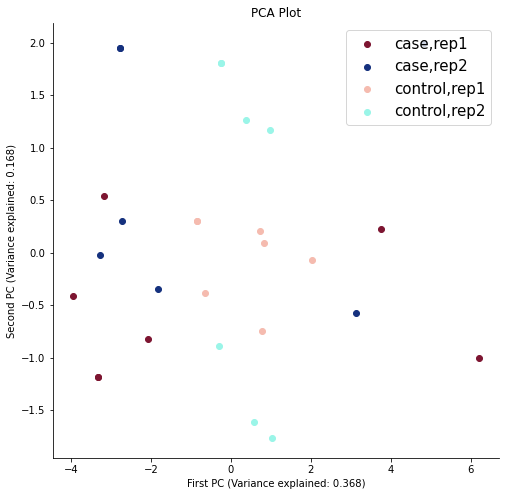

In [144]:
#THIS BLOCK PERFORMS THE PCA TEST ON THE BATCH CORRECTED DATA separate by batch
#tranpose the z-normalised batch corrected data 
df_z_bc_bypatients_T = df_z_bc_bypatients.T
#scale the batch corrected data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_special3 )
scaled_special3 = scaler.transform(df_special3 )

pca = PCA(n_components=2)
pca.fit(scaled_special2)
scaled_special3 

#run PCA 
x_pca = pca.transform(scaled_special3)
scaled_special3.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  

plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.368)")
plt.ylabel("Second PC (Variance explained: 0.168)")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 15})
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show

Text(0, 0.5, 'Variance')

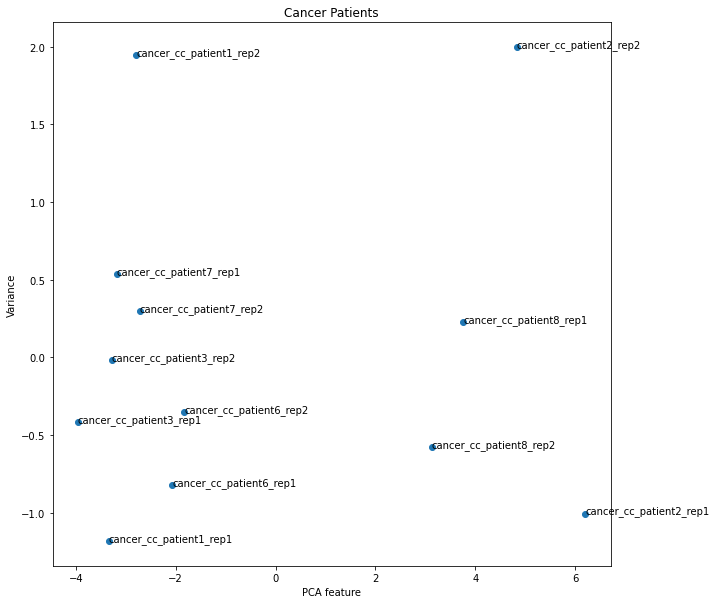

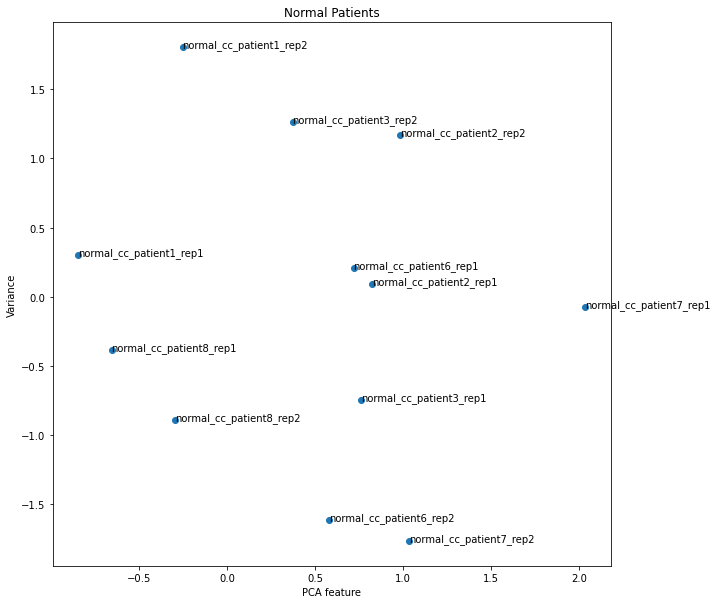

In [145]:
#proportion of variance explained after MTC 
#cancer patients
cancer_df_special3 = df_special3.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_df_special3):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
control_df_special3 = df_special3.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(control_df_special3):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

## CS Quantile Without CS Batch Correction

### Plot PCA without CS Batch Correction

In [146]:
#df_control_qn_lc.set_index(genes)
df_control_qn_lc.index = genes
df_control_qn_lc
df_qn_merge_nobc = pd.concat([df_cancer_qn_lc, df_control_qn_lc], axis = 1)
df_qn_merge_nobc

cancer_cc_patient1_rep1  cancer_cc_patient1_rep2  \
Unnamed: 0                                                     
Q9UBE0                    15.332235                15.404099   
Q9BSJ8                    15.347993                15.295981   
P02656                    18.049603                18.032346   
O95741                    12.322914                12.379739   
P09651                    16.705352                16.832371   
...                             ...                      ...   
P13010                    17.775634                17.699627   
O95182                    16.055011                16.117581   
P62241                    16.265261                16.390254   
Q14573                    14.257013                13.060372   
Q99436                    15.842256                15.685878   

            cancer_cc_patient2_rep1  cancer_cc_patient2_rep2  \
Unnamed: 0                                                     
Q9UBE0                    15.099978                15.103715   
Q9BSJ8                    16.513809                16.726582   
P02656                    16.830558                16.889838   
O95741                    12.527823                12.379739   
P09651                    17.043884                17.013944   
...                             ...                      ...   
P13010                    18.366319                18.407226   
O95182                    16.429241                16.281437   
P62241                    17.365246                17.150748   
Q14573                    13.249472                13.189657   
Q99436                    16.223274                16.236028   

            cancer_cc_patient3_rep1  cancer_cc_patient3_rep2  \
Unnamed: 0                                                     
Q9UBE0                    14.798670                15.125124   
Q9BSJ8                    15.174773                15.335861   
P02656                    17.289185                17.261663   
O95741                    12.618080                12.414663   
P09651                    16.636099                16.733615   
...                             ...                      ...   
P13010                    18.052482                18.195201   
O95182                    16.236028                16.124993   
P62241                    16.296721                16.167794   
Q14573                    12.896979                12.870959   
Q99436                    16.093330                15.950600   

            cancer_cc_patient6_rep1  cancer_cc_patient6_rep2  \
Unnamed: 0                                                     
Q9UBE0                    15.083143                15.283568   
Q9BSJ8                    15.650033                15.424084   
P02656                    17.451216                17.599385   
O95741                    12.011373                12.379739   
P09651                    16.782856                16.647403   
...                             ...                      ...   
P13010                    18.272519                18.259509   
O95182                    16.092456                16.154116   
P62241                    16.620437                16.593992   
Q14573                    13.012188                13.122383   
Q99436                    16.292539                16.257119   

            cancer_cc_patient7_rep1  cancer_cc_patient7_rep2  ...  \
Unnamed: 0                                                    ...   
Q9UBE0                    15.180541                15.157186  ...   
Q9BSJ8                    15.887703                15.895771  ...   
P02656                    17.389770                17.410355  ...   
O95741                    12.414663                12.666649  ...   
P09651                    16.481087                16.546979  ...   
...                             ...                      ...  ...   
P13010                    18.085283                18.148558  ...   
O95182                    16.540104                16.03723

Proportion of Variance Explained :  [0.37035457 0.16299385]


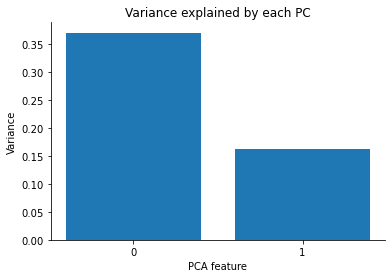

[[ 0.02505817  0.01137011 -0.00937825 ...  0.02003239 -0.01351078
   0.00234158]
 [-0.0078172   0.03764792 -0.02752872 ...  0.02636283  0.00721676
   0.01244603]]
[1206.90502764  531.1615077 ]


<function matplotlib.pyplot.show(close=None, block=None)>

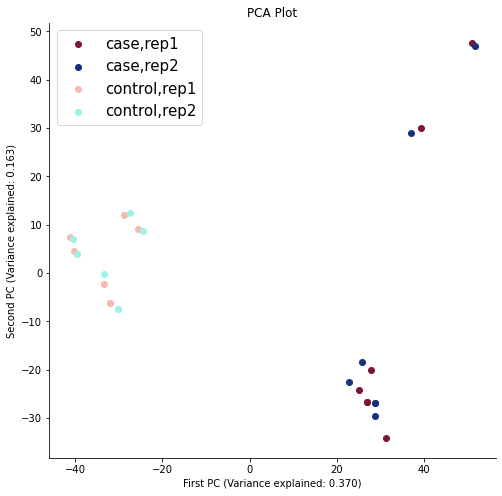

In [147]:
#scale the batch corrected data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_qn_merge_nobc.T)
scaled_df_qn_merge_nobc = scaler.transform(df_qn_merge_nobc.T)

pca = PCA(n_components=2)
pca.fit(scaled_df_qn_merge_nobc)
scaled_df_qn_merge_nobc 

#run PCA 
x_pca = pca.transform(scaled_df_qn_merge_nobc )
scaled_df_qn_merge_nobc.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  

plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.370)")
plt.ylabel("Second PC (Variance explained: 0.163)")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 15})
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
print(pca.components_)
print(pca.explained_variance_)
plt.show

In [148]:
pca.components_.shape

(2, 3123)

In [149]:
#the main aim of this block is to rank the genes based on their loadings in PC1 and 2 
loadingsdf = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2'],index = df_z_bc_bypatients.T.columns)
#obtain the highest loading gene in PC1 
sort_by_PC1 = loadingsdf.sort_values(['PC1'],ascending = False, key = abs)
df_qn_PC1_loadings_sorted = sort_by_PC1['PC1']
df_qn_PC1_loadings_sorted

# #finding highest contributing genes in PC2 
sort_by_PC2= loadingsdf.sort_values(['PC2'],ascending = False, key = abs)
df_qn_PC2_loadings_sorted = sort_by_PC2['PC2']
df_qn_PC2_loadings_sorted.head(n = 20)

Unnamed: 0
P32119   -0.041732
Q04637    0.041569
P35237   -0.041550
P02730   -0.040880
P23368    0.040805
P11142    0.040722
P28161   -0.040657
P49406    0.040568
Q658N2   -0.040563
P42677    0.040561
Q8N3K9   -0.040462
Q14444    0.040417
Q9HBL0   -0.040294
P02765   -0.039962
P08183    0.039936
P01611   -0.039920
P23396    0.039821
Q9C0E2   -0.039787
Q15370    0.039665
Q5T4S7    0.039633
Name: PC2, dtype: float64

Text(0, 0.5, 'Variance')

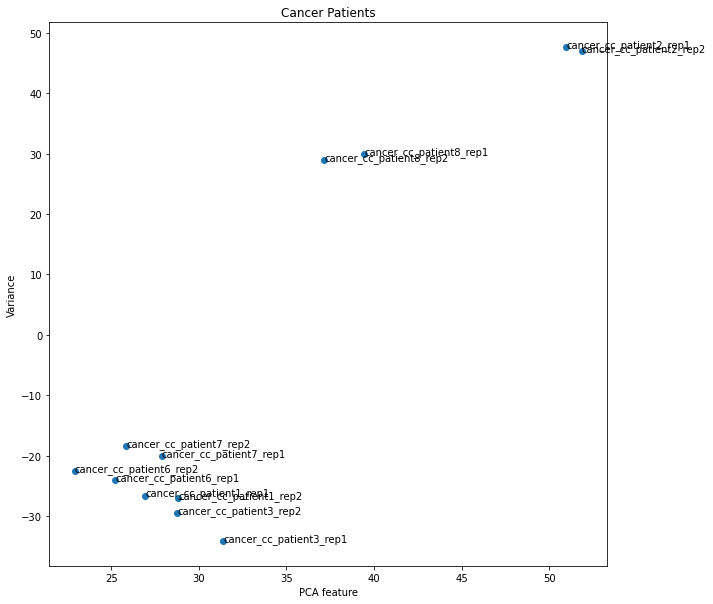

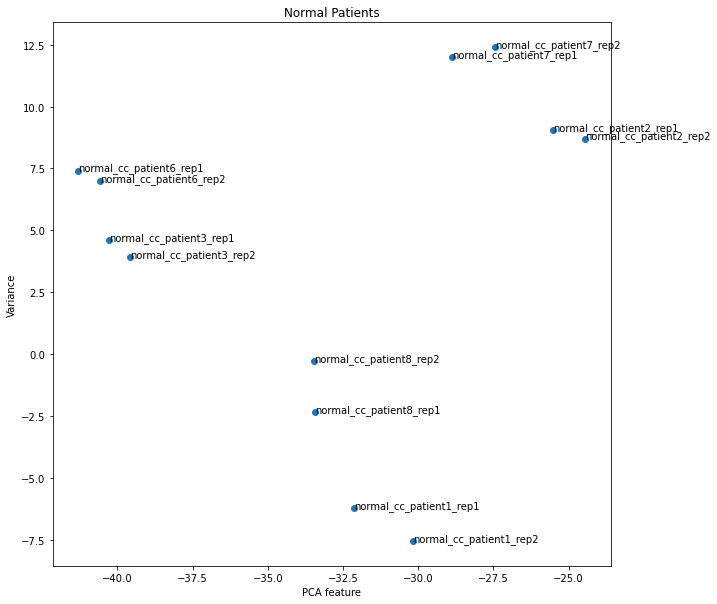

In [150]:
#proportion of variance explained after MTC 
#cancer patients
cancer_df_qn_merge_nobc = df_qn_merge_nobc.T.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_df_qn_merge_nobc):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
control_df_qn_merge_nobc = df_qn_merge_nobc.T.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(control_df_qn_merge_nobc):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

## Checking the pvalue distribution of the genes in the intersection (before MTC) in whole dataset batch correction versus class specific batch correction

### Obtain pvalues of intersection genes in the global data and class specific data 

In [151]:
#the following are the variables of the unique genes in intersection 
global_cs_intersection_beforeMTC = batch_corrected_set.intersection(cs_batch_corrected_set)

index_global_cs_intersection_beforeMTC_globaldata = []
global_cs_intersection_pvalues_beforeMTC_globaldata = []
index_global_cs_intersection_beforeMTC_csdata = []
global_cs_intersection_pvalues_beforeMTC_csdata = []

###this chunk obtains the pvalues of intersection genes in the global data 
##obtain the index of intersection genes in whole dataset batch correction (before MTC)
#for beforeMTC 
for deg in global_cs_intersection_beforeMTC:
    index_global_cs_intersection_beforeMTC_globaldata.append(ttest_deg_sorted_bc.index(deg))

##access the pvalues of intersection genes based on index of intersection genes (before MTC)
#for beforeMTC
for j in index_global_cs_intersection_beforeMTC_globaldata:
    #print(ttest_deg_pvalue_corrected_sorted_bc[j])
    global_cs_intersection_pvalues_beforeMTC_globaldata.append(ttest_deg_pvalue_bc[j])

####this chunk obtains the pvalues of intersection genes in the class specific data 
for deg in global_cs_intersection_beforeMTC:
    index_global_cs_intersection_beforeMTC_csdata.append(ttest_deg_sorted_cs_bc.index(deg))

for j in index_global_cs_intersection_beforeMTC_csdata:
    #print(ttest_deg_pvalue_corrected_sorted_bc[j])
    global_cs_intersection_pvalues_beforeMTC_csdata.append(ttest_deg_pvalue_cs_bc[j])

[Text(0.5, 1.0, 'Frequency Histogram of P-values of Intersection Genes in Global Data Before MTC'),
 Text(0, 0.5, 'Frequency')]

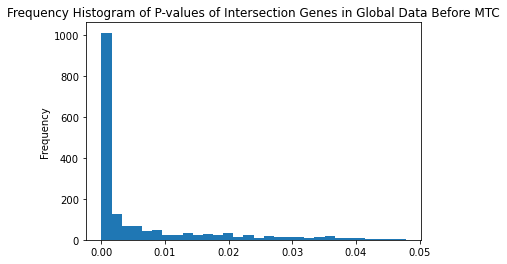

In [152]:
import matplotlib.pyplot as plt 
plt.hist(global_cs_intersection_pvalues_beforeMTC_globaldata, bins = 30)
plt.gca().set(title = "Frequency Histogram of P-values of Intersection Genes in Global Data Before MTC", ylabel = "Frequency")

[Text(0.5, 1.0, 'Frequency Histogram of P-values of Intersection Genes in Global Data Before MTC'),
 Text(0, 0.5, 'Frequency')]

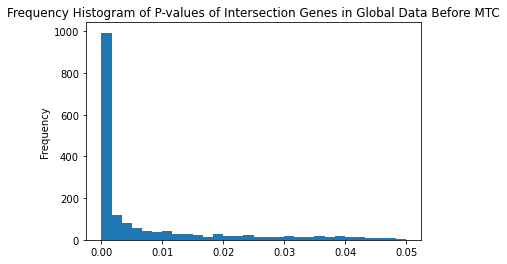

In [153]:
import matplotlib.pyplot as plt 
plt.hist(global_cs_intersection_pvalues_beforeMTC_csdata, bins = 30)
plt.gca().set(title = "Frequency Histogram of P-values of Intersection Genes in Global Data Before MTC", ylabel = "Frequency")

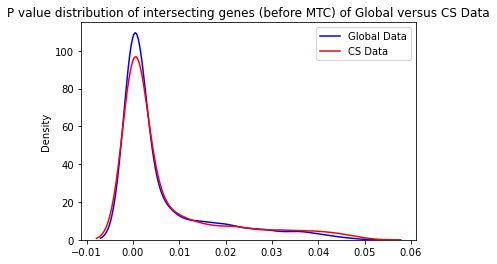

In [154]:
import seaborn as sns
sns.kdeplot(global_cs_intersection_pvalues_beforeMTC_globaldata, color = "b", label = "Global Data")
sns.kdeplot(global_cs_intersection_pvalues_beforeMTC_csdata, color = "r", label = "CS Data")
plt.title("P value distribution of intersecting genes (before MTC) of Global versus CS Data")
plt.legend()
plt.show()

In [155]:
#the following are the variables of the unique genes in intersection 
global_cs_intersection_afterMTC = bc_afterMTC.intersection(csbc_afterMTC)

index_global_cs_intersection_afterMTC_globaldata = []
global_cs_intersection_pvalues_afterMTC_globaldata = []
index_global_cs_intersection_afterMTC_csdata = []
global_cs_intersection_pvalues_afterMTC_csdata = []

###this chunk obtains the pvalues of intersection genes in the global data 
##obtain the index of intersection genes in whole dataset batch correction (before MTC)
#for beforeMTC 
for deg in global_cs_intersection_afterMTC:
    index_global_cs_intersection_afterMTC_globaldata.append(ttest_deg_corrected_sorted_bc.index(deg))

##access the pvalues of intersection genes based on index of intersection genes (before MTC)
#for beforeMTC
for j in index_global_cs_intersection_afterMTC_globaldata:
    #print(ttest_deg_pvalue_corrected_sorted_bc[j])
    global_cs_intersection_pvalues_afterMTC_globaldata.append(ttest_deg_pvalue_bc[j])

####this chunk obtains the pvalues of intersection genes in the class specific data 
for deg in global_cs_intersection_afterMTC:
    index_global_cs_intersection_afterMTC_csdata.append(deg_corrected_sorted_cs_bc.index(deg))

for j in index_global_cs_intersection_afterMTC_csdata:
    #print(ttest_deg_pvalue_corrected_sorted_bc[j])
    global_cs_intersection_pvalues_afterMTC_csdata.append(ttest_deg_pvalue_cs_bc[j])

[Text(0.5, 1.0, 'Frequency Histogram of P-values of Intersection Genes in Global Data After MTC'),
 Text(0, 0.5, 'Frequency')]

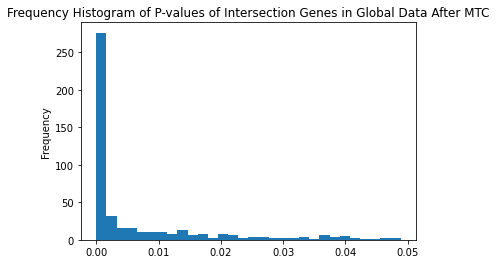

In [156]:
import matplotlib.pyplot as plt 
plt.hist(global_cs_intersection_pvalues_afterMTC_globaldata, bins = 30)
plt.gca().set(title = "Frequency Histogram of P-values of Intersection Genes in Global Data After MTC", ylabel = "Frequency")

[Text(0.5, 1.0, 'Frequency Histogram of P-values of Intersection Genes in CS Data After MTC'),
 Text(0, 0.5, 'Frequency')]

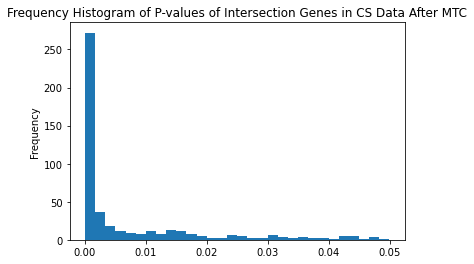

In [157]:
import matplotlib.pyplot as plt 
plt.hist(global_cs_intersection_pvalues_afterMTC_csdata, bins = 30)
plt.gca().set(title = "Frequency Histogram of P-values of Intersection Genes in CS Data After MTC", ylabel = "Frequency")

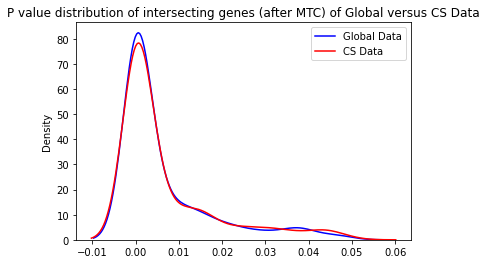

In [158]:
import seaborn as sns
sns.kdeplot(global_cs_intersection_pvalues_afterMTC_globaldata, color = "b", label = "Global Data")
sns.kdeplot(global_cs_intersection_pvalues_afterMTC_csdata, color = "r", label = "CS Data")
plt.title("P value distribution of intersecting genes (after MTC) of Global versus CS Data")
plt.legend()
plt.show()